# Wine classification using neural network (WIA1006 Labwork 2)


## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Loading dataset separately and showing brief statistic and information on both dataset


In [2]:
#Load white_wine data (separate by ';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

#Load red_wine data (separate by ';')
red_wine = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
#How the white_wine dataset looks like in table form.
white_wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [4]:
#How the red_wine dataset looks like in table form.
red_wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
#print information for white-wine (number of rows, number of columns, number of non-null values, data types etc... )
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
#print information for red-wine (number of rows, number of columns, number of non-null values, data types etc... )
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Before visualization part, find duplicate values and drop it


#### White wine data 

In [7]:
# Find how many duplicated rows there are in the white_wine dataset 
print ("Number of duplicated rows: ",white_wine.duplicated().sum())
print ("Number of total rows before dropping duplicated rows: " , len(white_wine))

# Drop the duplicated rows
white_wine = white_wine.drop_duplicates()

# Check if the number of duplicated rows has been dropped
print ("Number of duplicated rows after dropping: ", white_wine.duplicated().sum())
print ("Number of total rows after dropping duplicated rows: " , len(white_wine))


Number of duplicated rows:  937
Number of total rows before dropping duplicated rows:  4898
Number of duplicated rows after dropping:  0
Number of total rows after dropping duplicated rows:  3961


#### Red wine data

In [8]:
# Find how many duplicated rows there are in the red_wine dataset 
print ("Number of duplicated rows: ",red_wine.duplicated().sum())
print ("Number of total rows before dropping duplicated rows: " , len(red_wine))

# Drop the duplicated rows
red_wine = red_wine.drop_duplicates()

# Check if the number of duplicated rows has been dropped
print ("Number of duplicated rows after dropping: ", red_wine.duplicated().sum())
print ("Number of total rows after dropping duplicated rows: " , len(red_wine))


Number of duplicated rows:  240
Number of total rows before dropping duplicated rows:  1599
Number of duplicated rows after dropping:  0
Number of total rows after dropping duplicated rows:  1359


## Visualizations of both dataset separately

### Pairplots

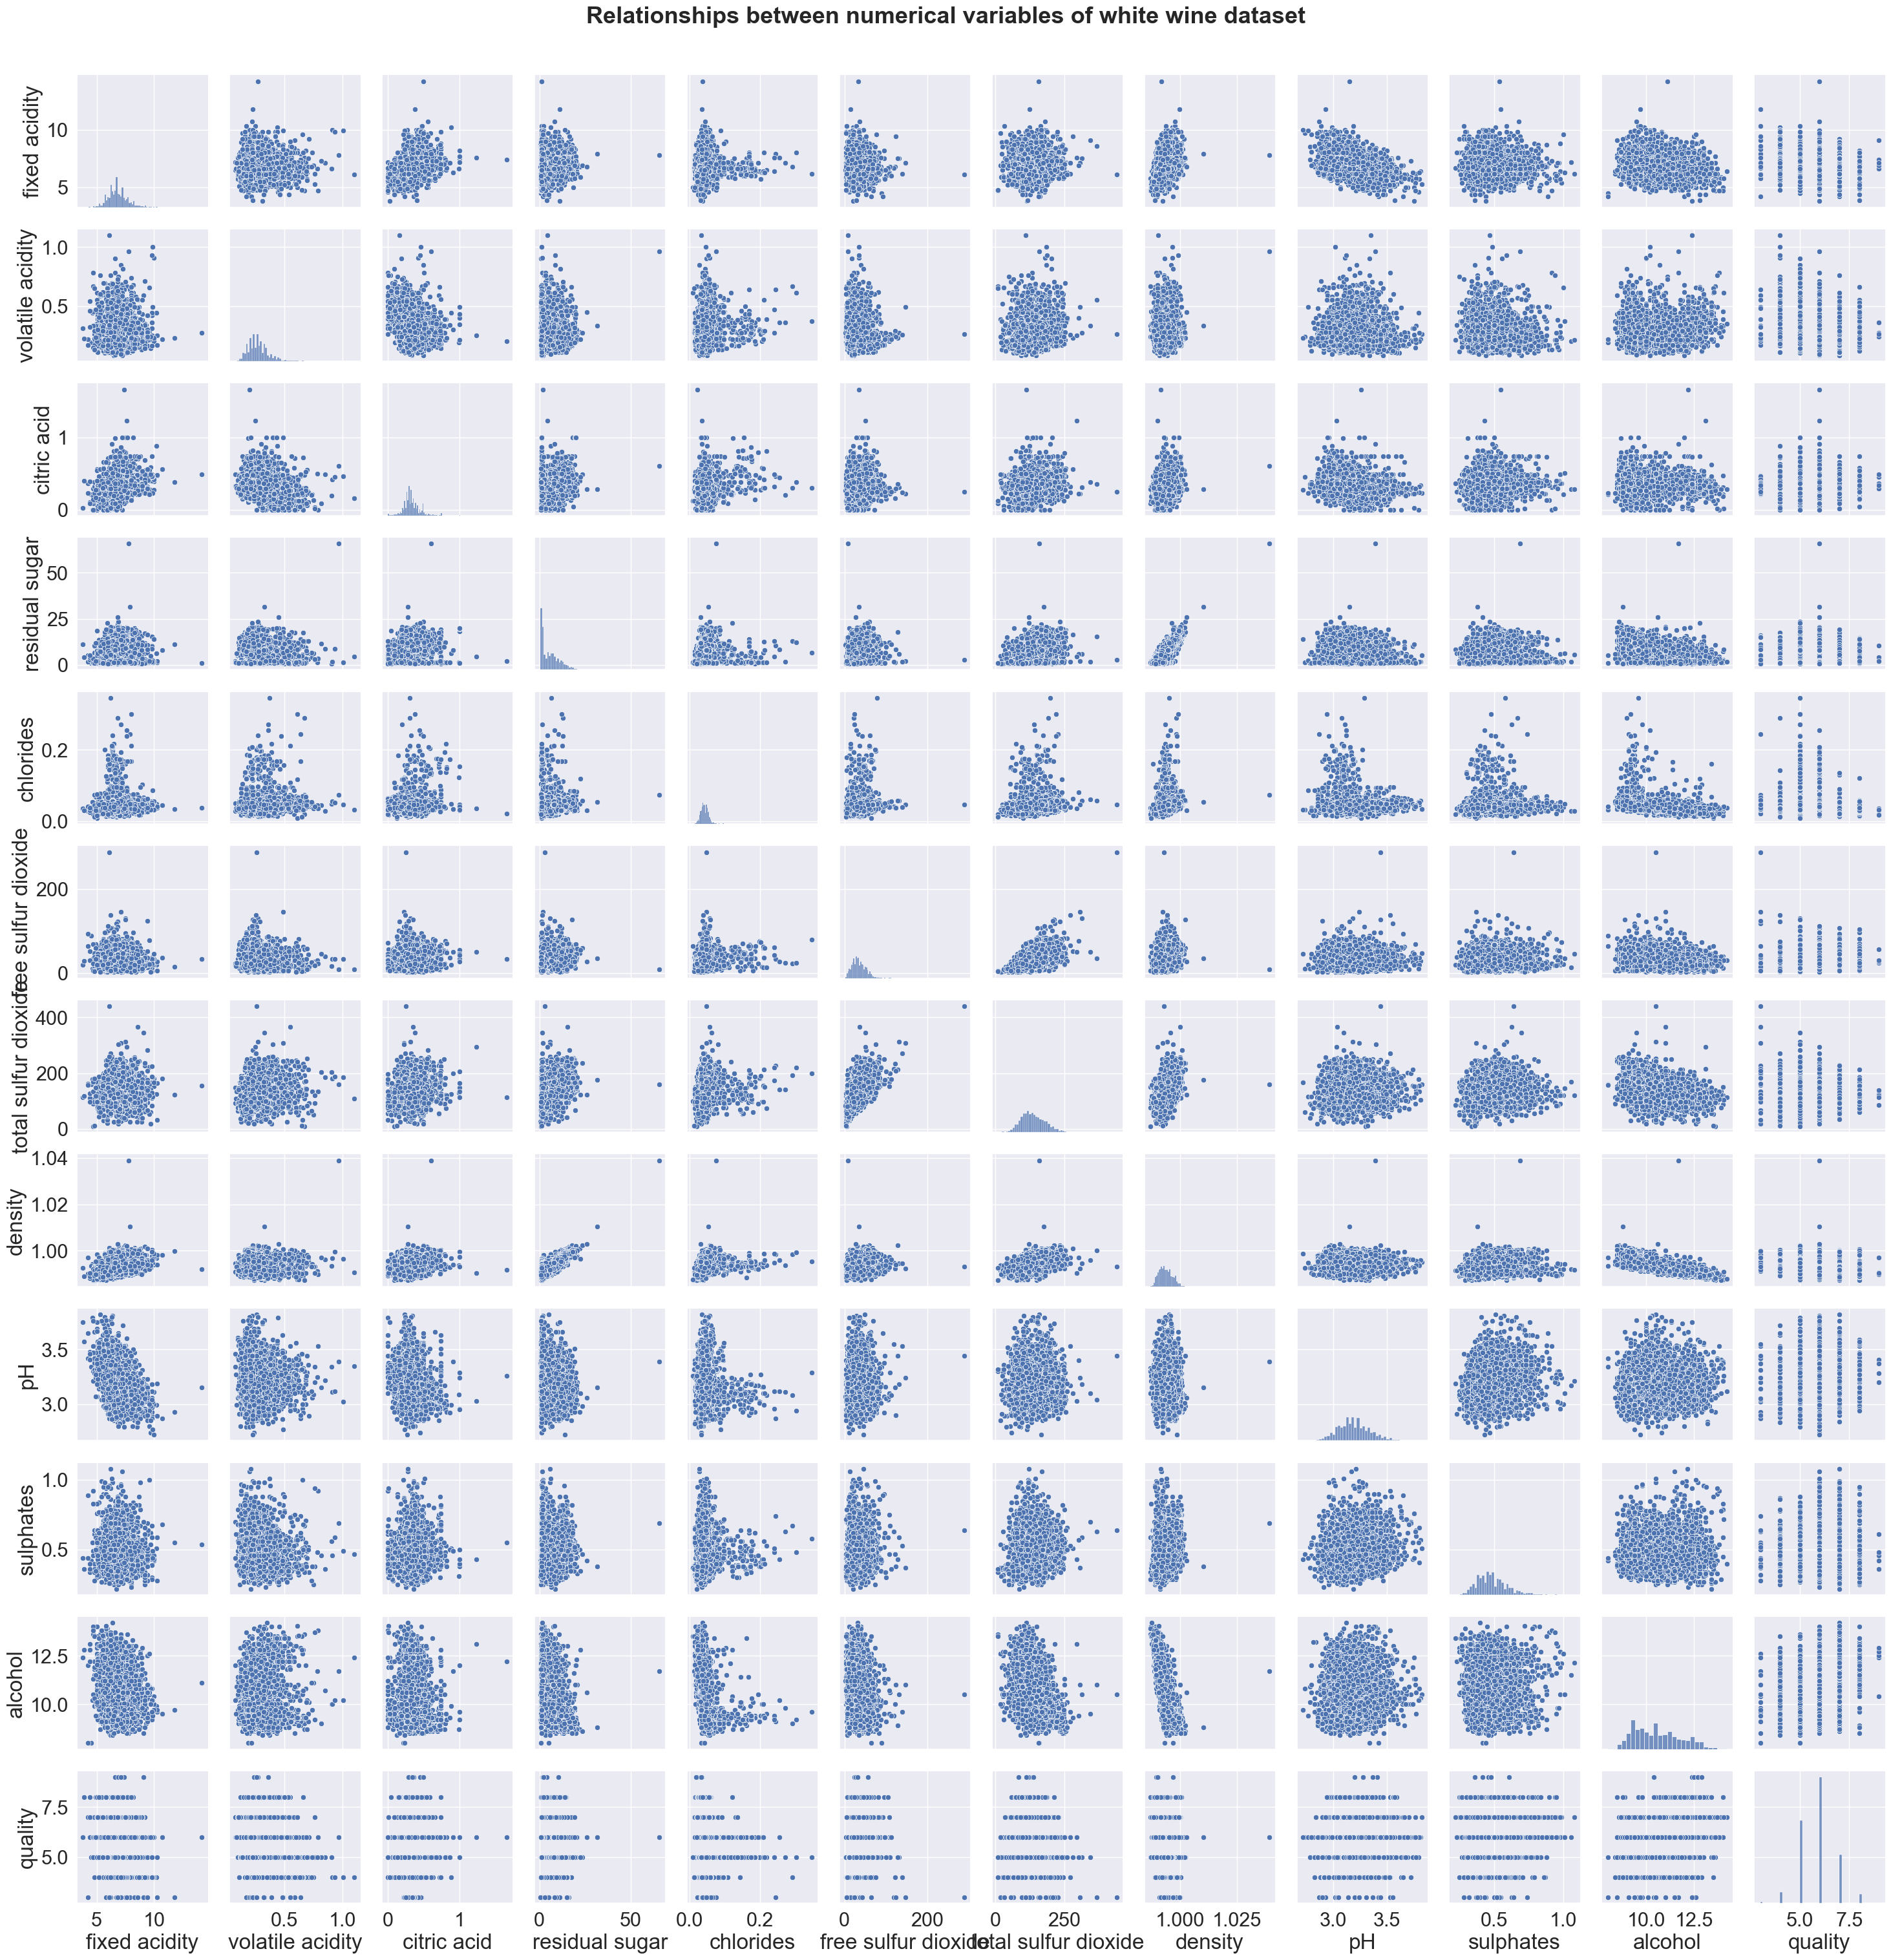

In [9]:
#Visualizing the relationship between numerical variables of white_wine dataset
sns.set(font_scale =2.0)
white_wine_pairplot = sns.pairplot(white_wine)
white_wine_pairplot.fig.suptitle("Relationships between numerical variables of white wine dataset", y=1.02, fontsize=26, fontweight= 'bold')
plt.show()

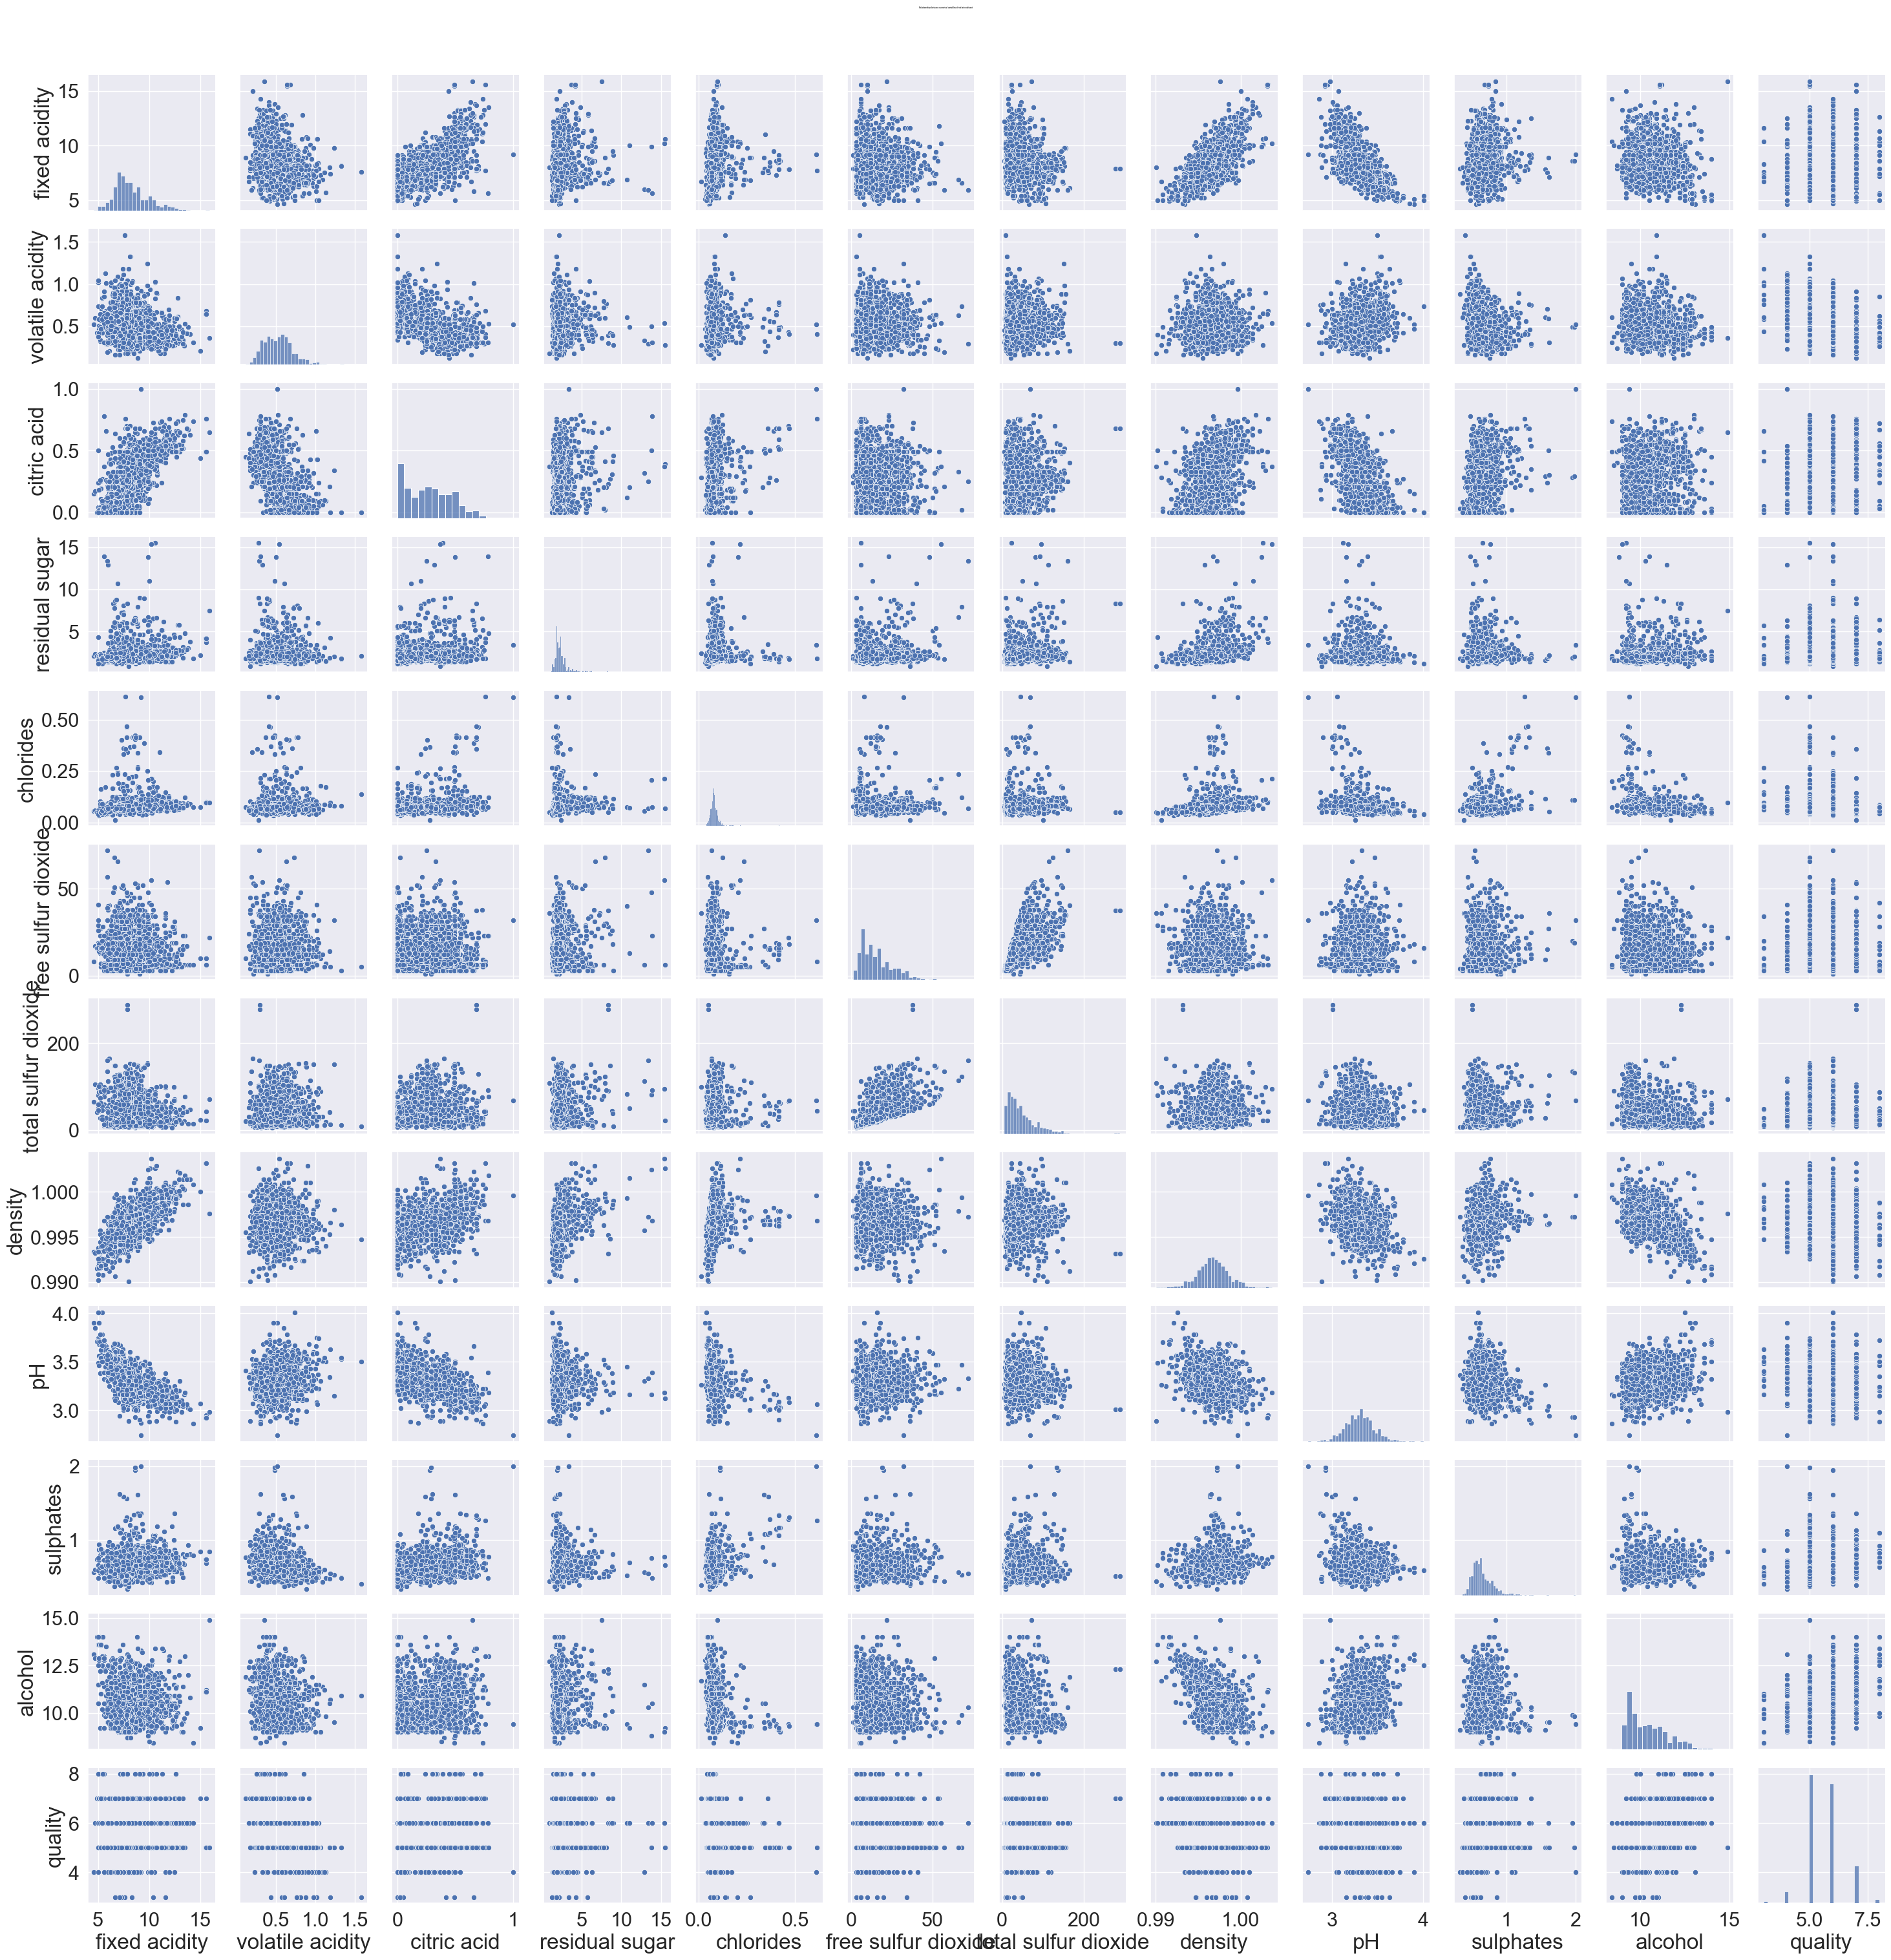

In [10]:
#Visualizing the relationship between numerical variables of red_wine dataset
sns.set(font_scale =2.0)
white_wine_pairplot = sns.pairplot(red_wine)
white_wine_pairplot.fig.suptitle("Relationships between numerical variables of red wine dataset", y=1.02, fontsize=2, fontweight= 'bold')
plt.show()

## -------------------------------------------------------------------------------------------------------------------------------
## Correlation matrix (heatmap)
### Visual representation of the correlations between different variables in the white_wine dataset (to find how much each variables are related to each other).
### If the correlation value is closer to -1 or 1, it indicates a stronger relationship between the variables.

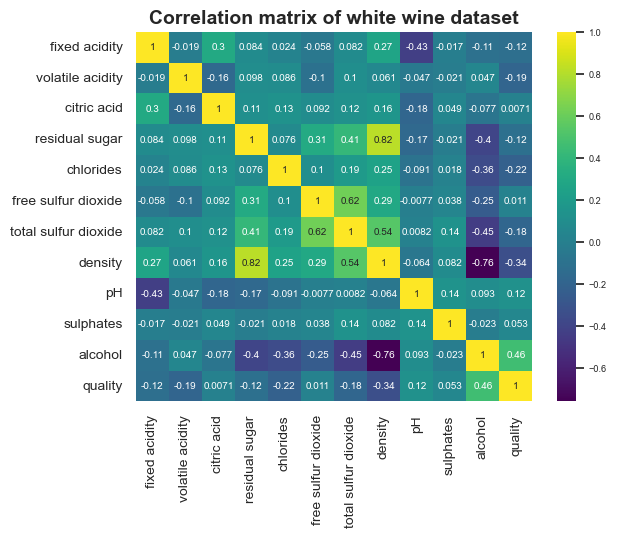

In [11]:
# Correlation matrix for white_wine dataset
sns.set(font_scale = 0.6)
white_wine_heatmap = sns.heatmap(white_wine.corr(), annot=True, cmap="viridis")
white_wine_heatmap.set_xticklabels(white_wine_heatmap.get_xticklabels(), fontsize=10)
white_wine_heatmap.set_yticklabels(white_wine_heatmap.get_yticklabels(), fontsize=10)
plt.title ("Correlation matrix of white wine dataset" ,fontweight= 'bold', fontsize= 14)
plt.show()


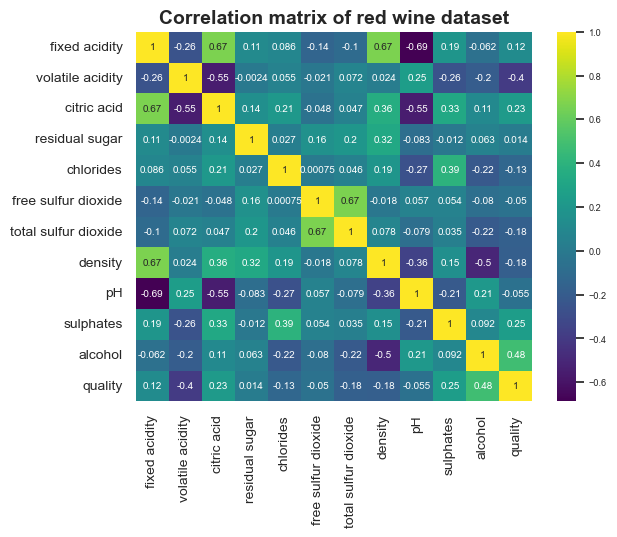

In [12]:
# Correlation matrix for red_wine dataset
red_wine_heatmap = sns.heatmap(red_wine.corr(), annot=True, cmap="viridis")
red_wine_heatmap.set_xticklabels(red_wine_heatmap.get_xticklabels(), fontsize=10)
red_wine_heatmap.set_yticklabels(red_wine_heatmap.get_yticklabels(), fontsize=10)
plt.title ("Correlation matrix of red wine dataset" ,fontweight= 'bold', fontsize= 14)
plt.show()


## ----------------------------------------------------------------------------------------------------------------------------------
## Outliers analysis using boxplots
### Outliers = the dots or individual points that are plotted outside the whiskers of boxplot.

### White wine outliers analysis using boxplots

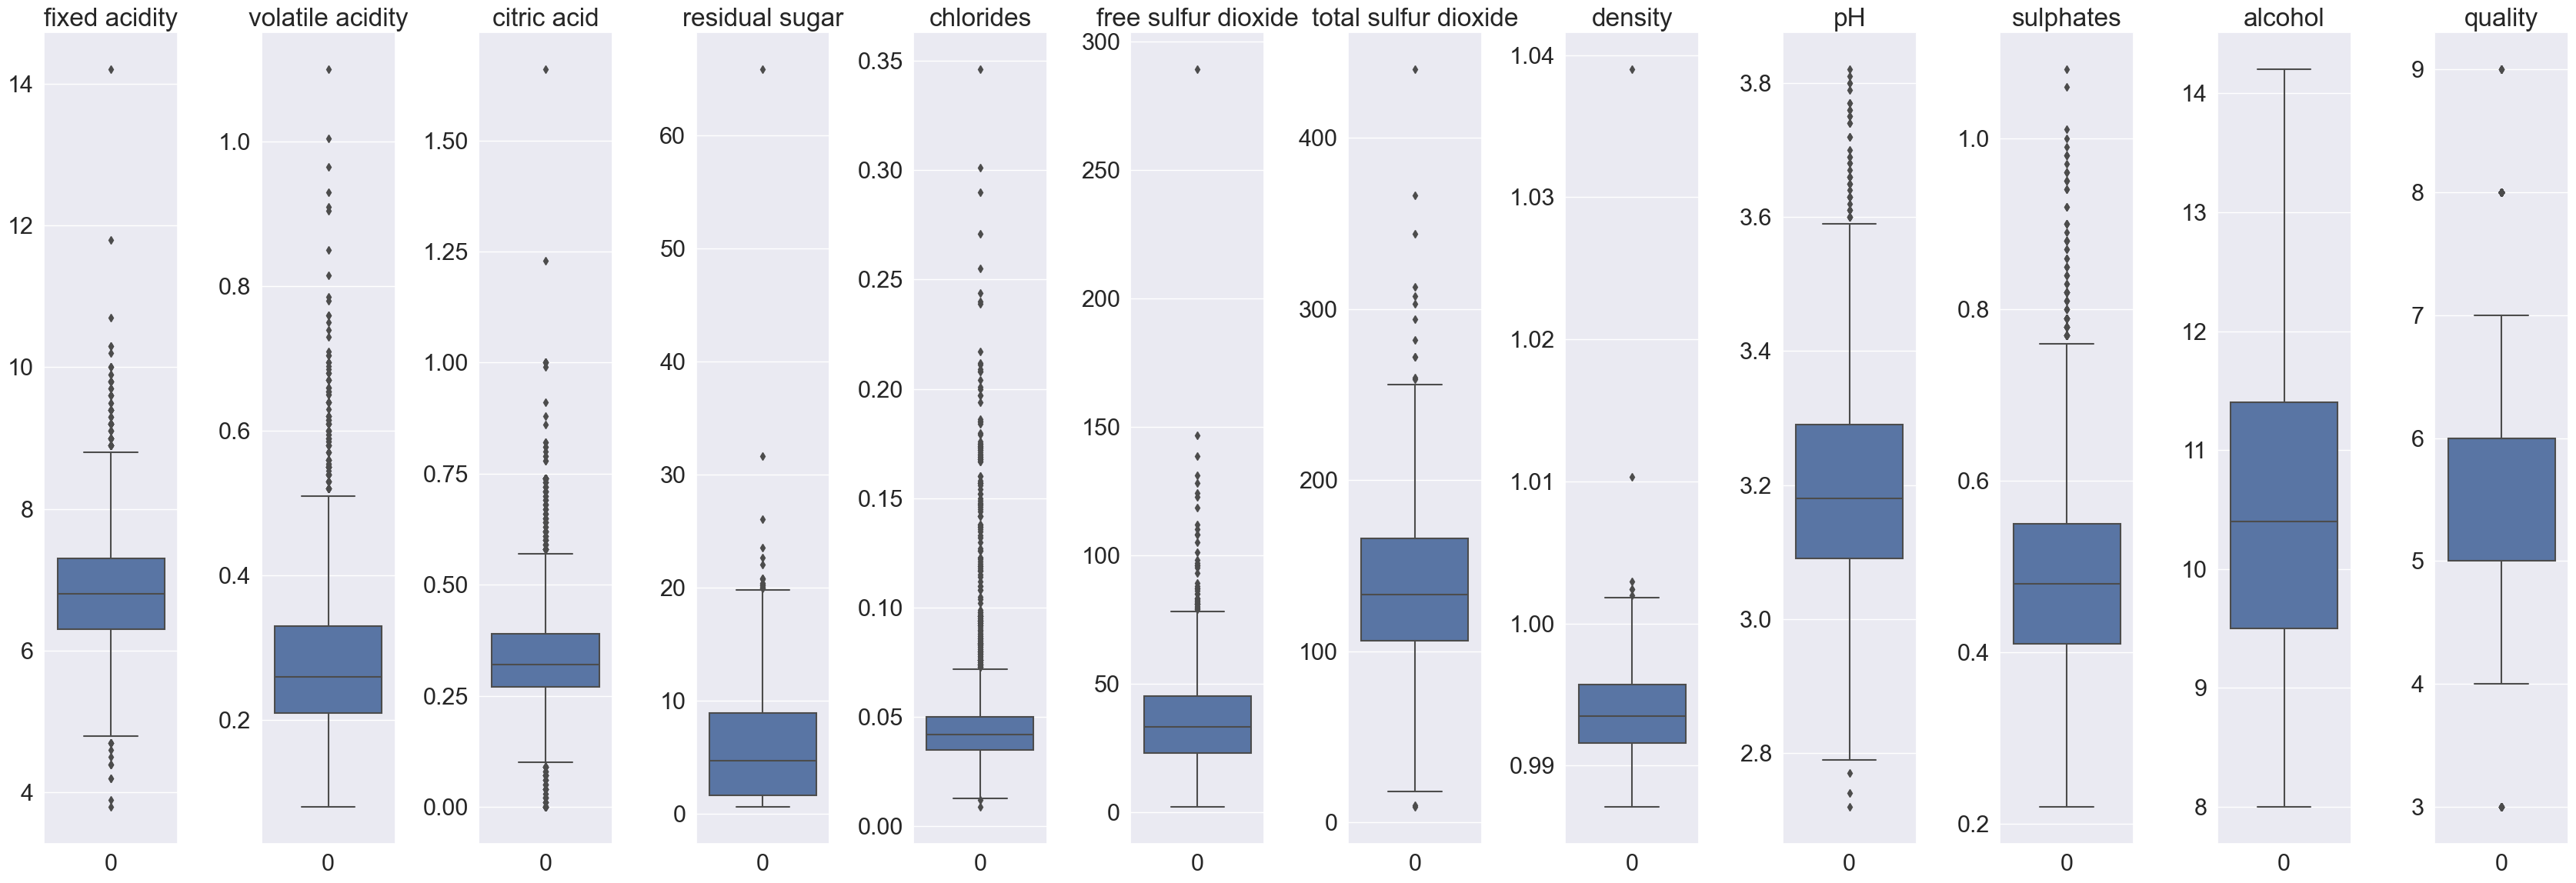

In [13]:
sns.set(font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=len(white_wine.columns), figsize=(34, 12))

for i, col in enumerate(white_wine.columns): 
    sns.boxplot(white_wine[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Red wine outliers analysis using boxplots

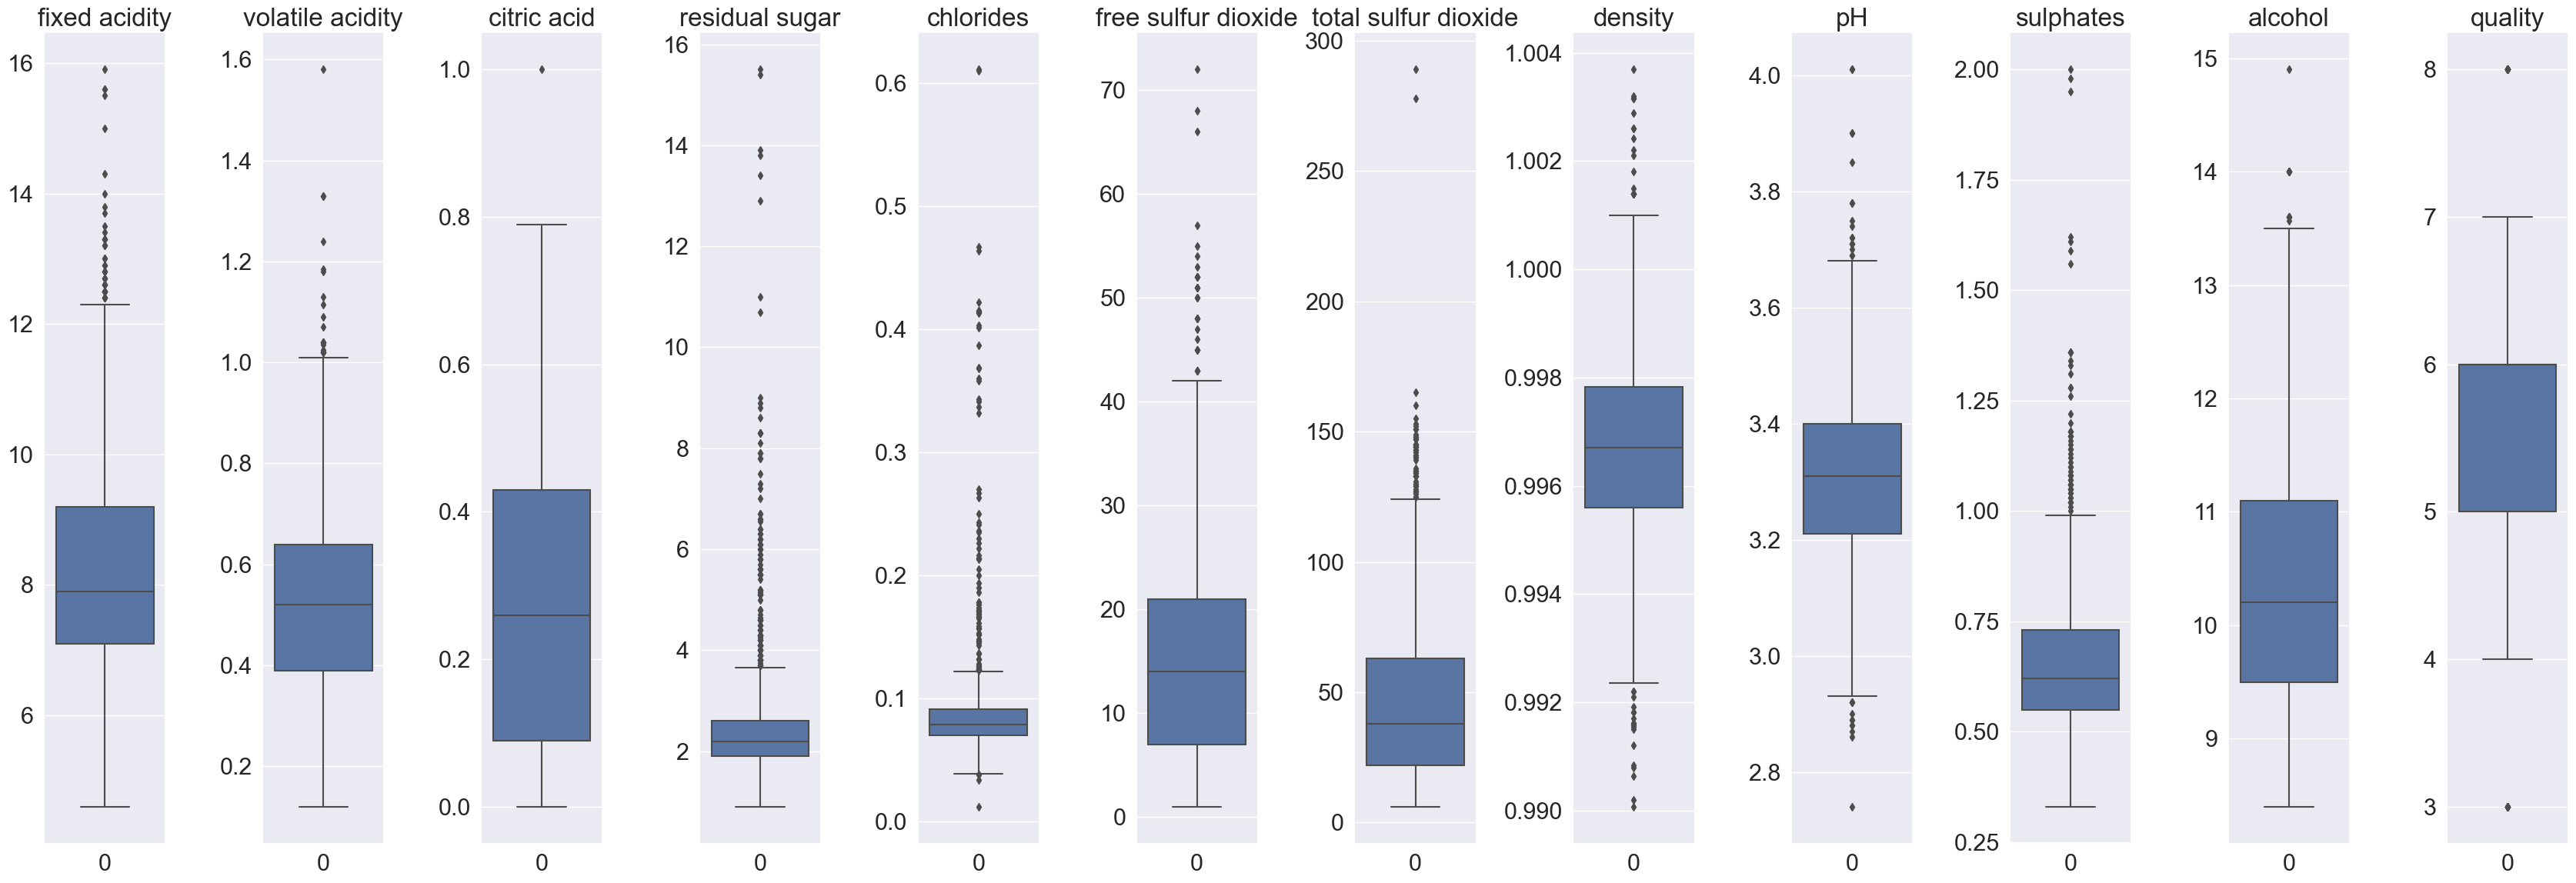

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=len(red_wine.columns), figsize=(34, 12))

for i, col in enumerate(red_wine.columns): 
    sns.boxplot(red_wine[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Histogram visualization

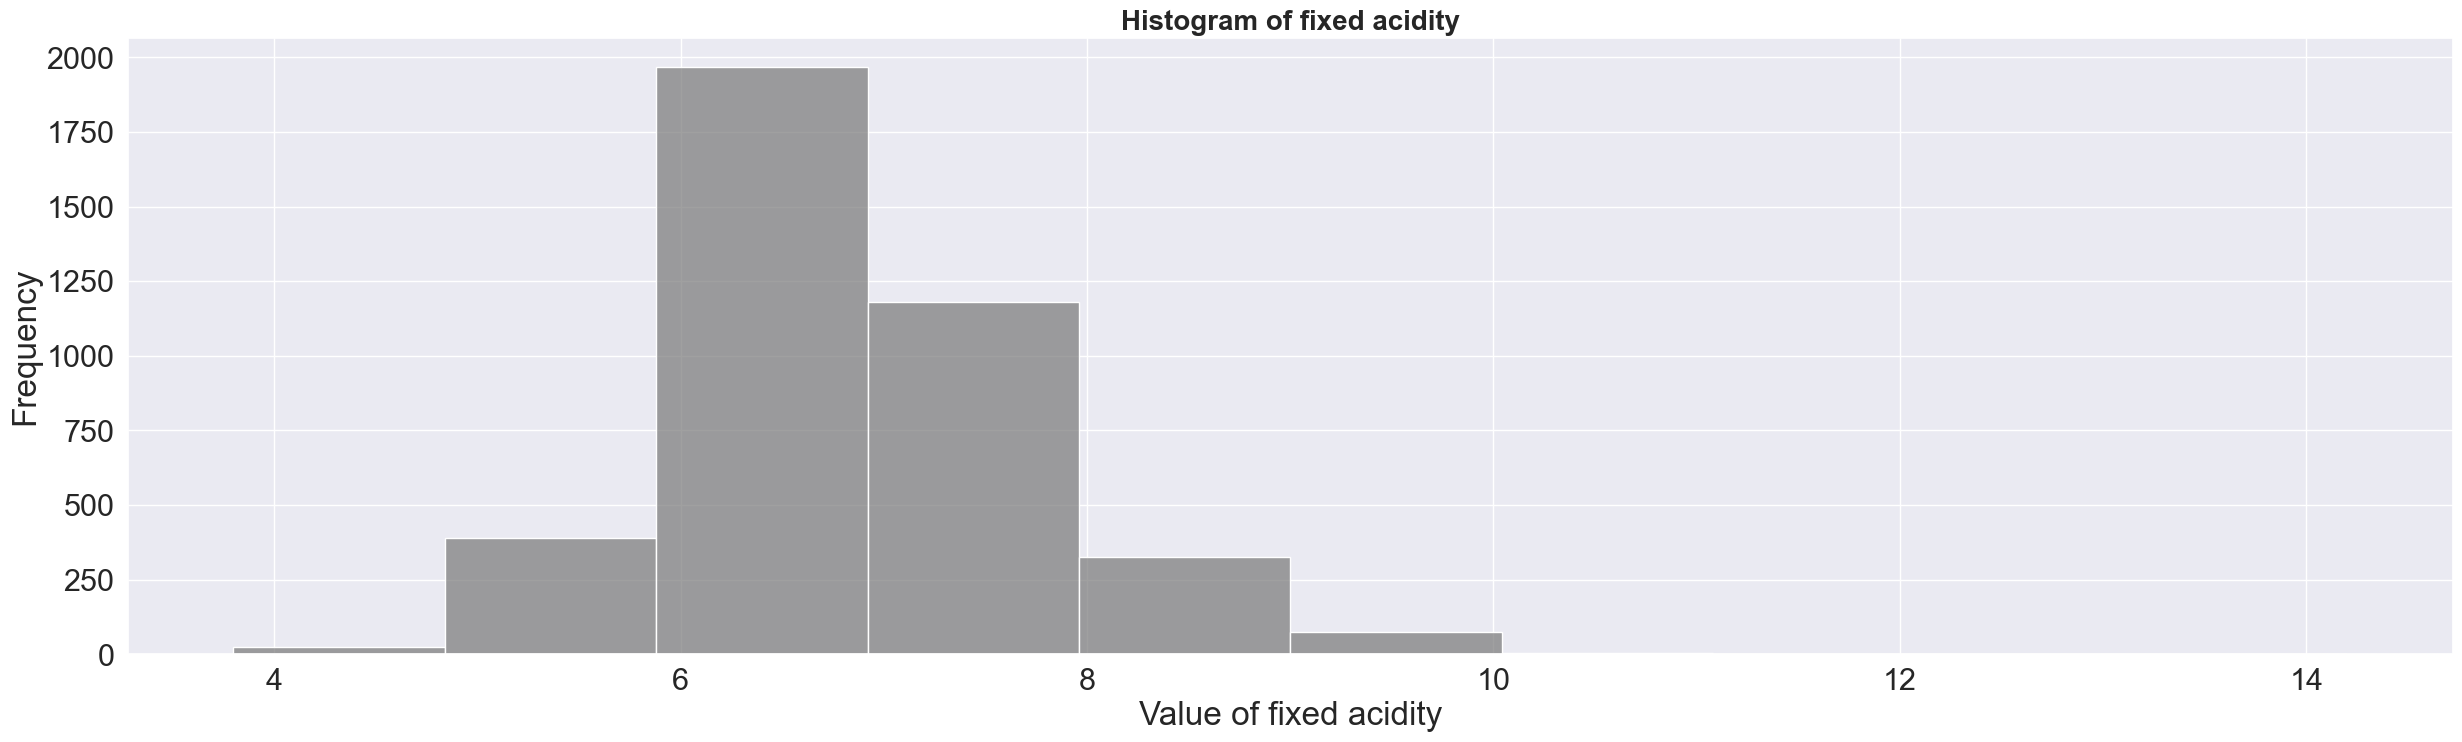

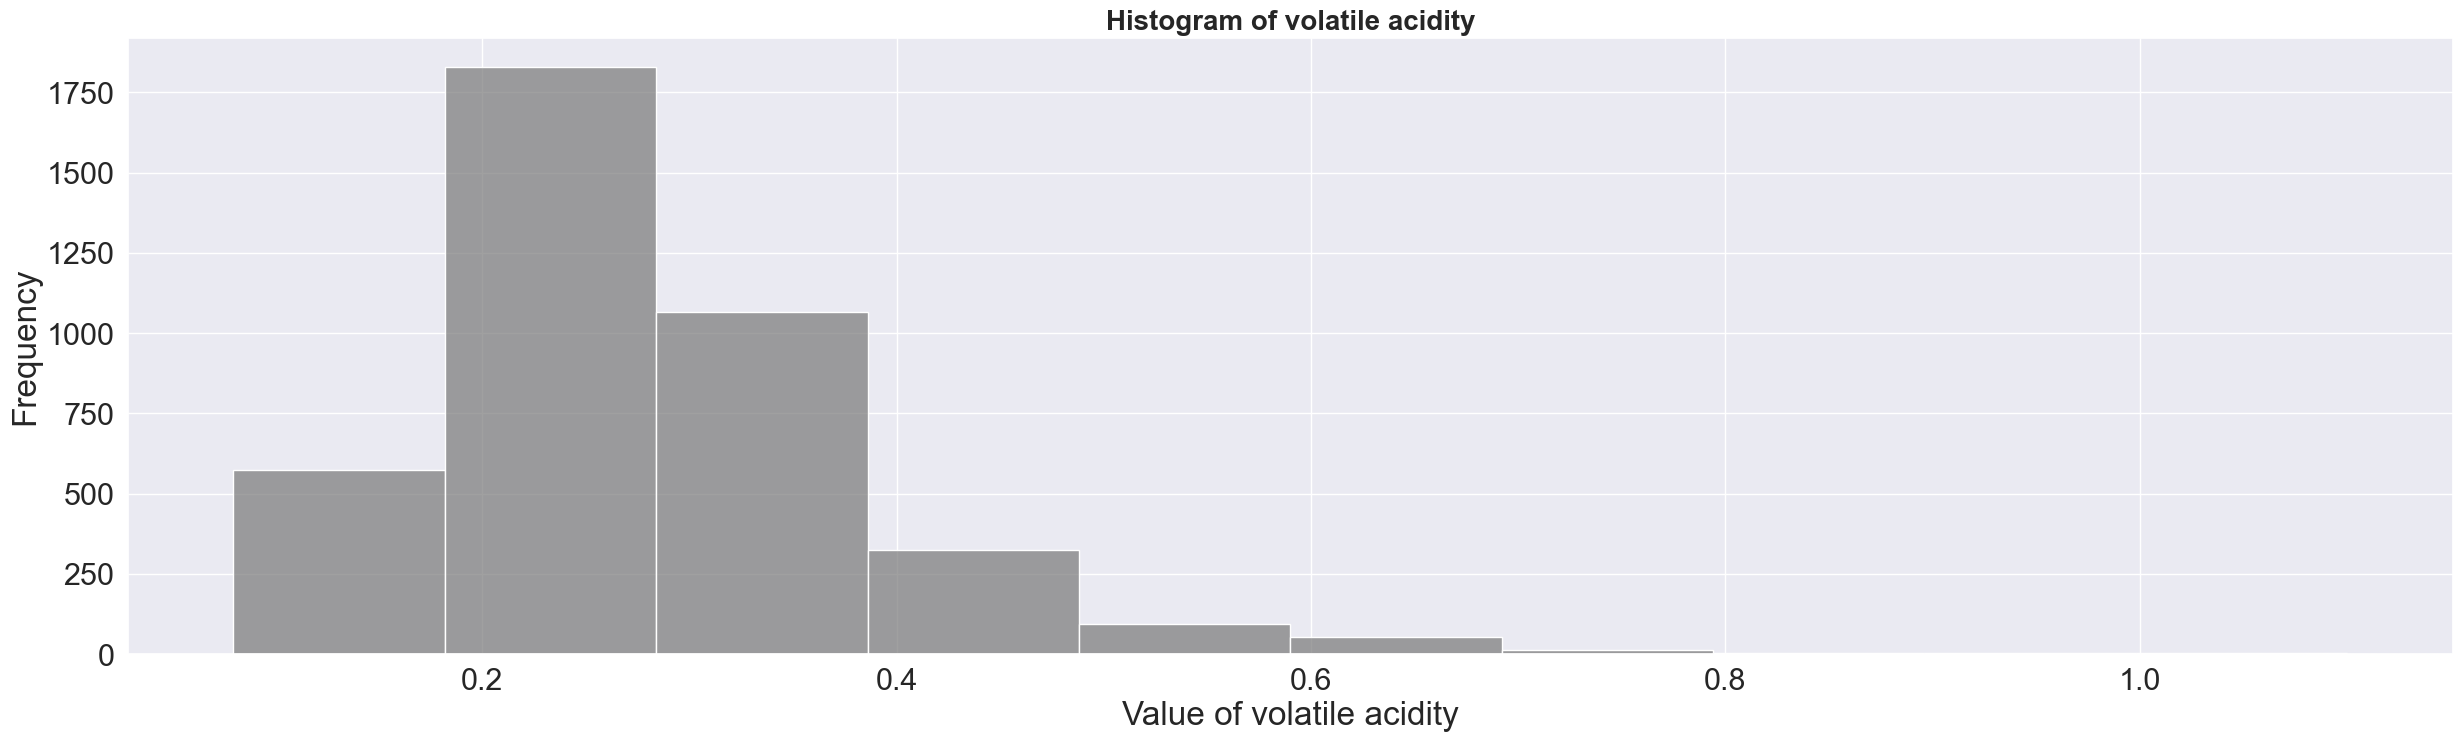

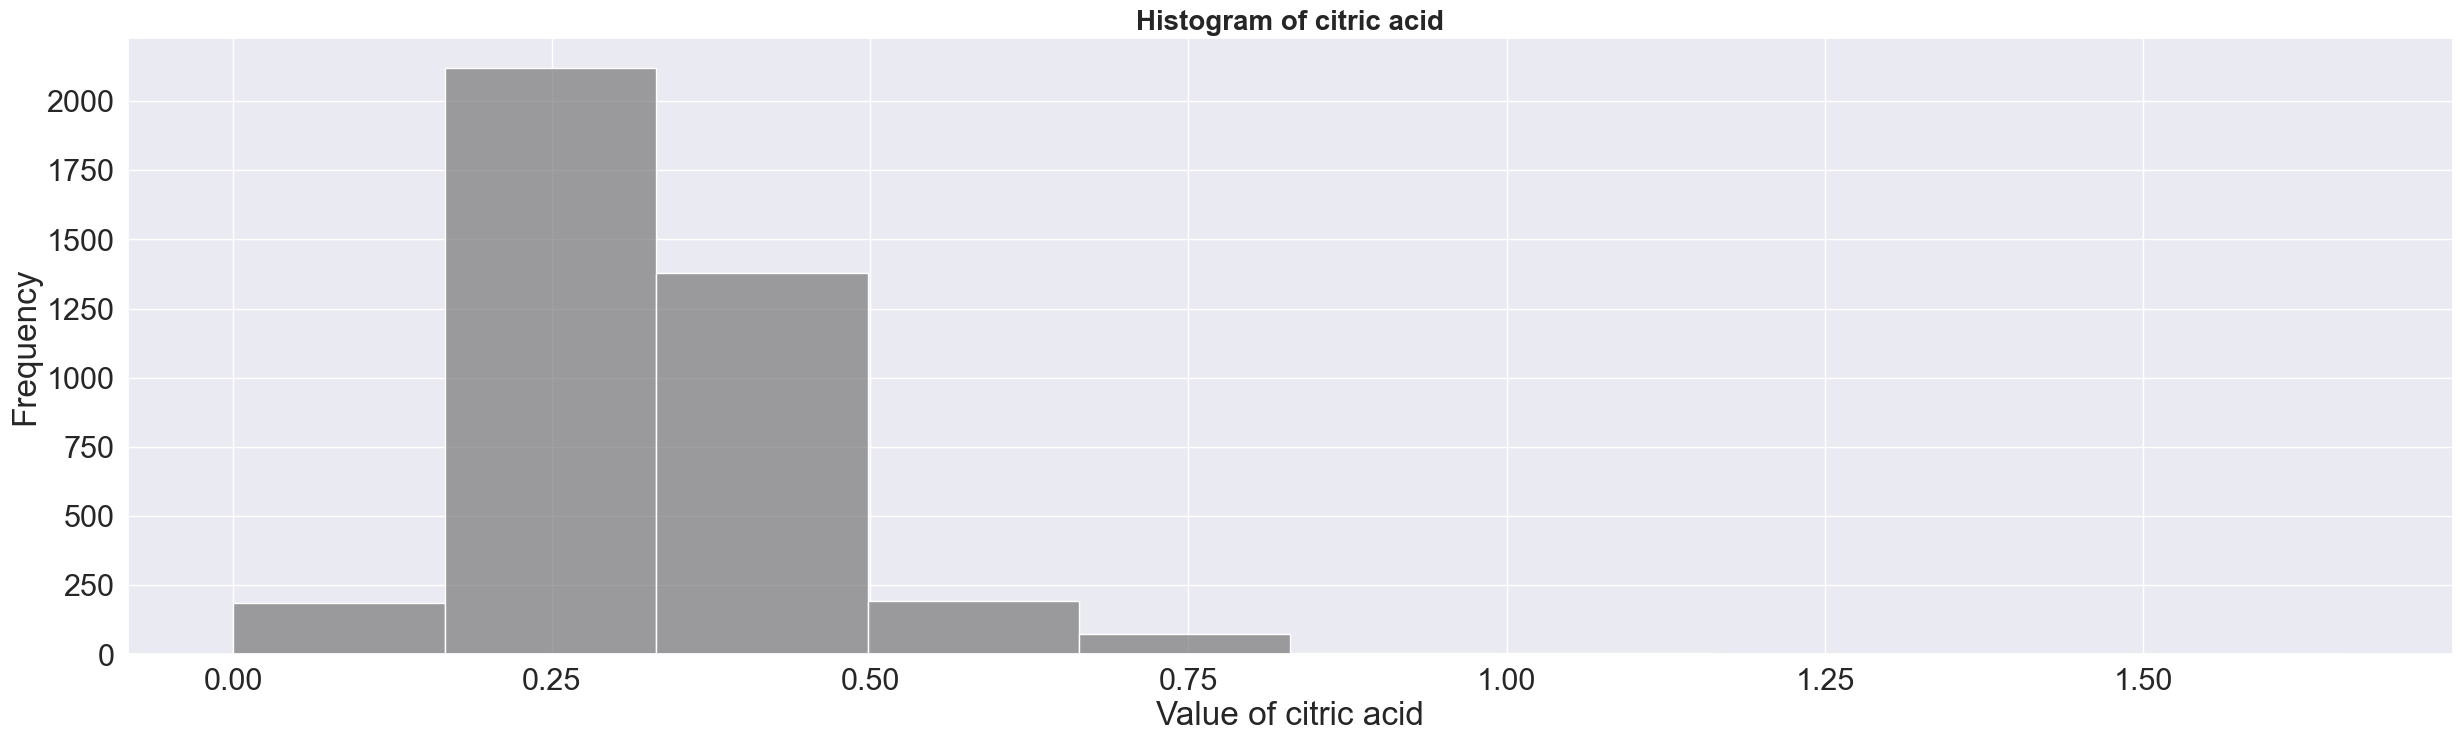

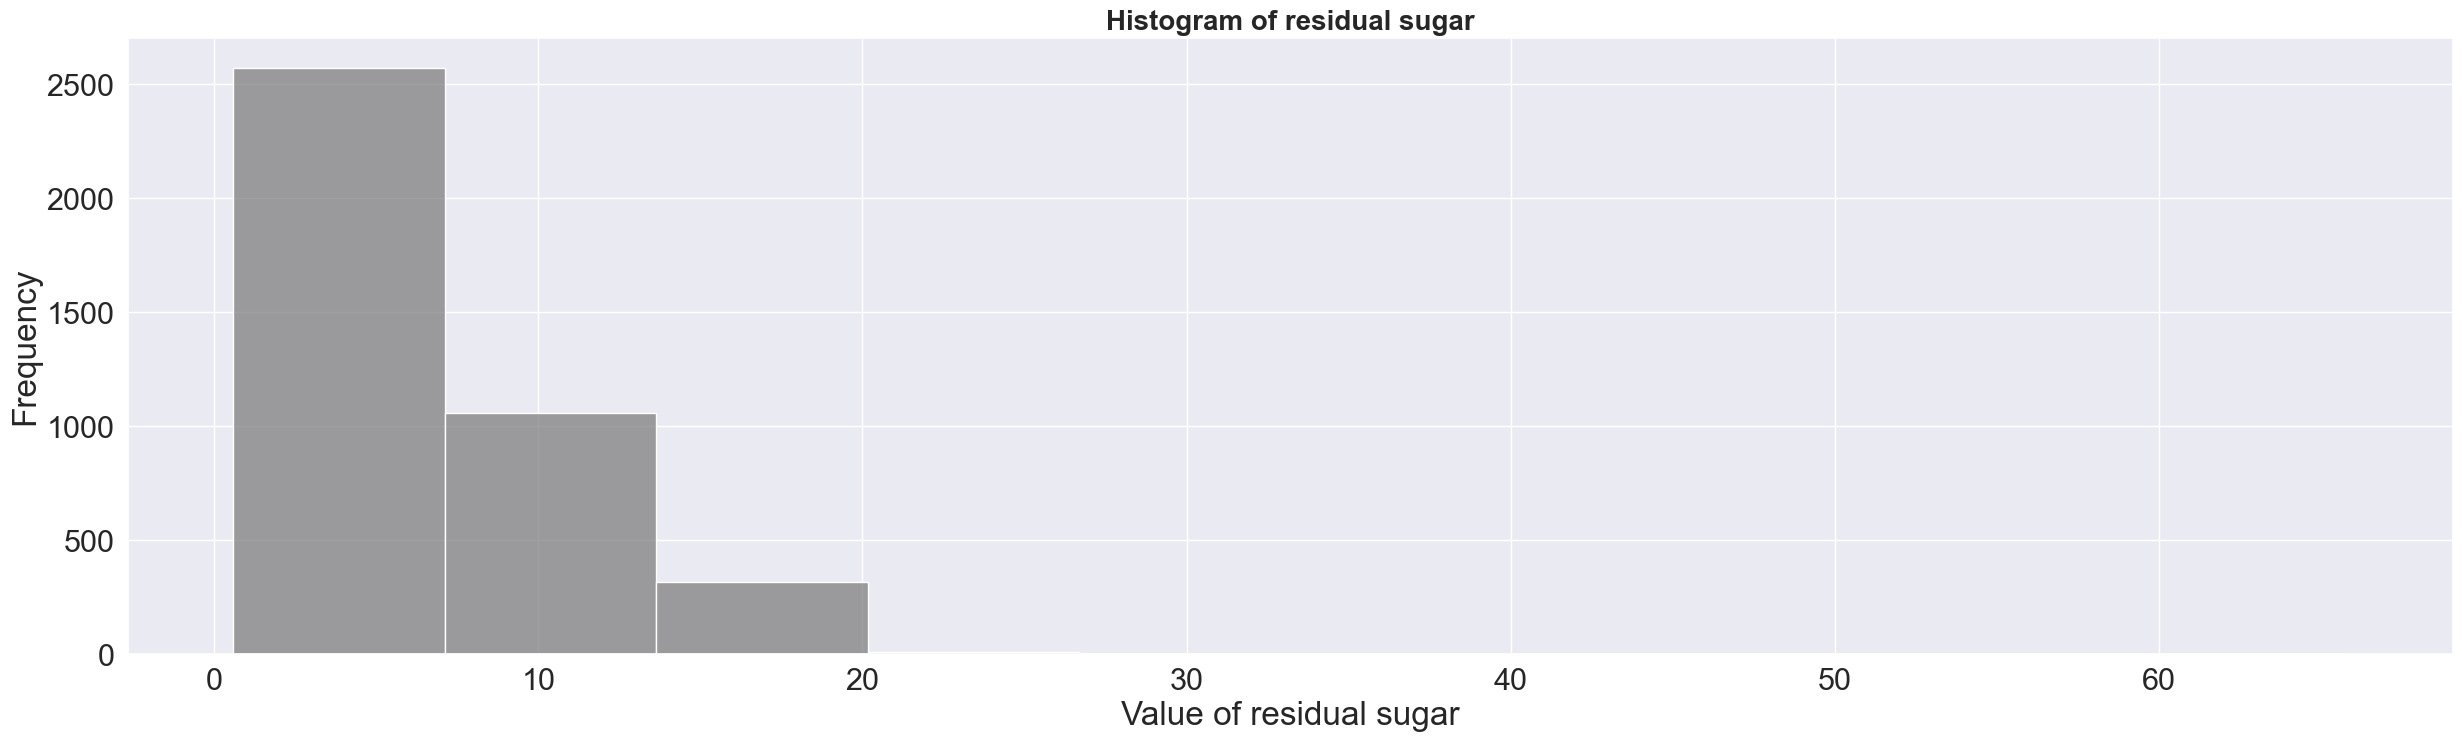

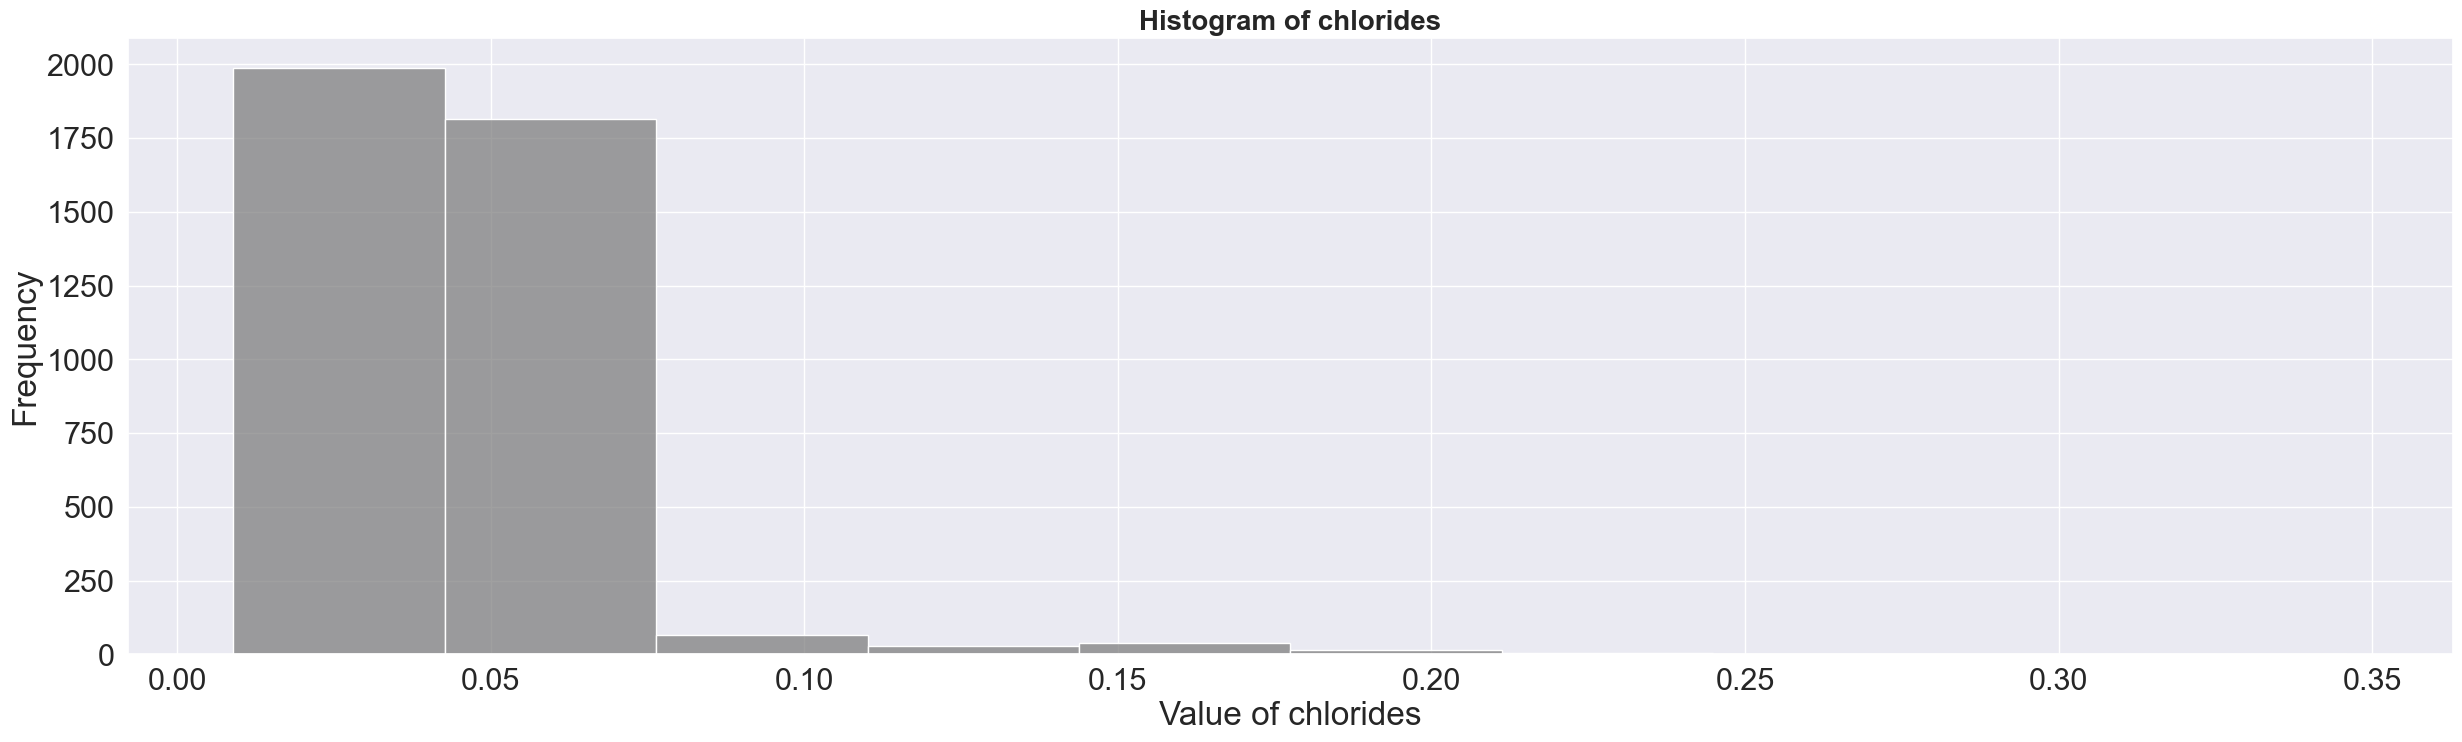

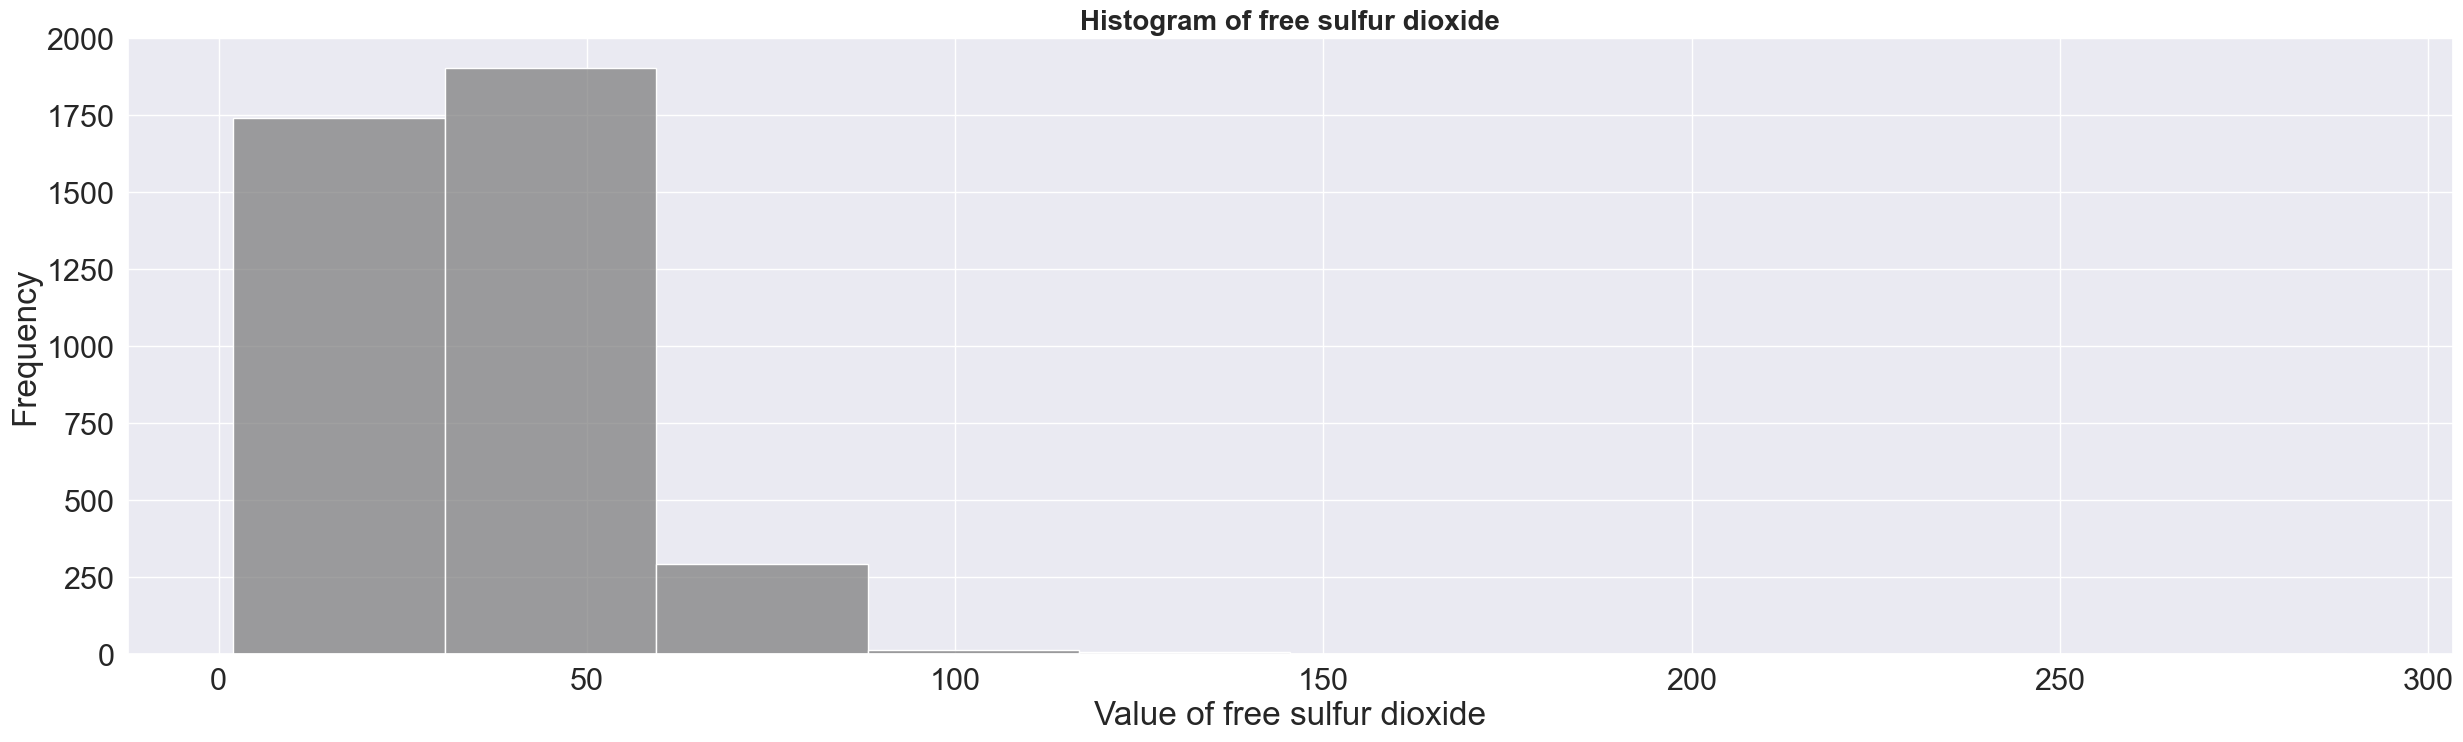

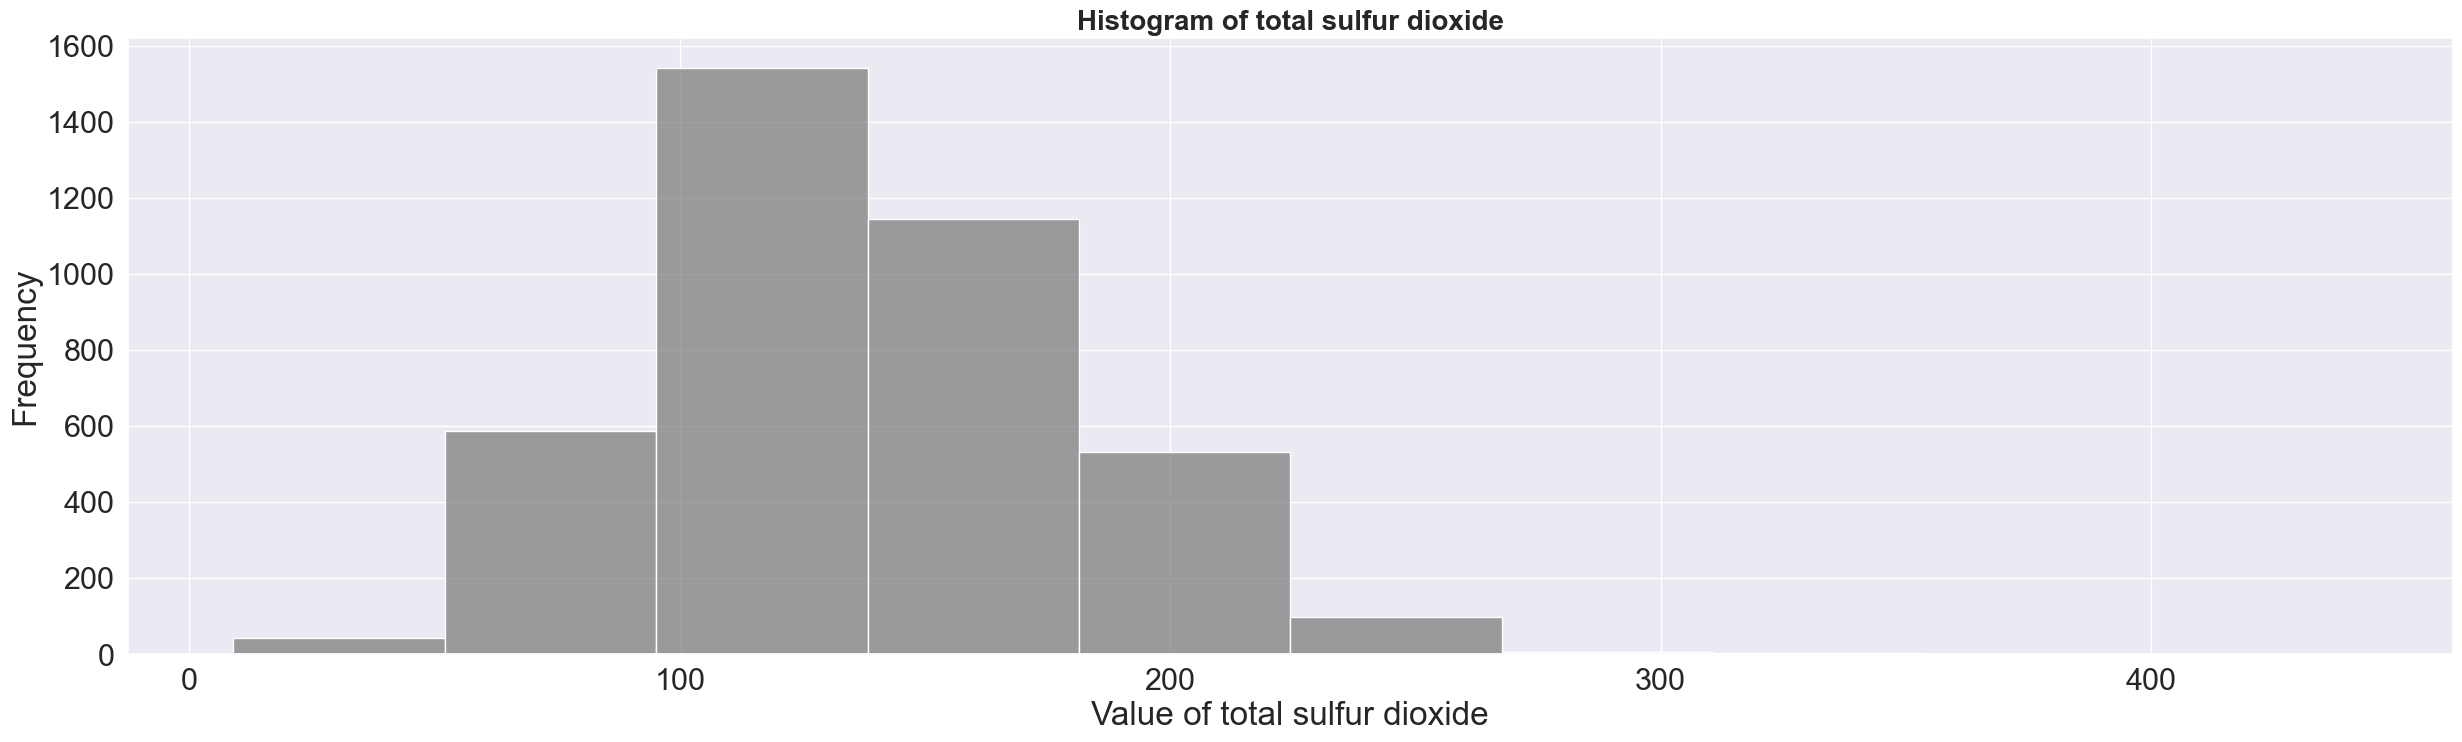

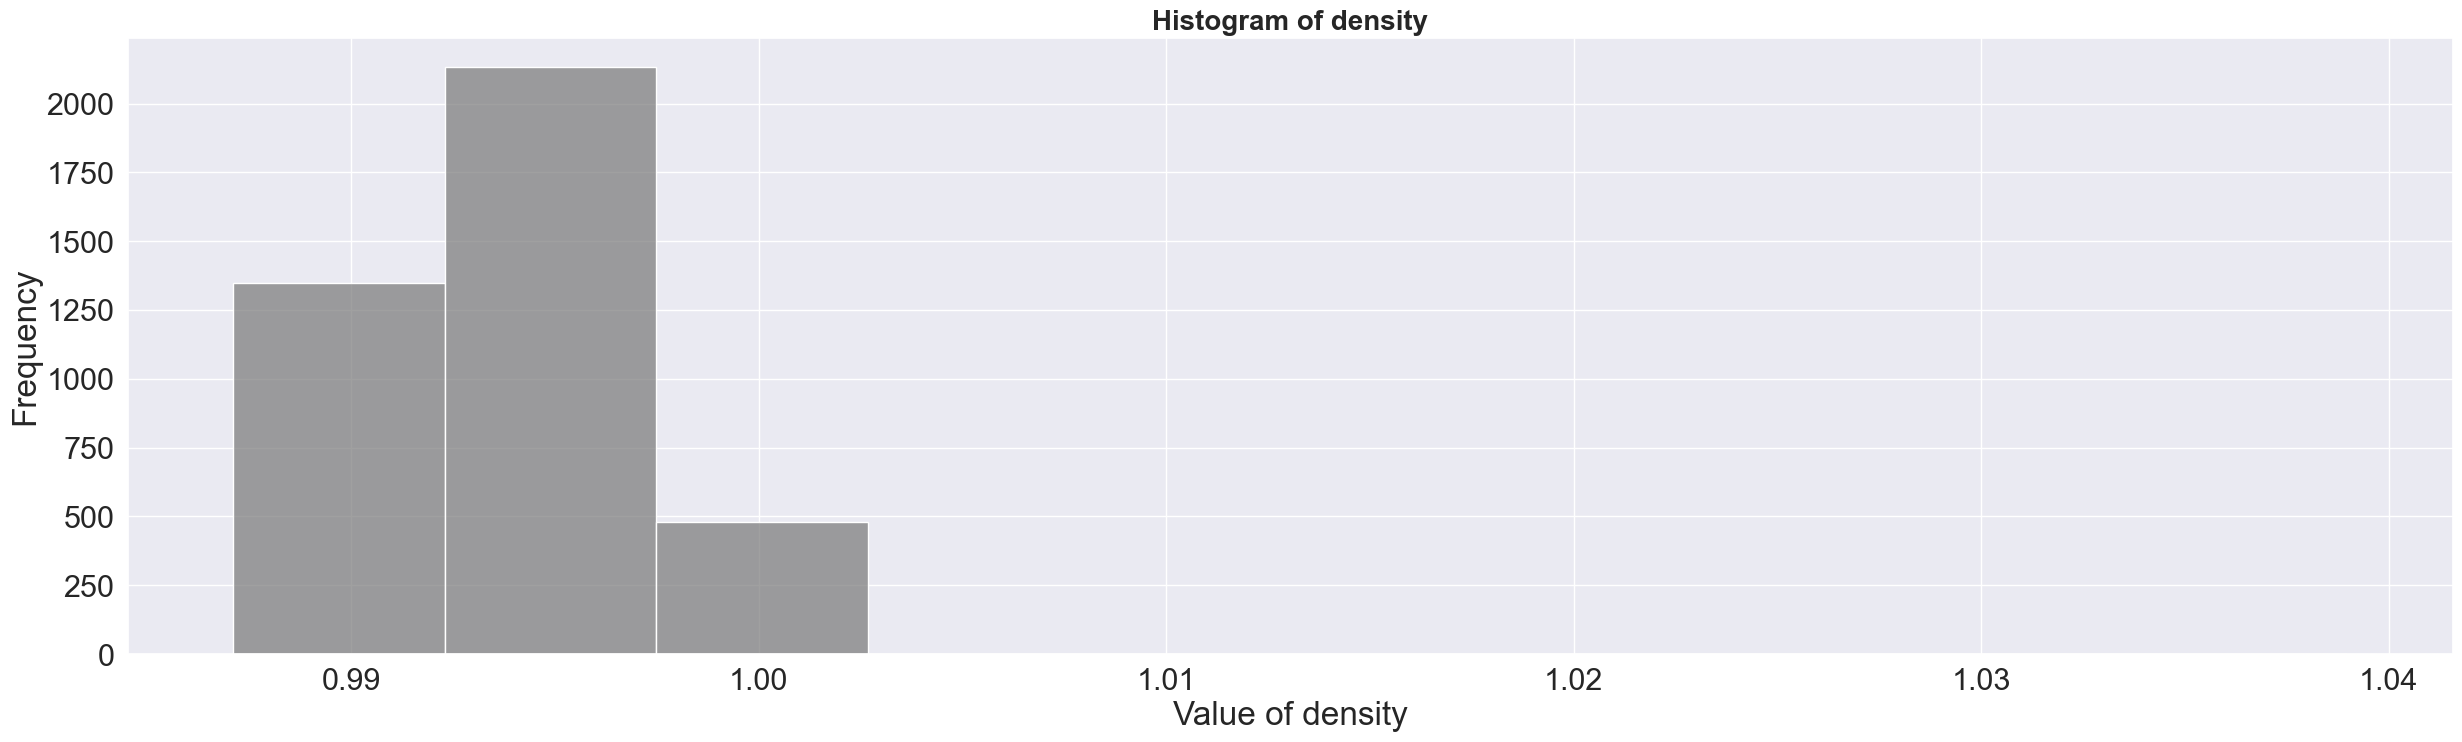

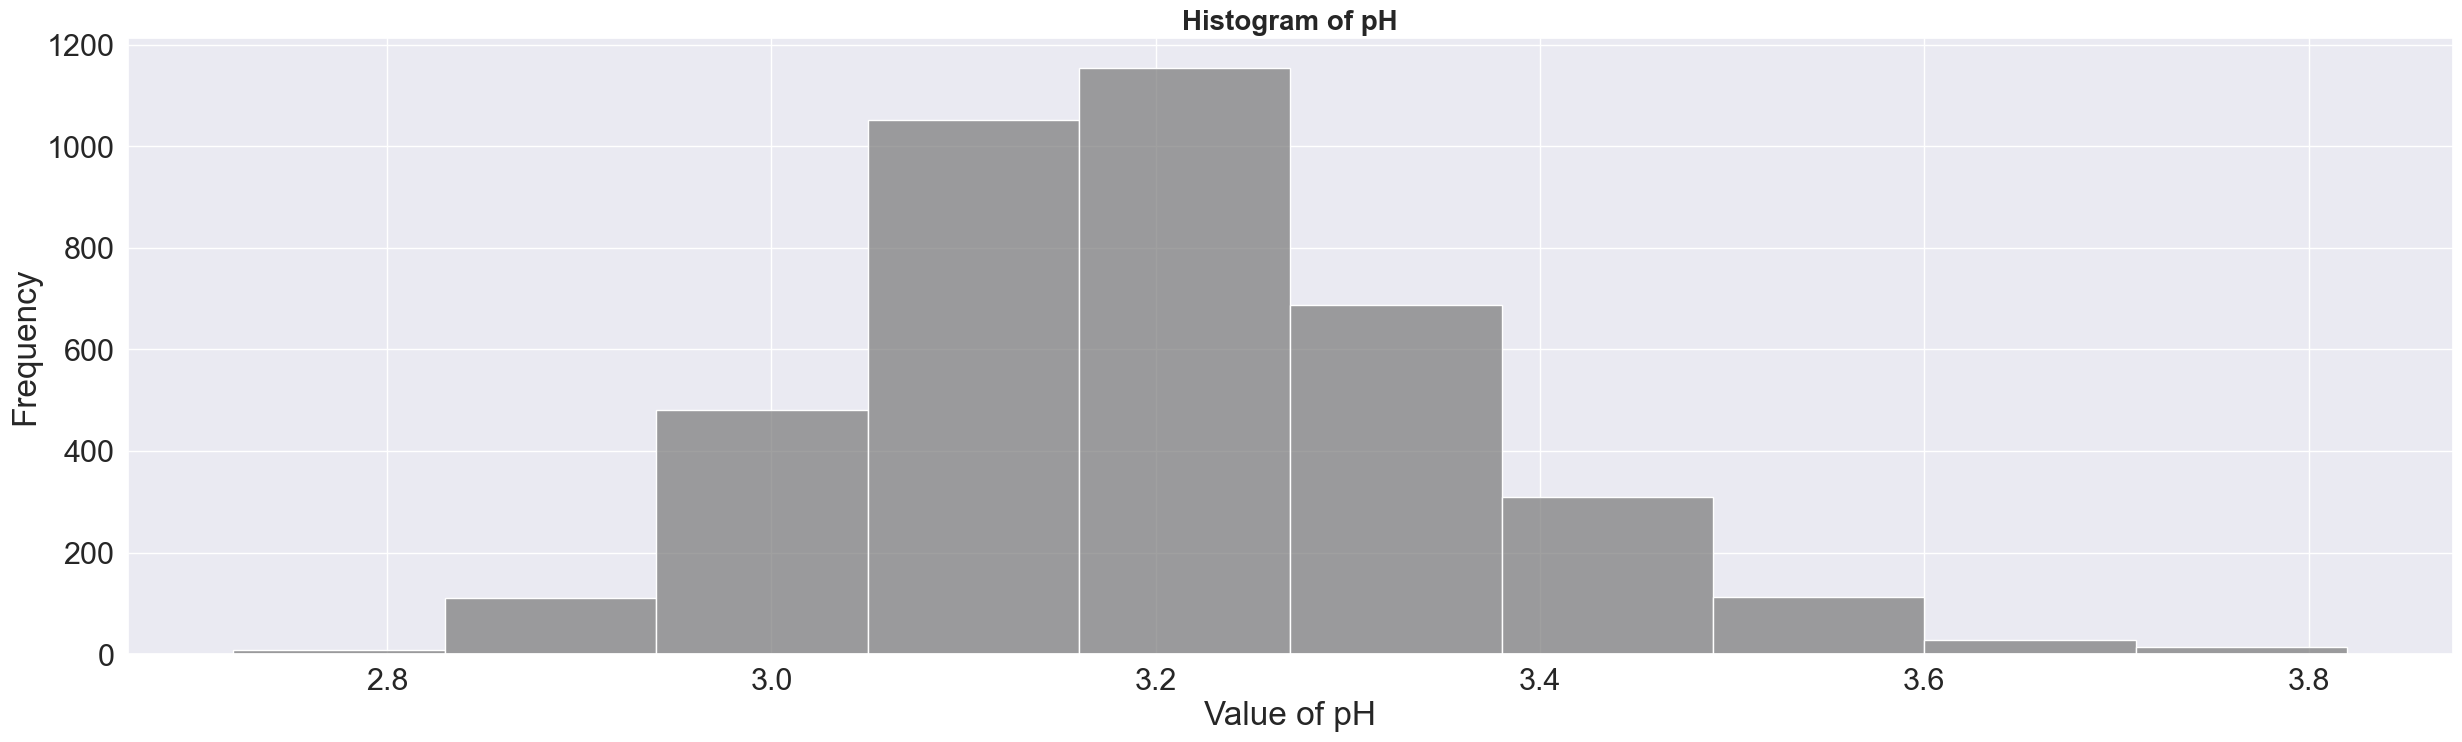

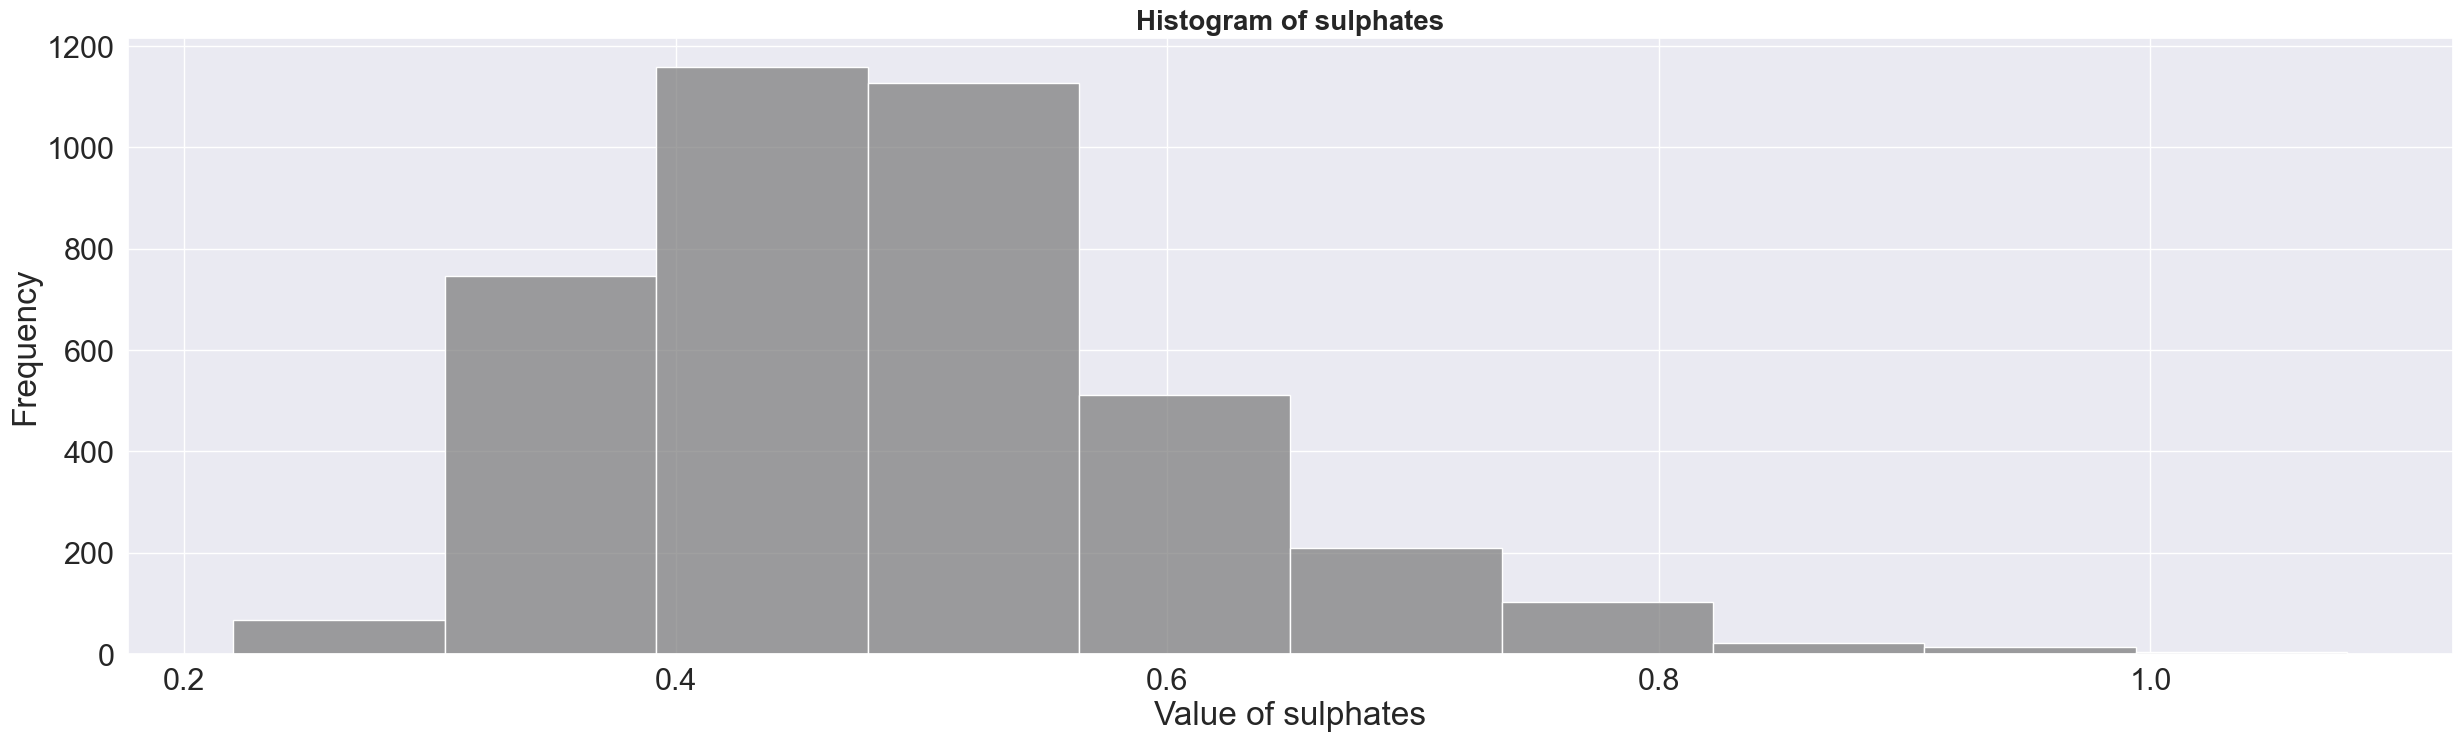

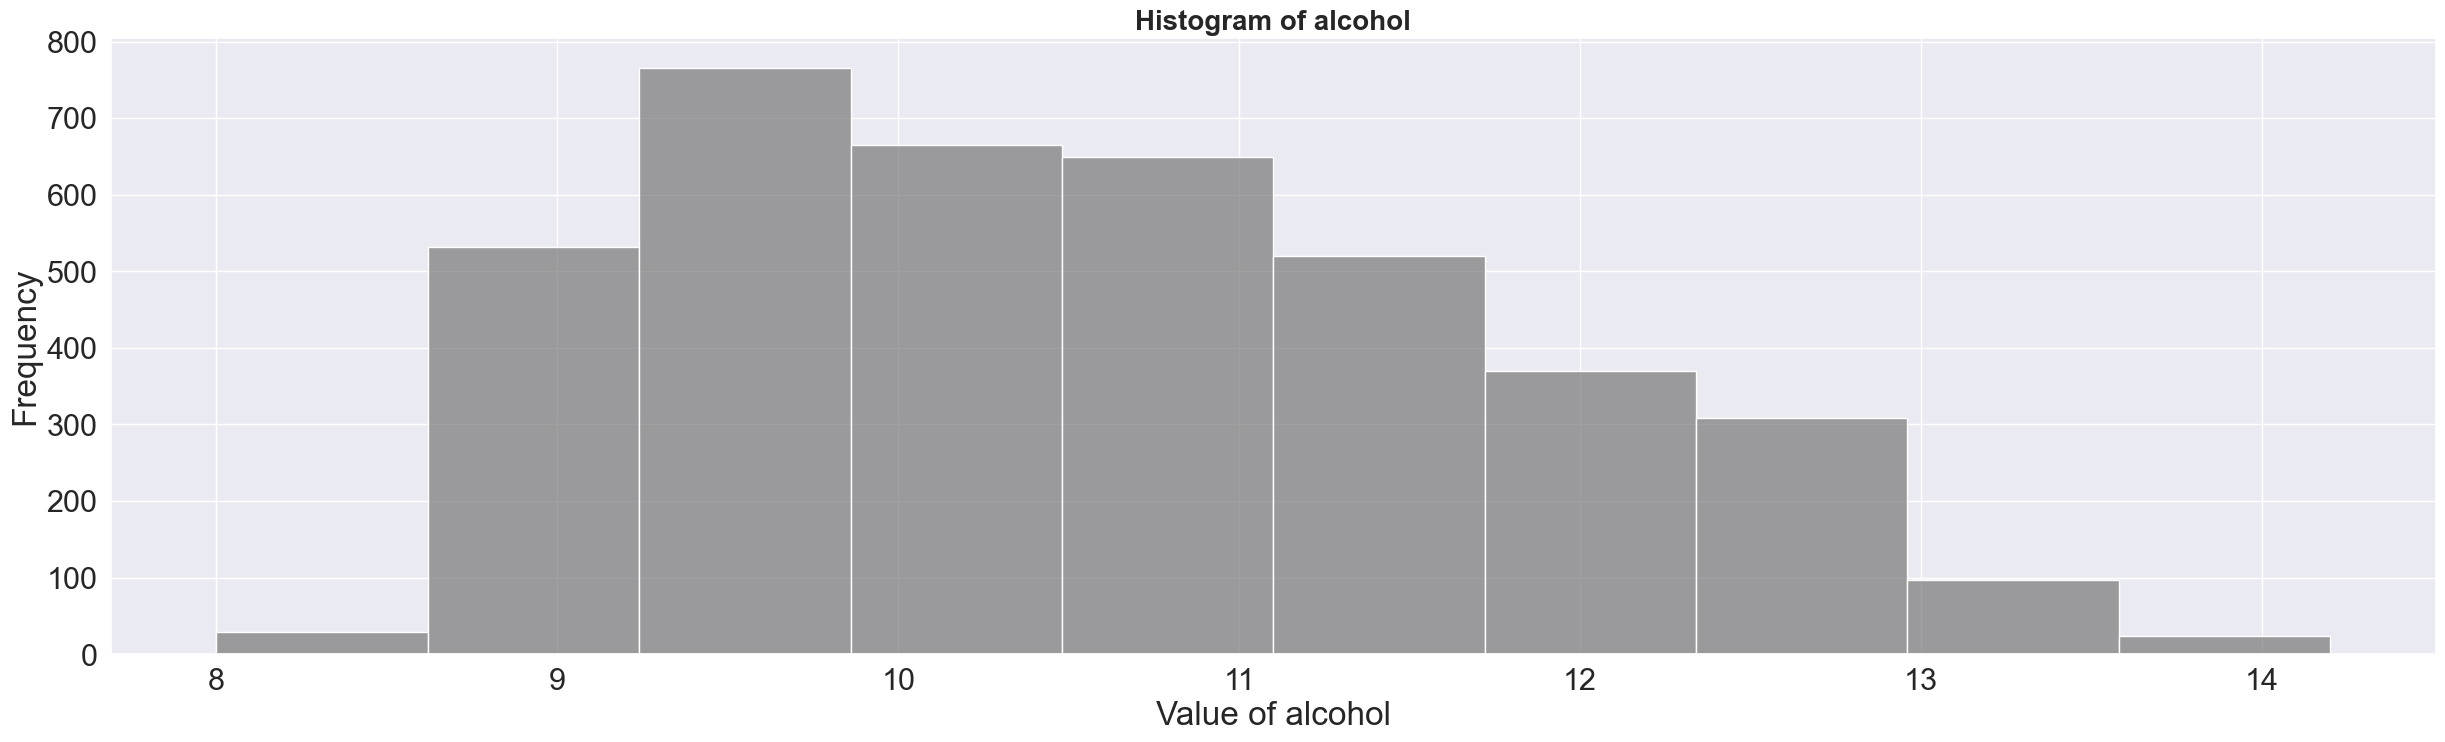

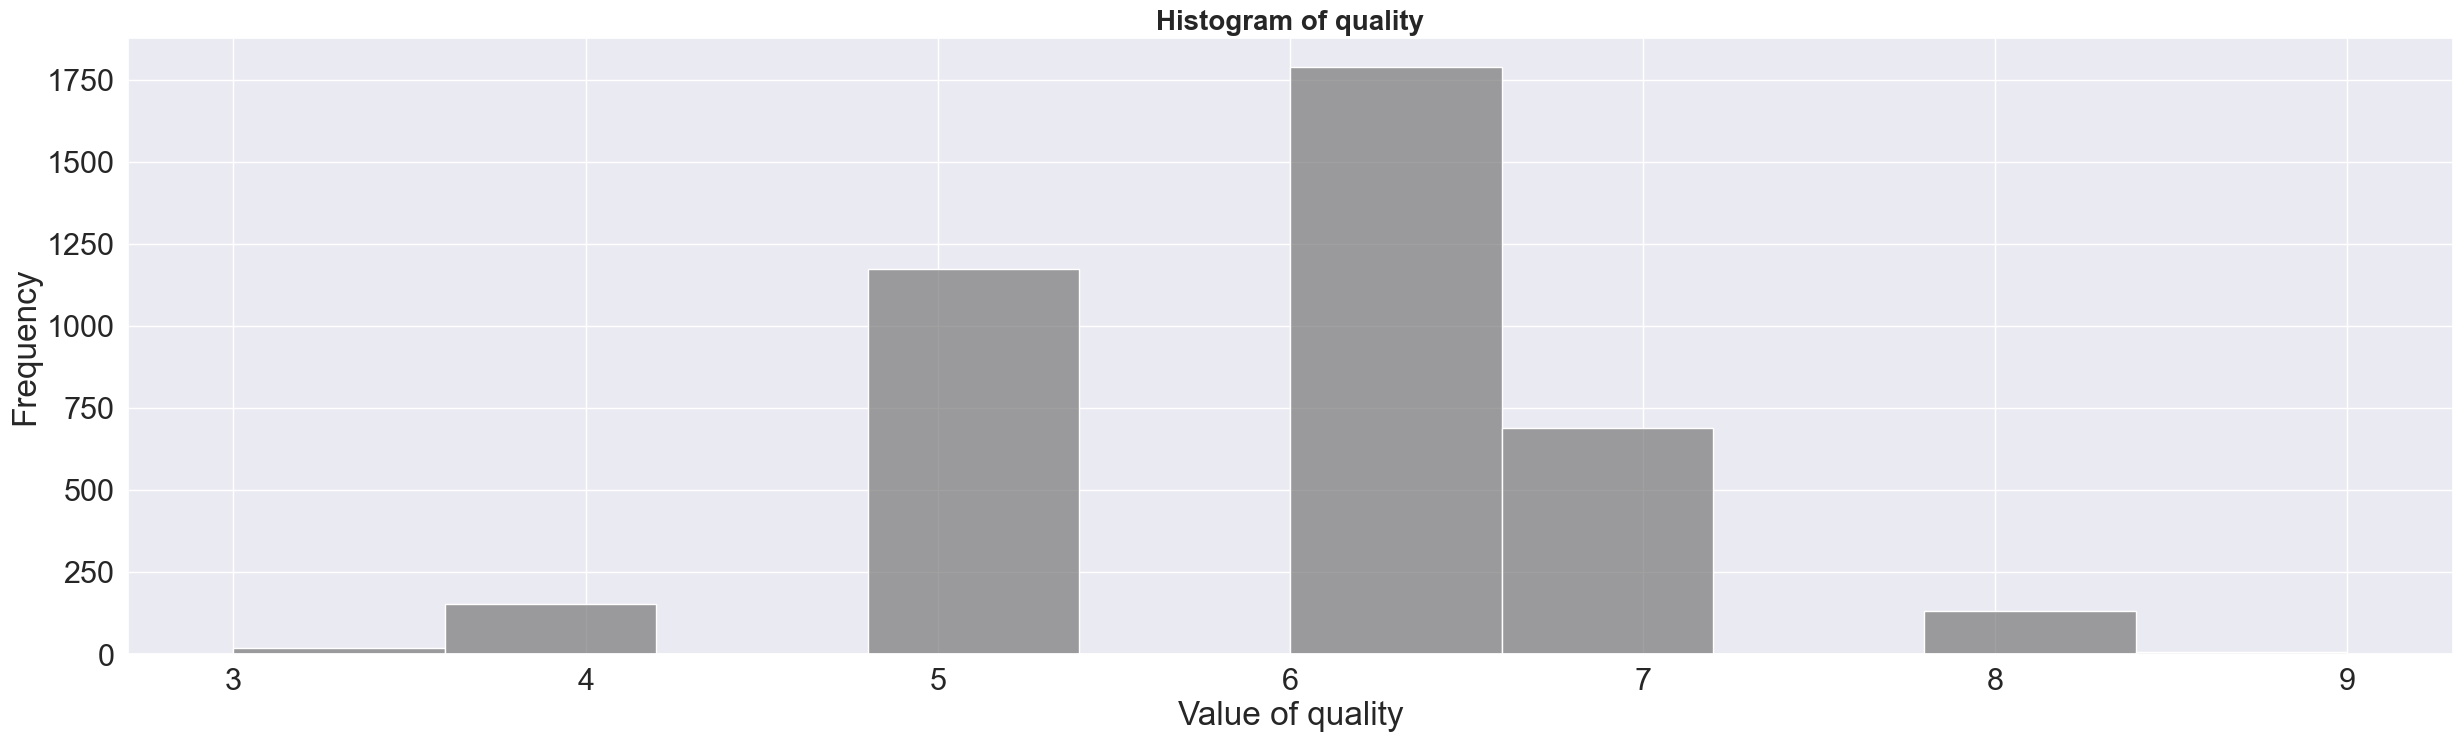

In [15]:
# For white_wine
for column in white_wine.columns:
    if white_wine[column].dtype == 'float64' or white_wine[column].dtype == 'int64':
        plt.figure(figsize=(30, 8))
        sns.histplot(white_wine[column], bins=10 , color = 'grey')
        plt.xlabel(f'Value of {column}')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}', fontweight= 'bold', fontsize= 20)
        plt.show()


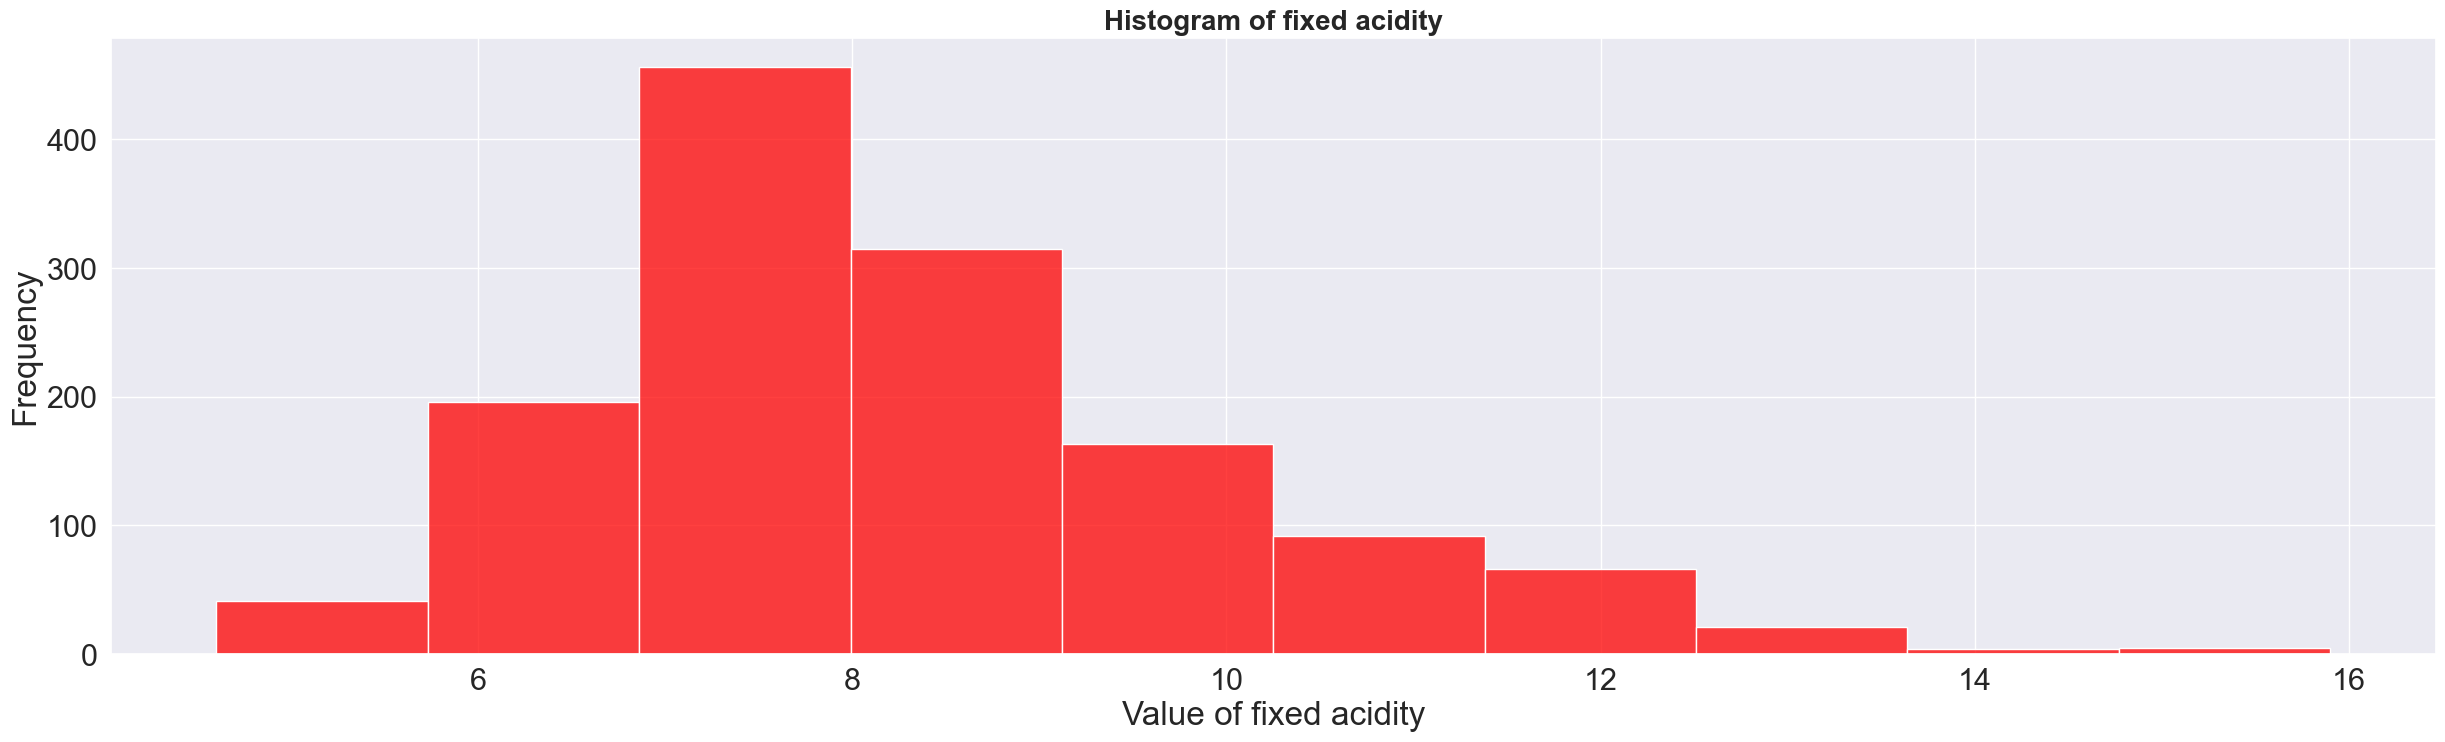

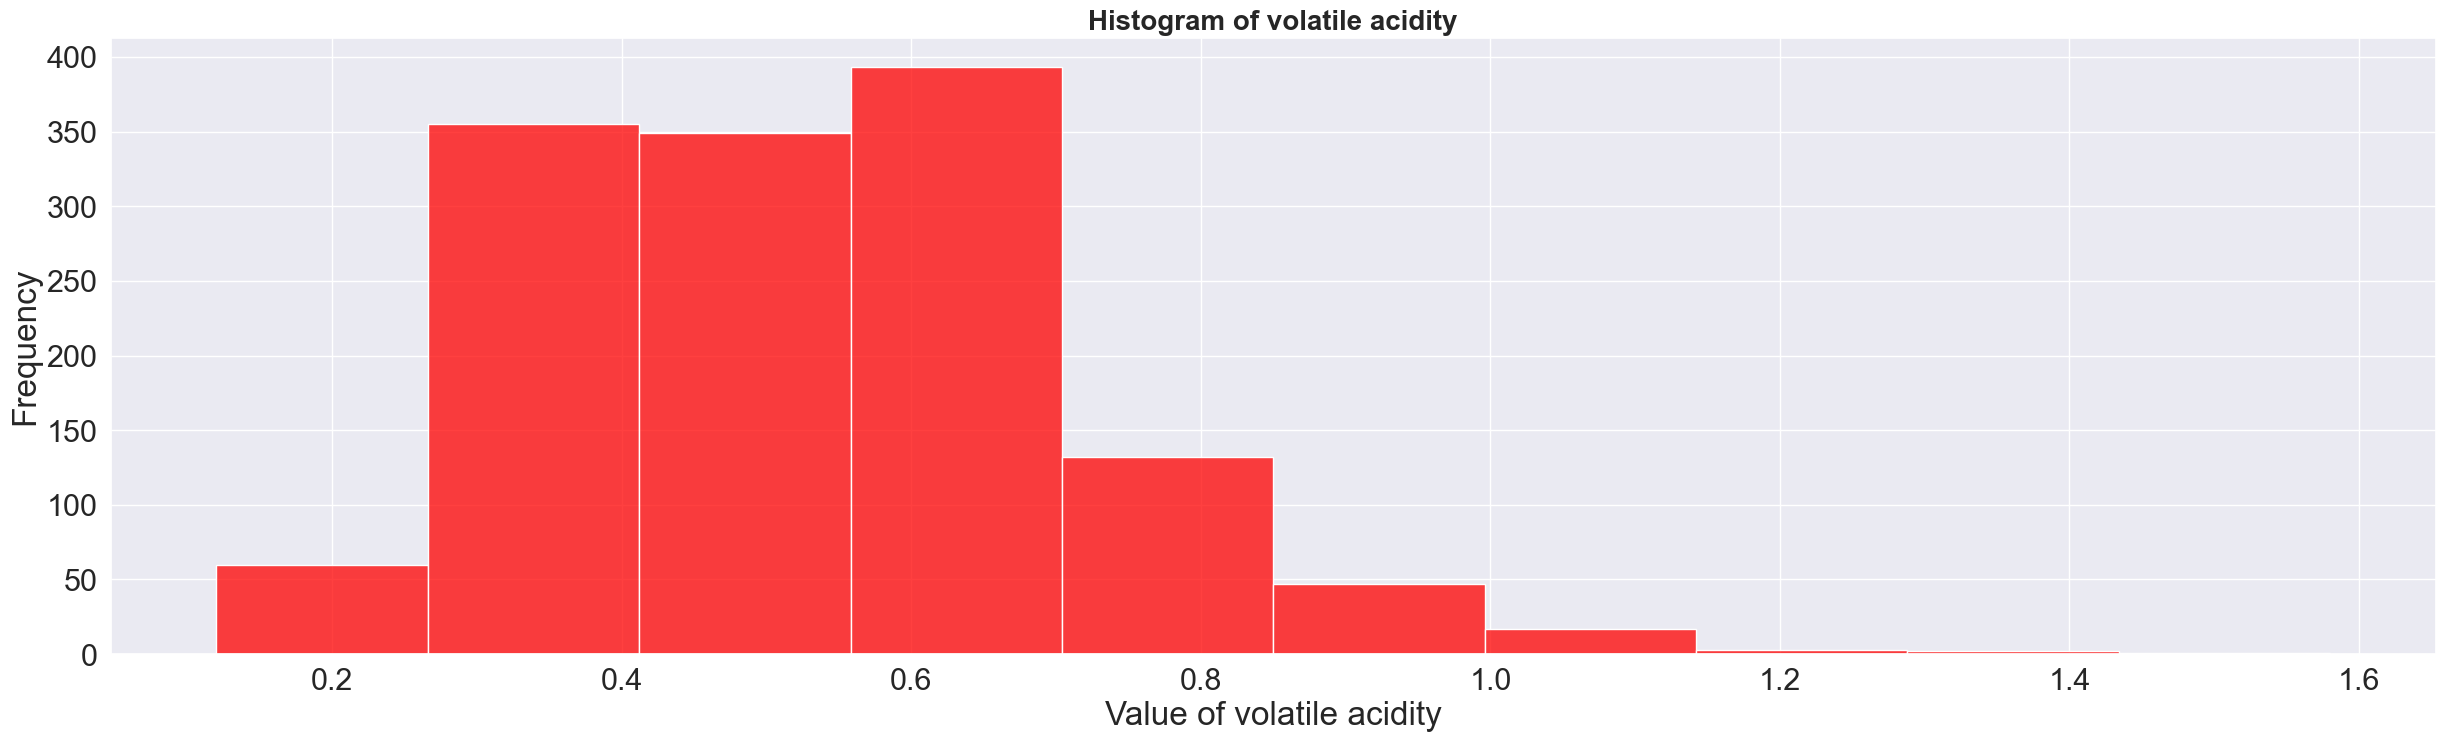

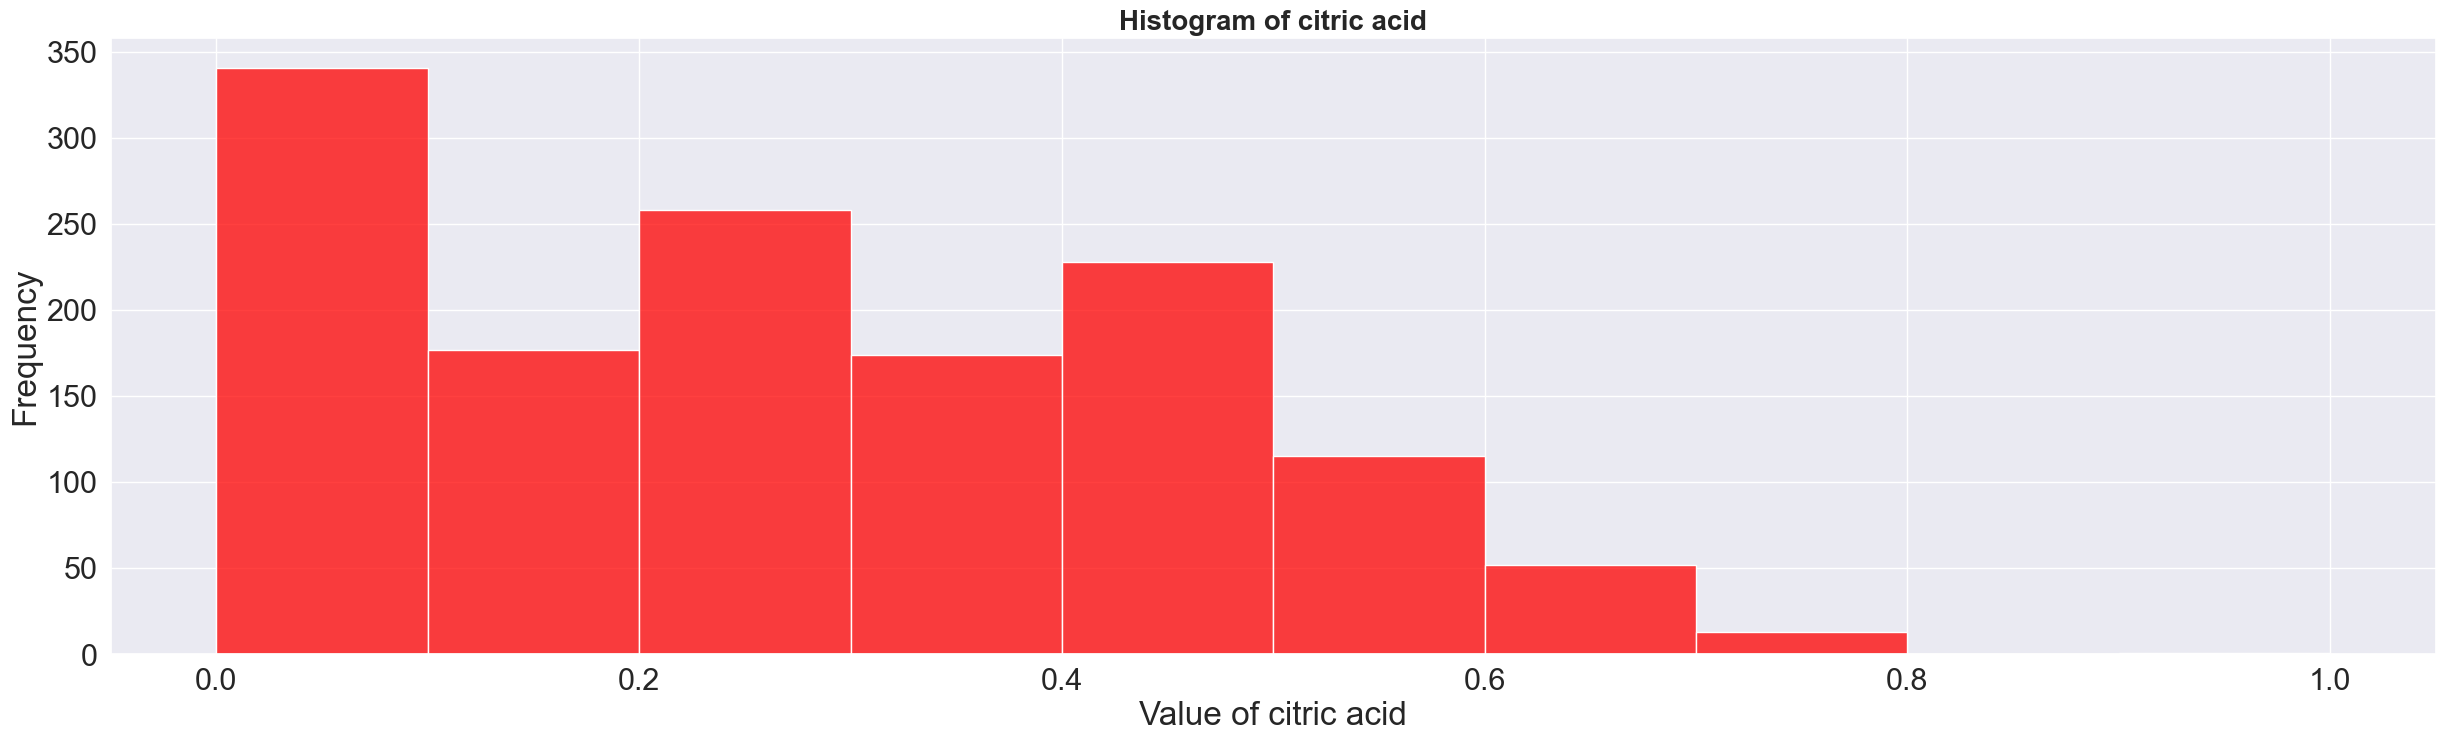

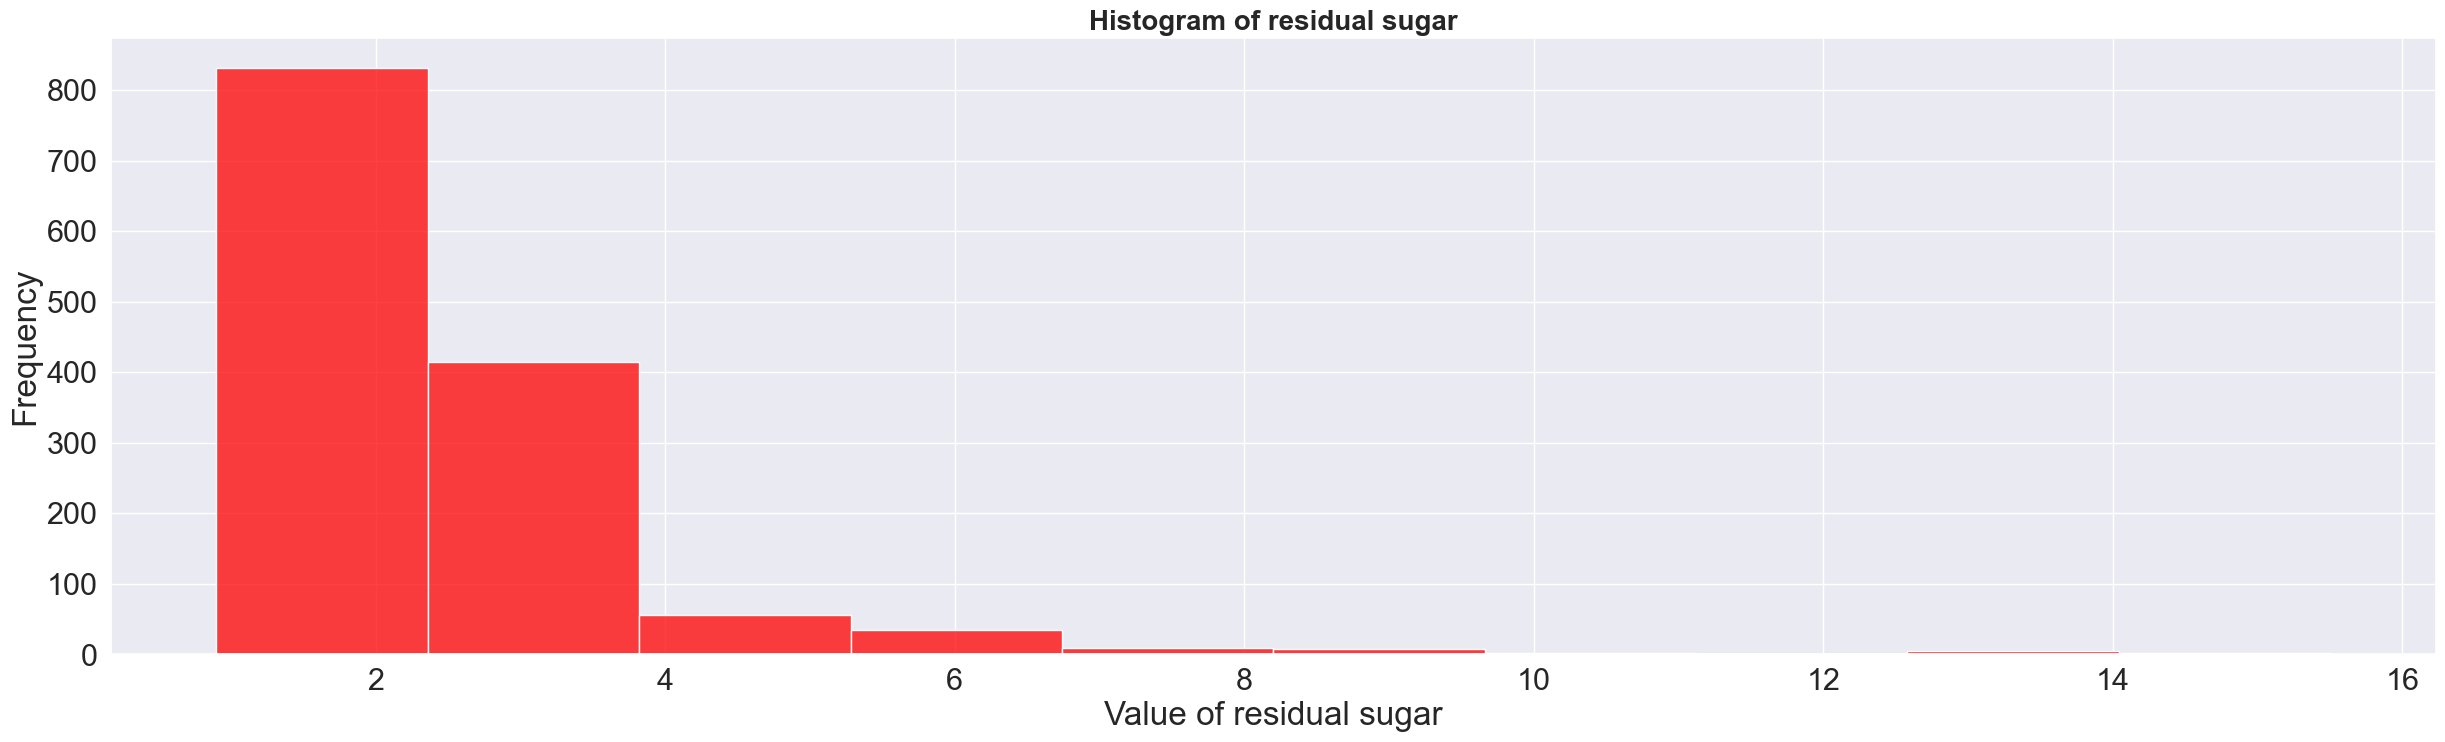

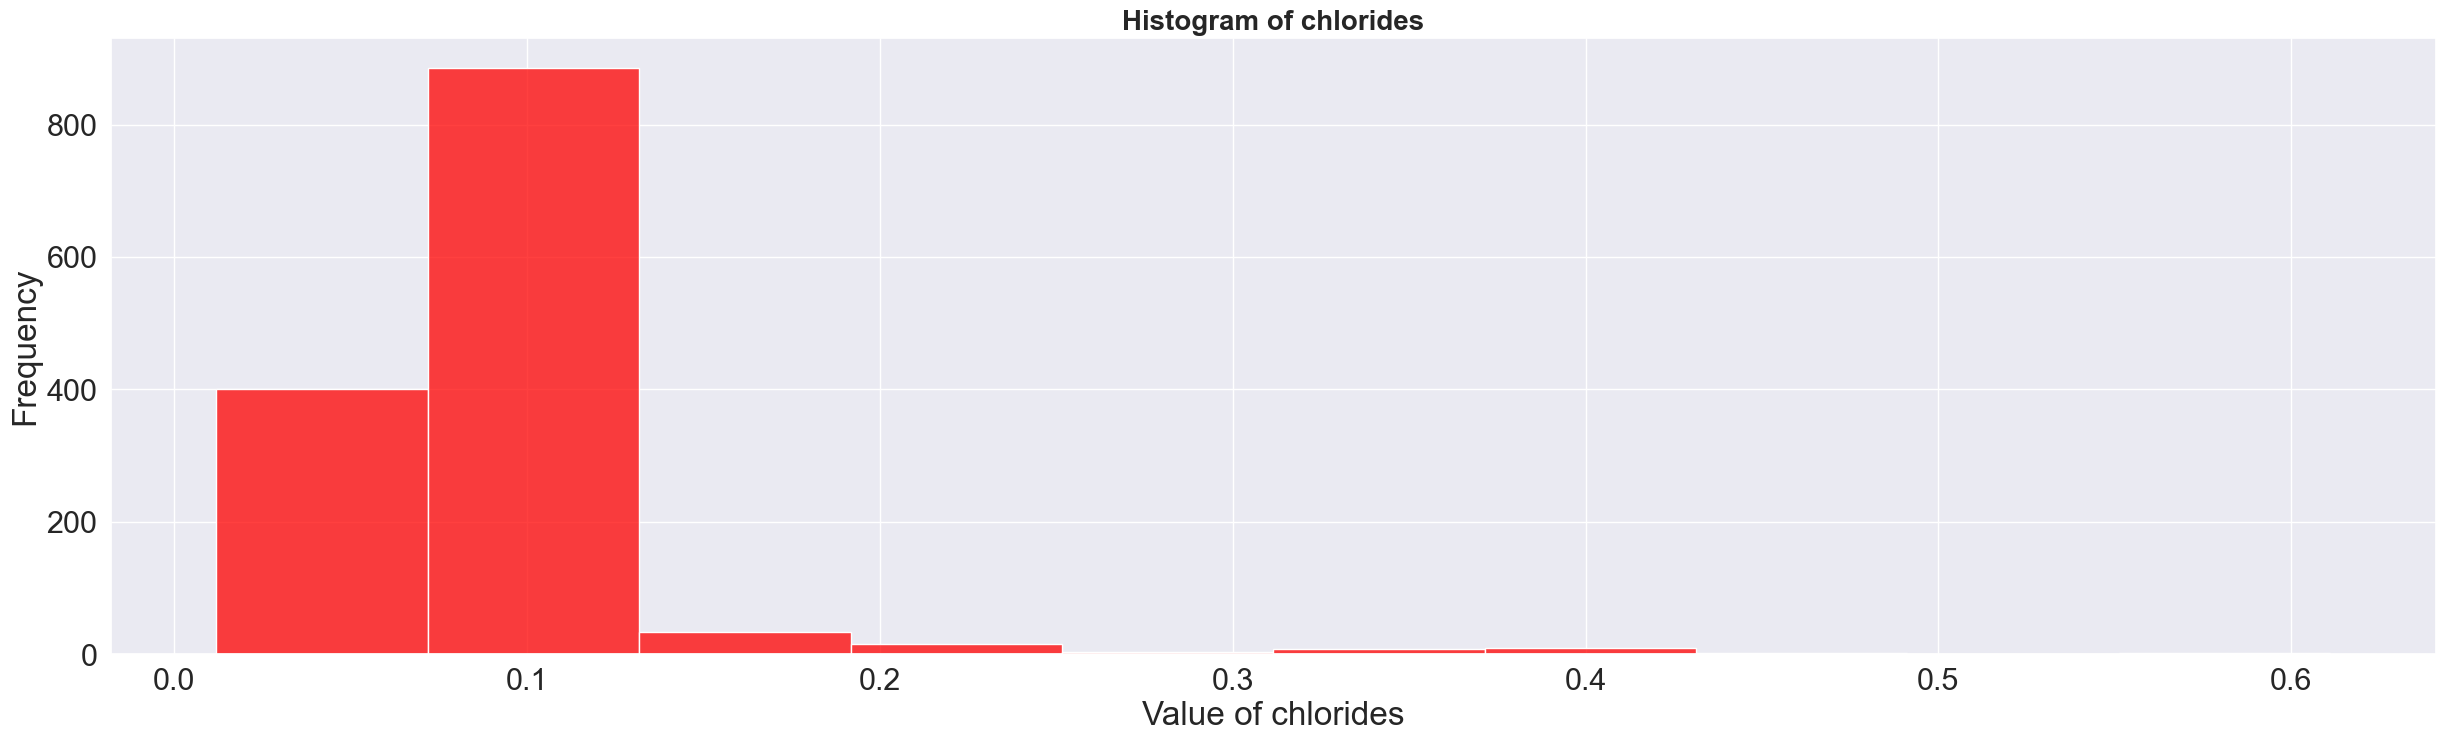

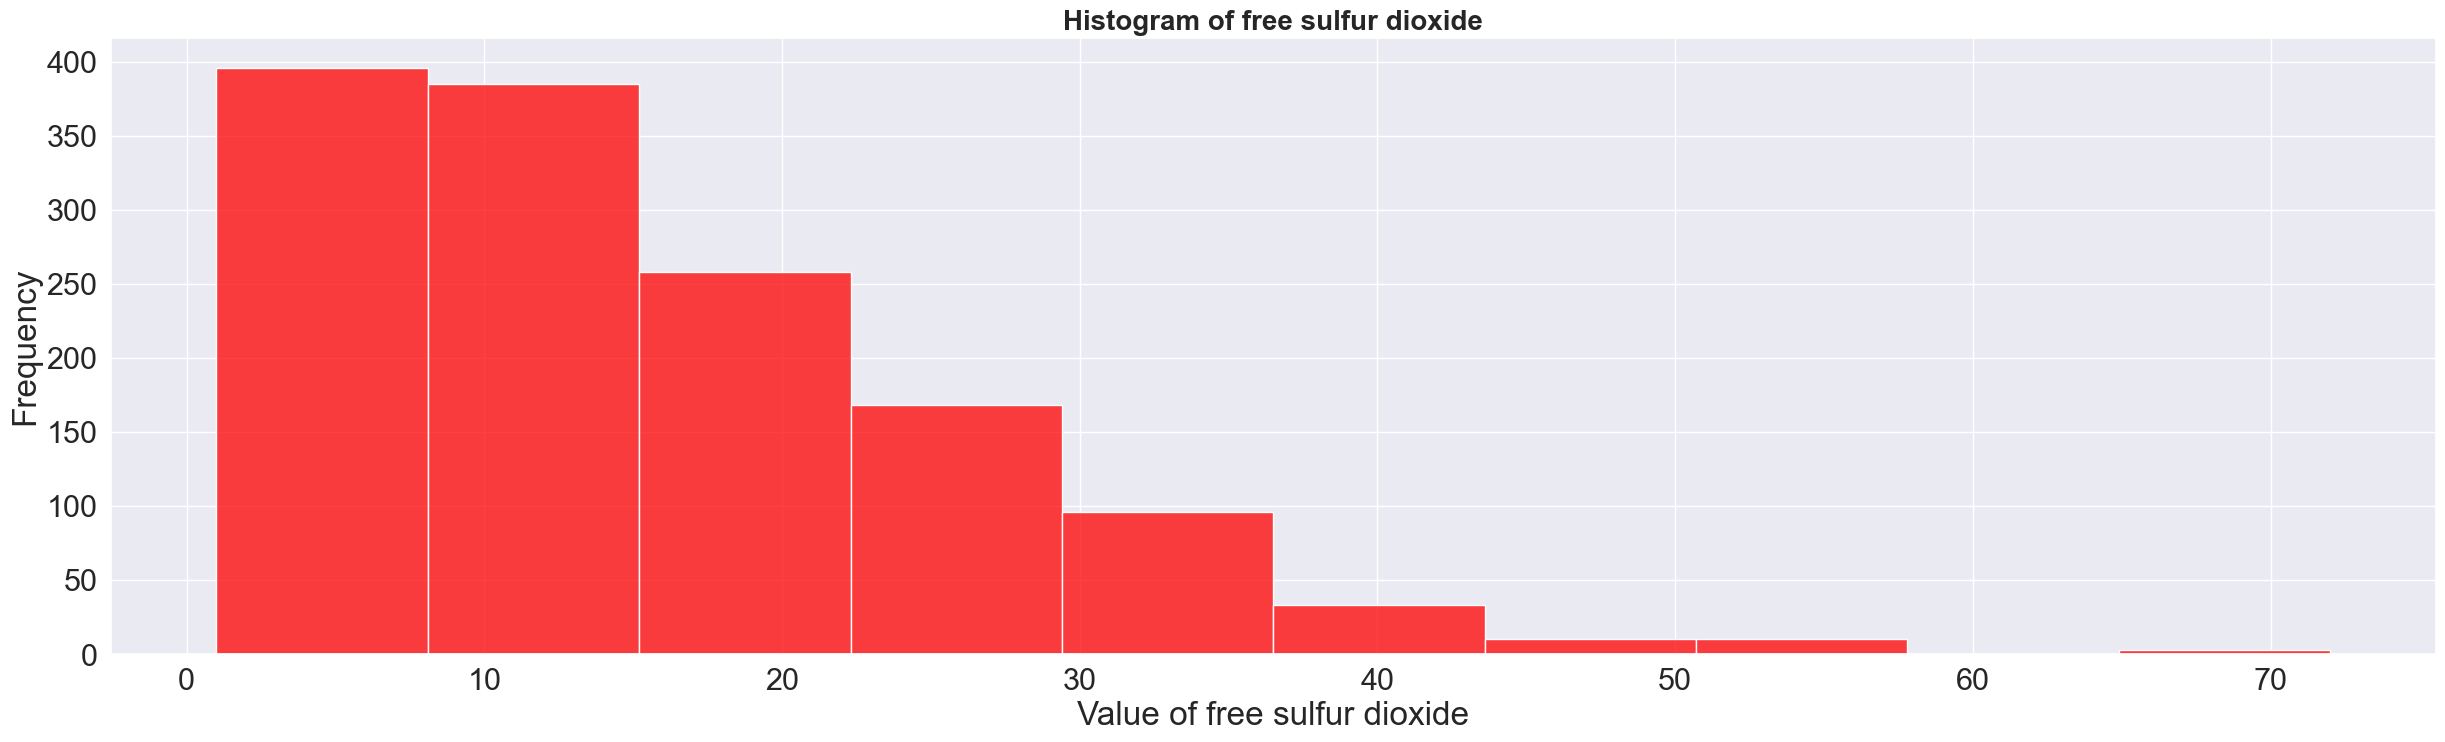

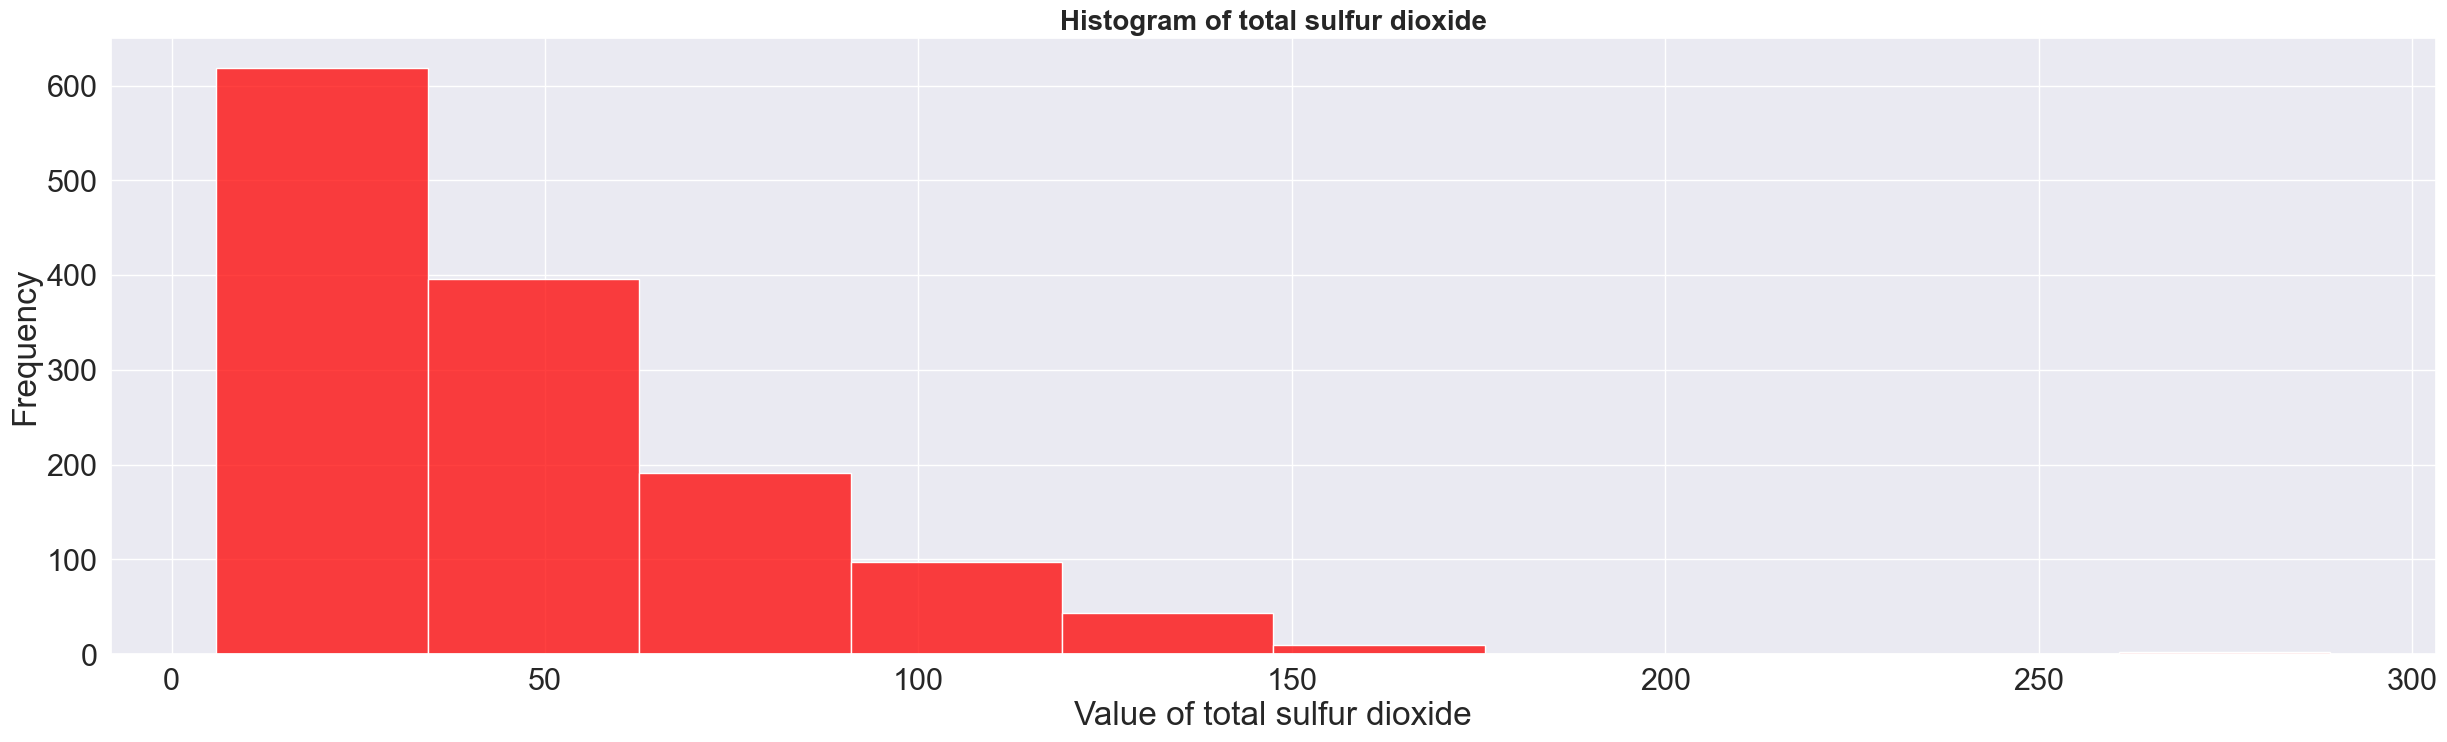

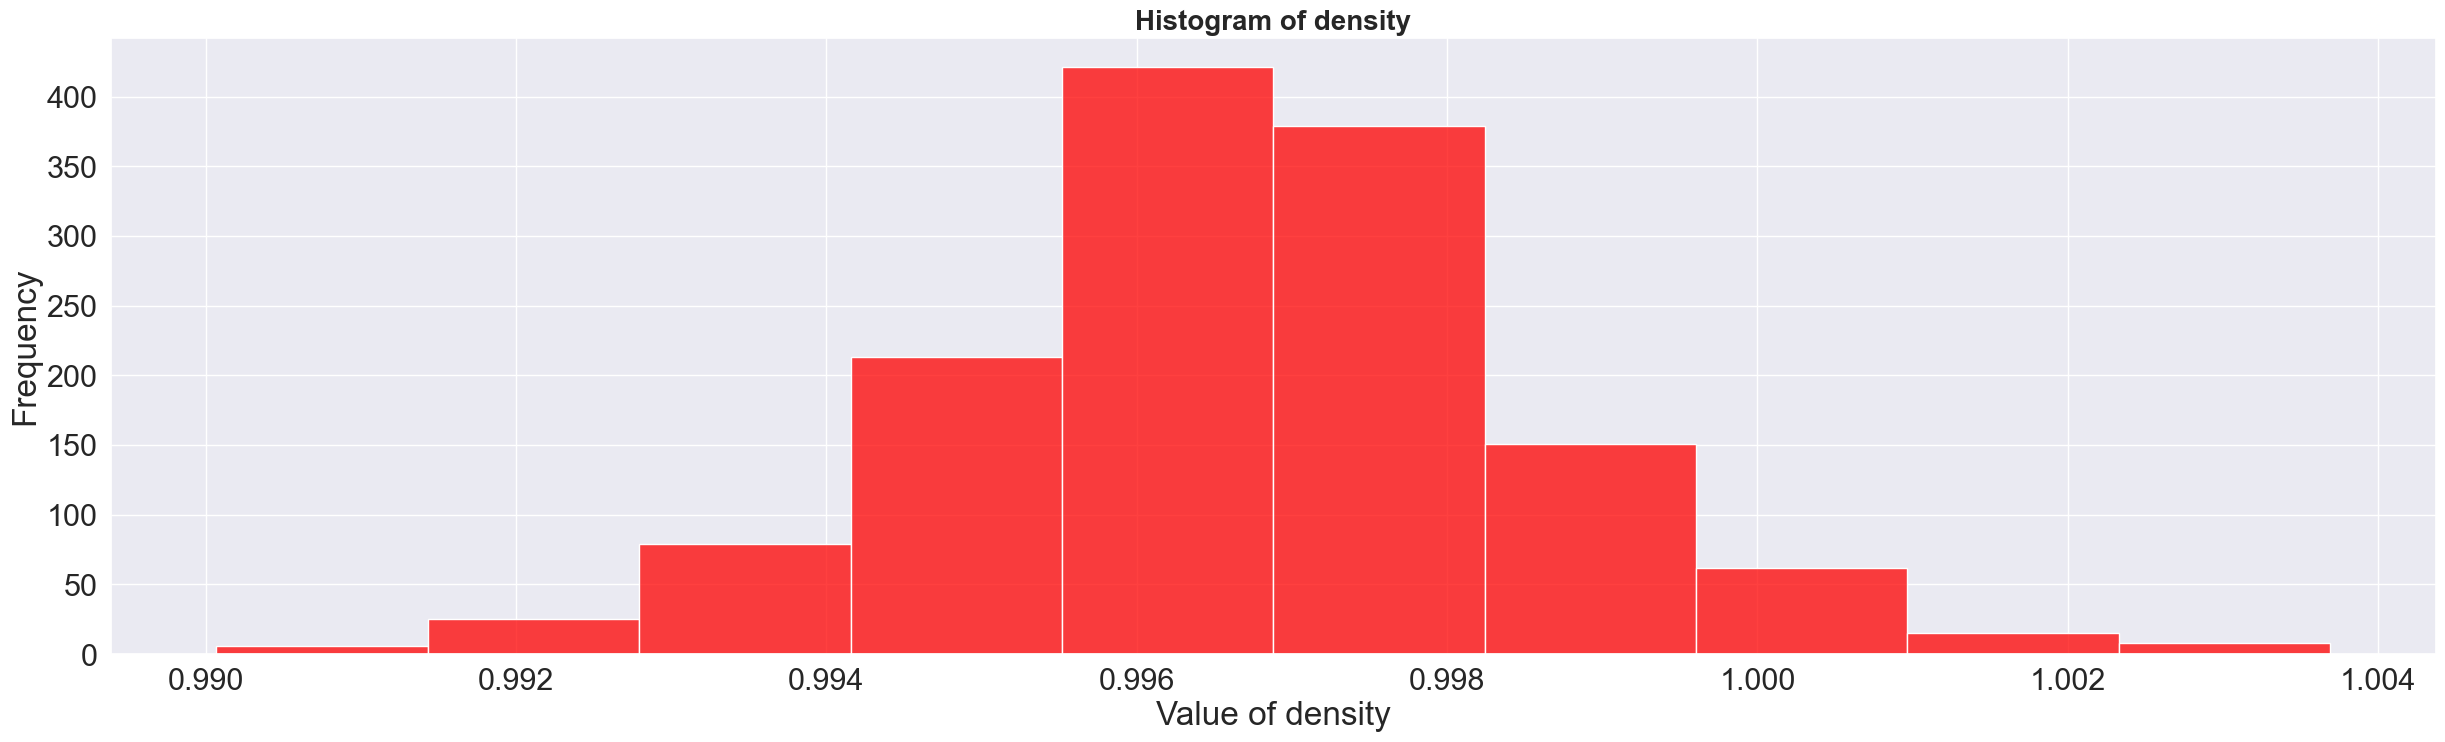

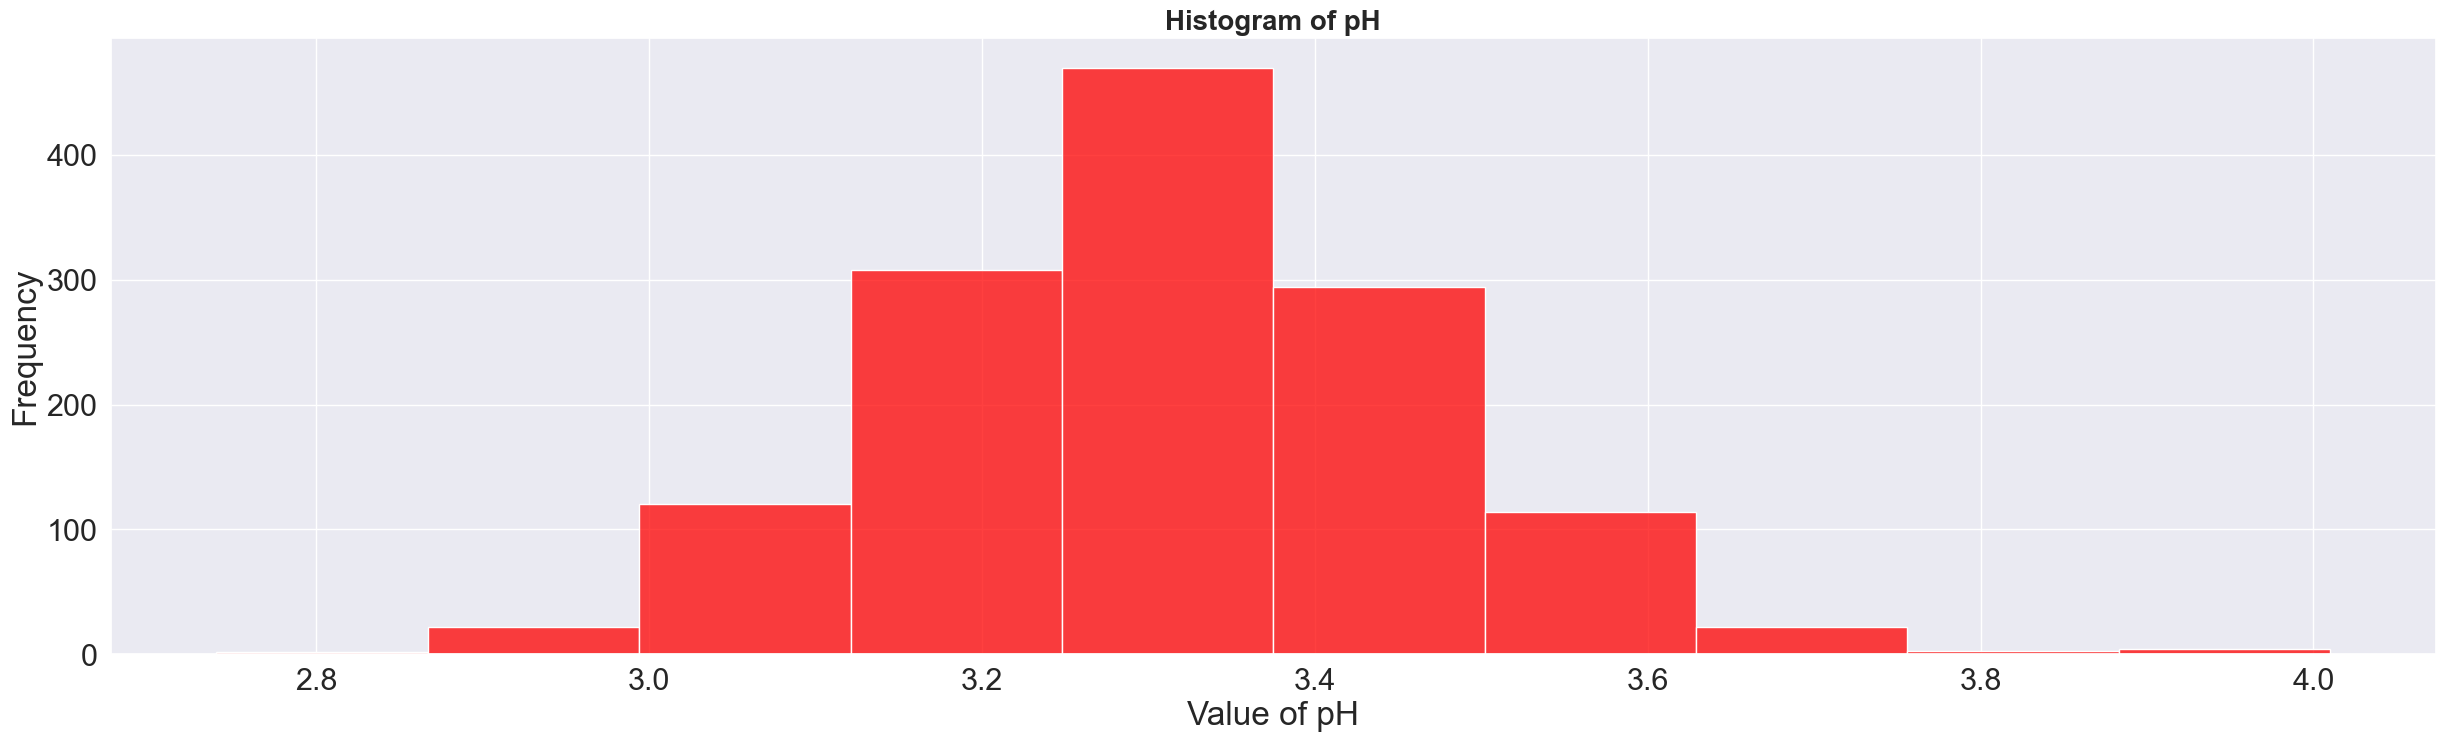

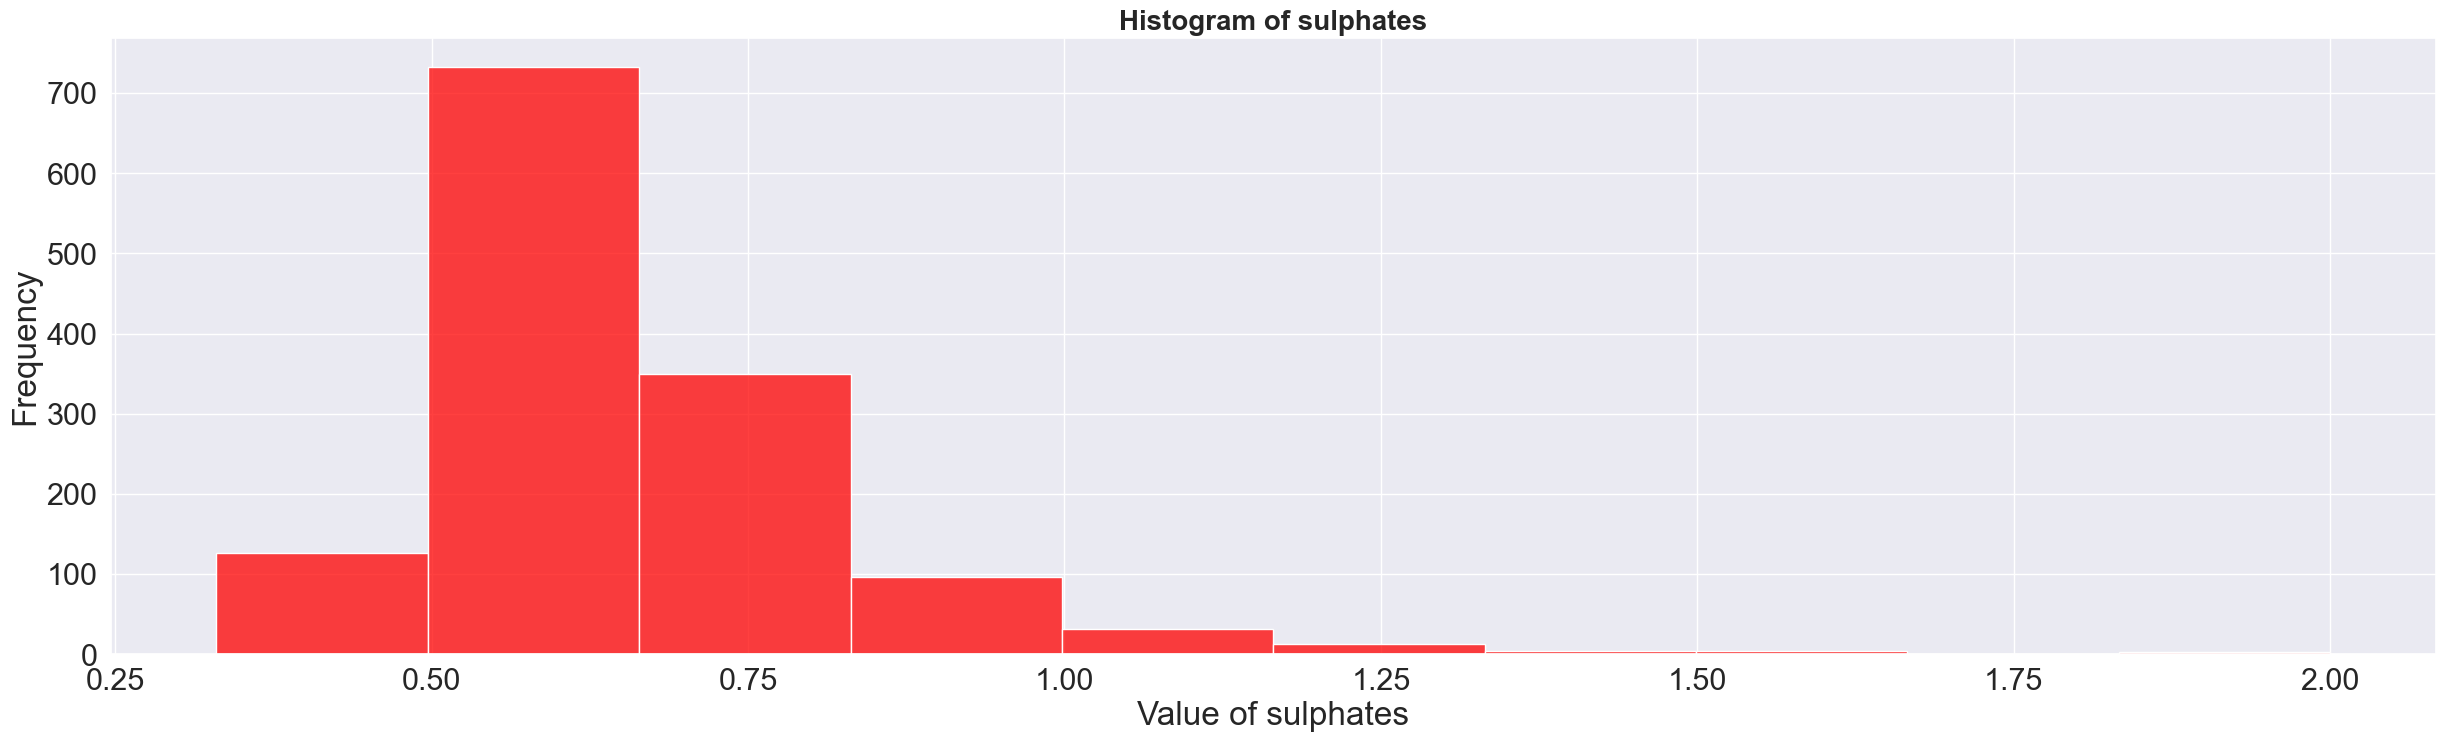

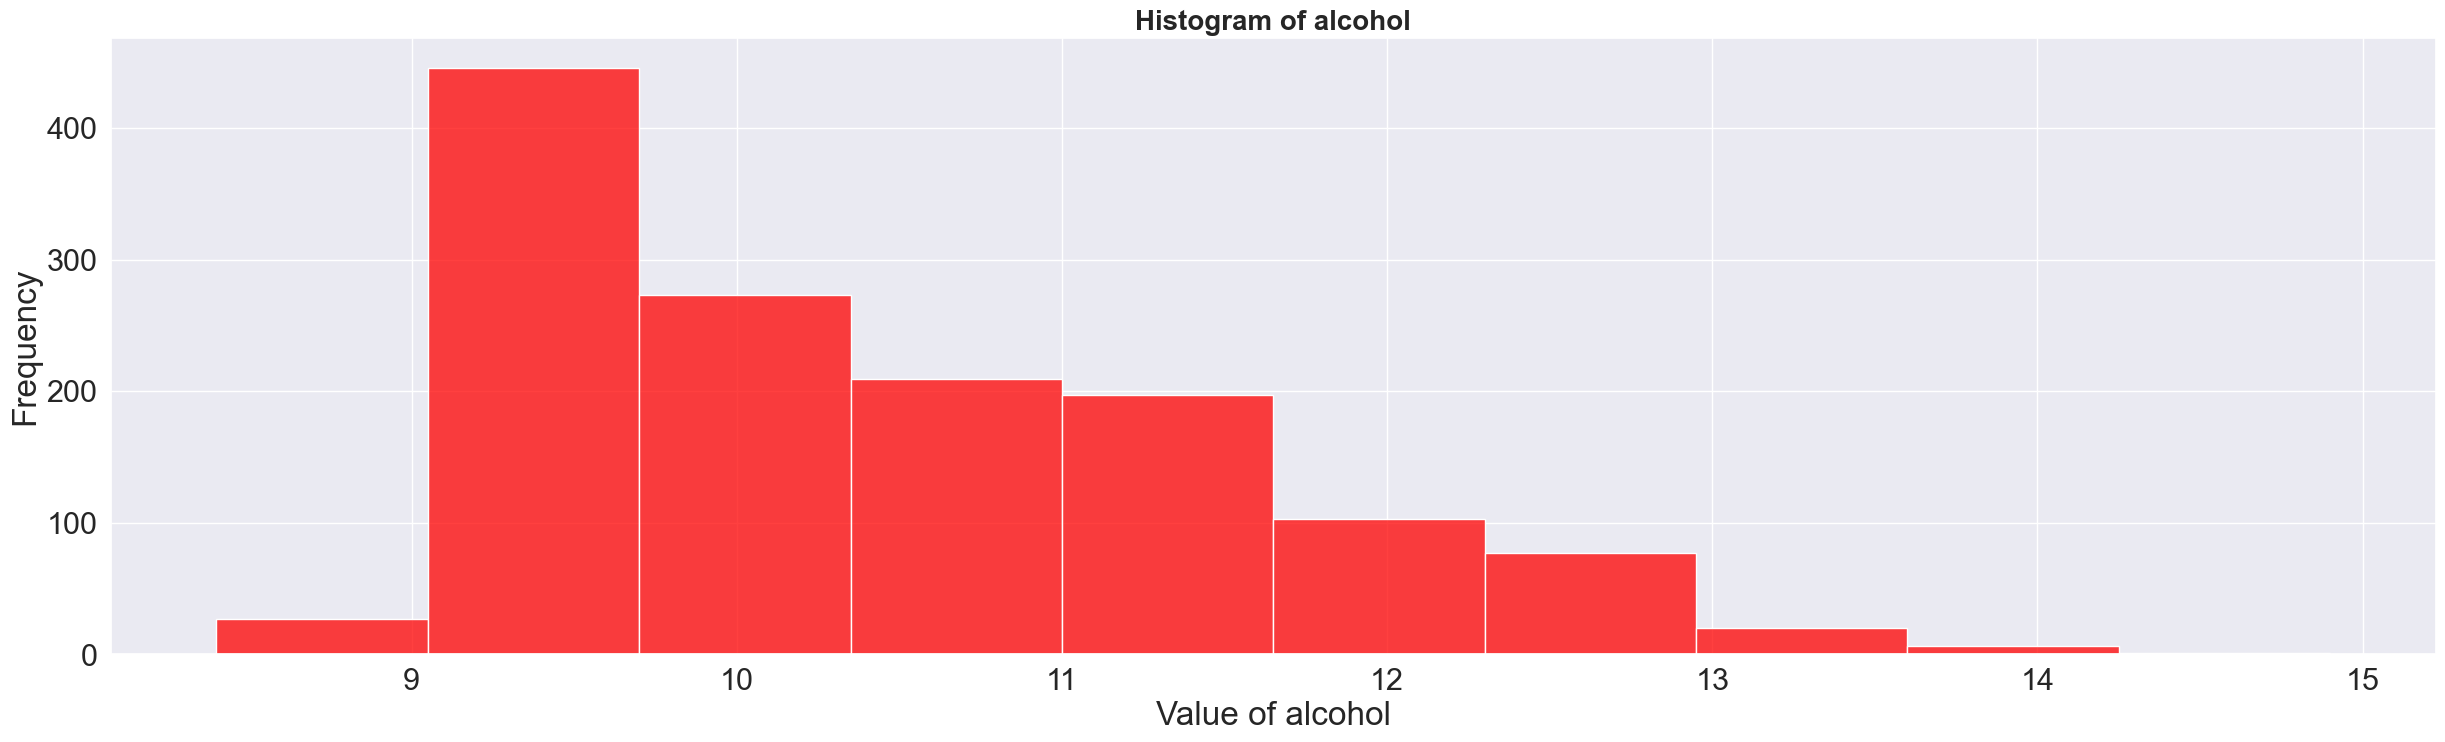

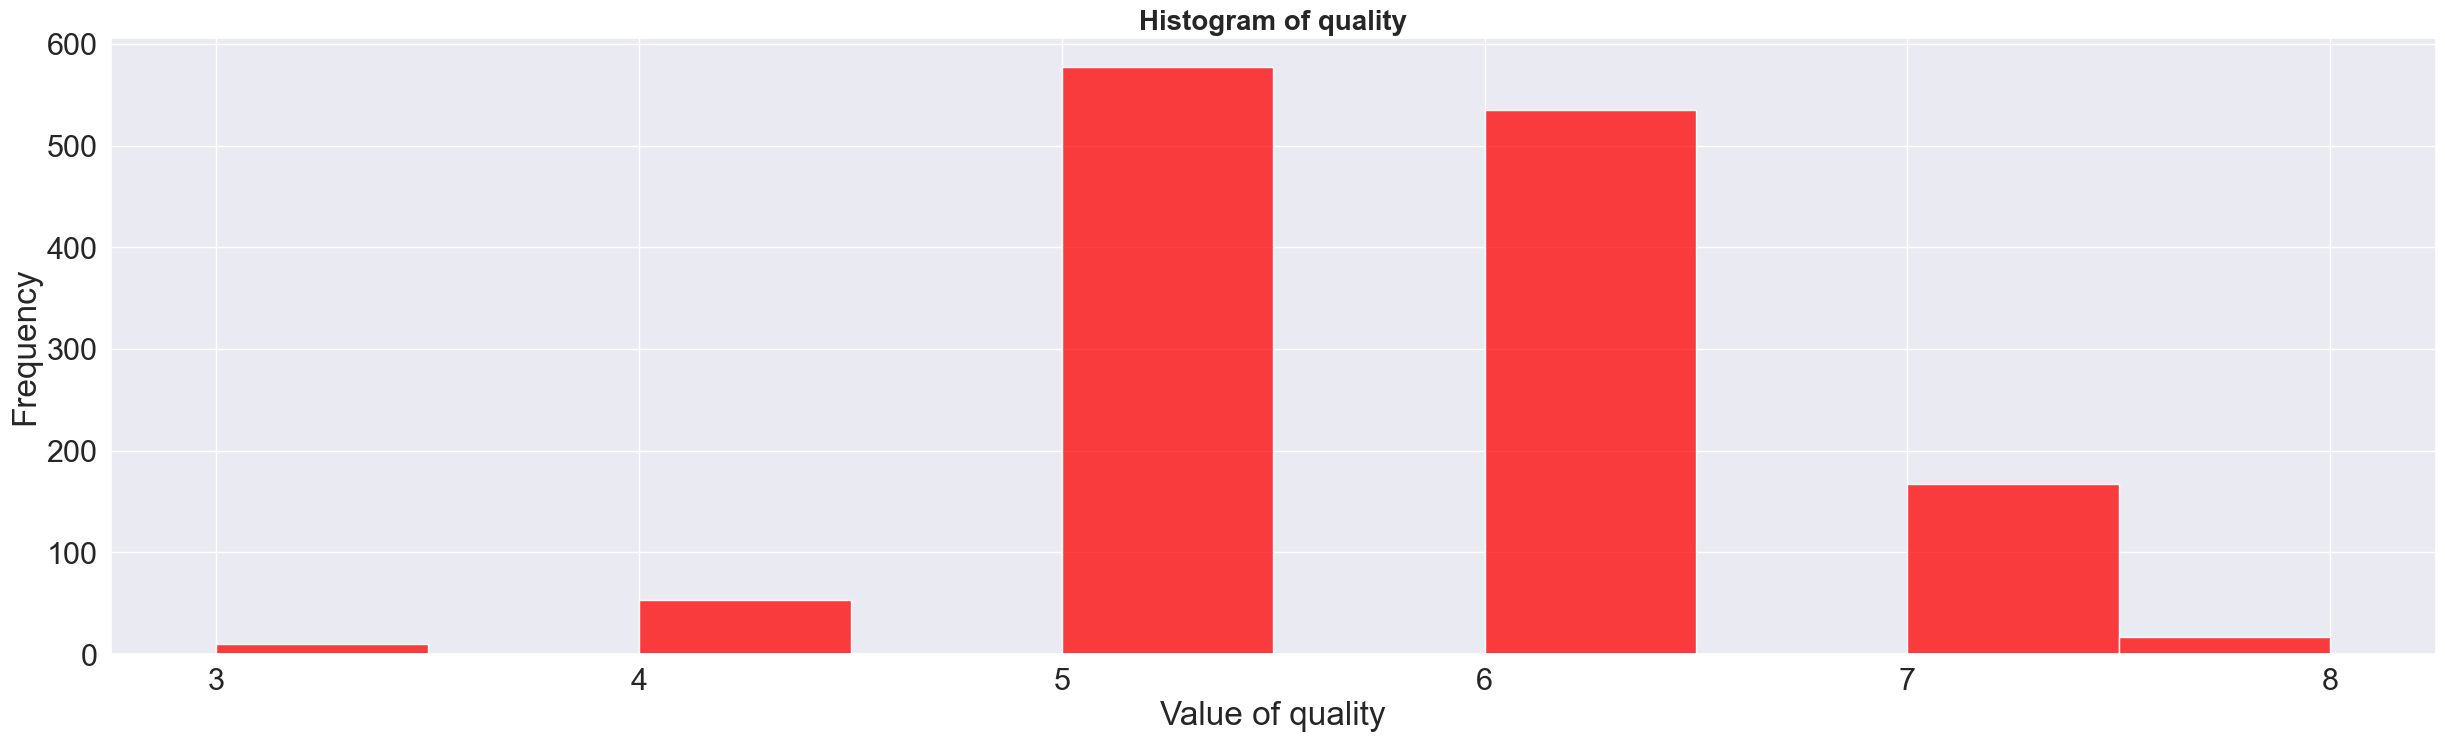

In [16]:
# For red_wine
for column in red_wine.columns:
    if red_wine[column].dtype == 'float64' or red_wine[column].dtype == 'int64':
        plt.figure(figsize=(30, 8))
        sns.histplot(red_wine[column], bins=10 , color = 'red')
        plt.xlabel(f'Value of {column}')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}' ,fontweight= 'bold', fontsize= 20)
        plt.show()


## Merging two dataset


### Check if the two datasets has the same column


In [17]:
# Print true if columns name is the same and false if not.
if (white_wine.columns.tolist() == red_wine.columns.tolist()):
    print ("True")
else:
    print ("False")

True


In [18]:
# Merging time!
# Add a 'type' column, and if it is white_wine, it is value 0 ; and if it is red_wine, it is value 1.
# Summary: for 'type' column : white_wine = 0 ; red_wine = 1.

white_wine['type'] = 0

red_wine['type'] = 1

# Merge them together
merged_wines = pd.concat([white_wine, red_wine],ignore_index = True)

In [19]:
# Example of how the merge dataset looks for the first 10 rows
merged_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36           20.70      0.045   
1            6.3              0.30         0.34            1.60      0.049   
2            8.1              0.28         0.40            6.90      0.050   
3            7.2              0.23         0.32            8.50      0.058   
4            6.2              0.32         0.16            7.00      0.045   
5            8.1              0.22         0.43            1.50      0.044   
6            8.1              0.27         0.41            1.45      0.033   
7            8.6              0.23         0.40            4.20      0.035   
8            7.9              0.18         0.37            1.20      0.040   
9            6.6              0.16         0.40            1.50      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   
5                 28.0                 129.0   0.9938  3.22       0.45   
6                 11.0                  63.0   0.9908  2.99       0.56   
7                 17.0                 109.0   0.9947  3.14       0.53   
8                 16.0                  75.0   0.9920  3.18       0.63   
9                 48.0                 143.0   0.9912  3.54       0.52   

   alcohol  quality  type  
0      8.8        6     0  
1      9.5        6     0  
2     10.1        6     0  
3      9.9        6     0  
4      9.6        6     0  
5     11.0        6     0  
6     12.0        5     0  
7      9.7        5     0  
8     10.8        5     0  
9     12.4        7     0

In [20]:
# Example of how the merge dataset looks for the last 10 rows
merged_wines.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5310            7.2             0.660         0.33             2.5      0.068   
5311            6.6             0.725         0.20             7.8      0.073   
5312            6.3             0.550         0.15             1.8      0.077   
5313            5.4             0.740         0.09             1.7      0.089   
5314            6.3             0.510         0.13             2.3      0.076   
5315            6.8             0.620         0.08             1.9      0.068   
5316            6.2             0.600         0.08             2.0      0.090   
5317            5.9             0.550         0.10             2.2      0.062   
5318            5.9             0.645         0.12             2.0      0.075   
5319            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5310                 34.0                 102.0  0.99414  3.27       0.78   
5311                 29.0                  79.0  0.99770  3.29       0.54   
5312                 26.0                  35.0  0.99314  3.32       0.82   
5313                 16.0                  26.0  0.99402  3.67       0.56   
5314                 29.0                  40.0  0.99574  3.42       0.75   
5315                 28.0                  38.0  0.99651  3.42       0.82   
5316                 32.0                  44.0  0.99490  3.45       0.58   
5317                 39.0                  51.0  0.99512  3.52       0.76   
5318                 32.0                  44.0  0.99547  3.57       0.71   
5319                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  type  
5310     12.8        6     1  
5311      9.2        5     1  
5312     11.6        6     1  
5313     11.6        6     1  
5314     11.0        6     1  
5315      9.5        6     1  
5316     10.5        5     1  
5317     11.2        6     1  
5318     10.2        5     1  
5319     11.0        6     1

### Notice how the type has values 0 or 1?
#### White_wine is represented by 0 and red_wine is represented by 1

## Visualizations for the new merged dataset

### Boxplot

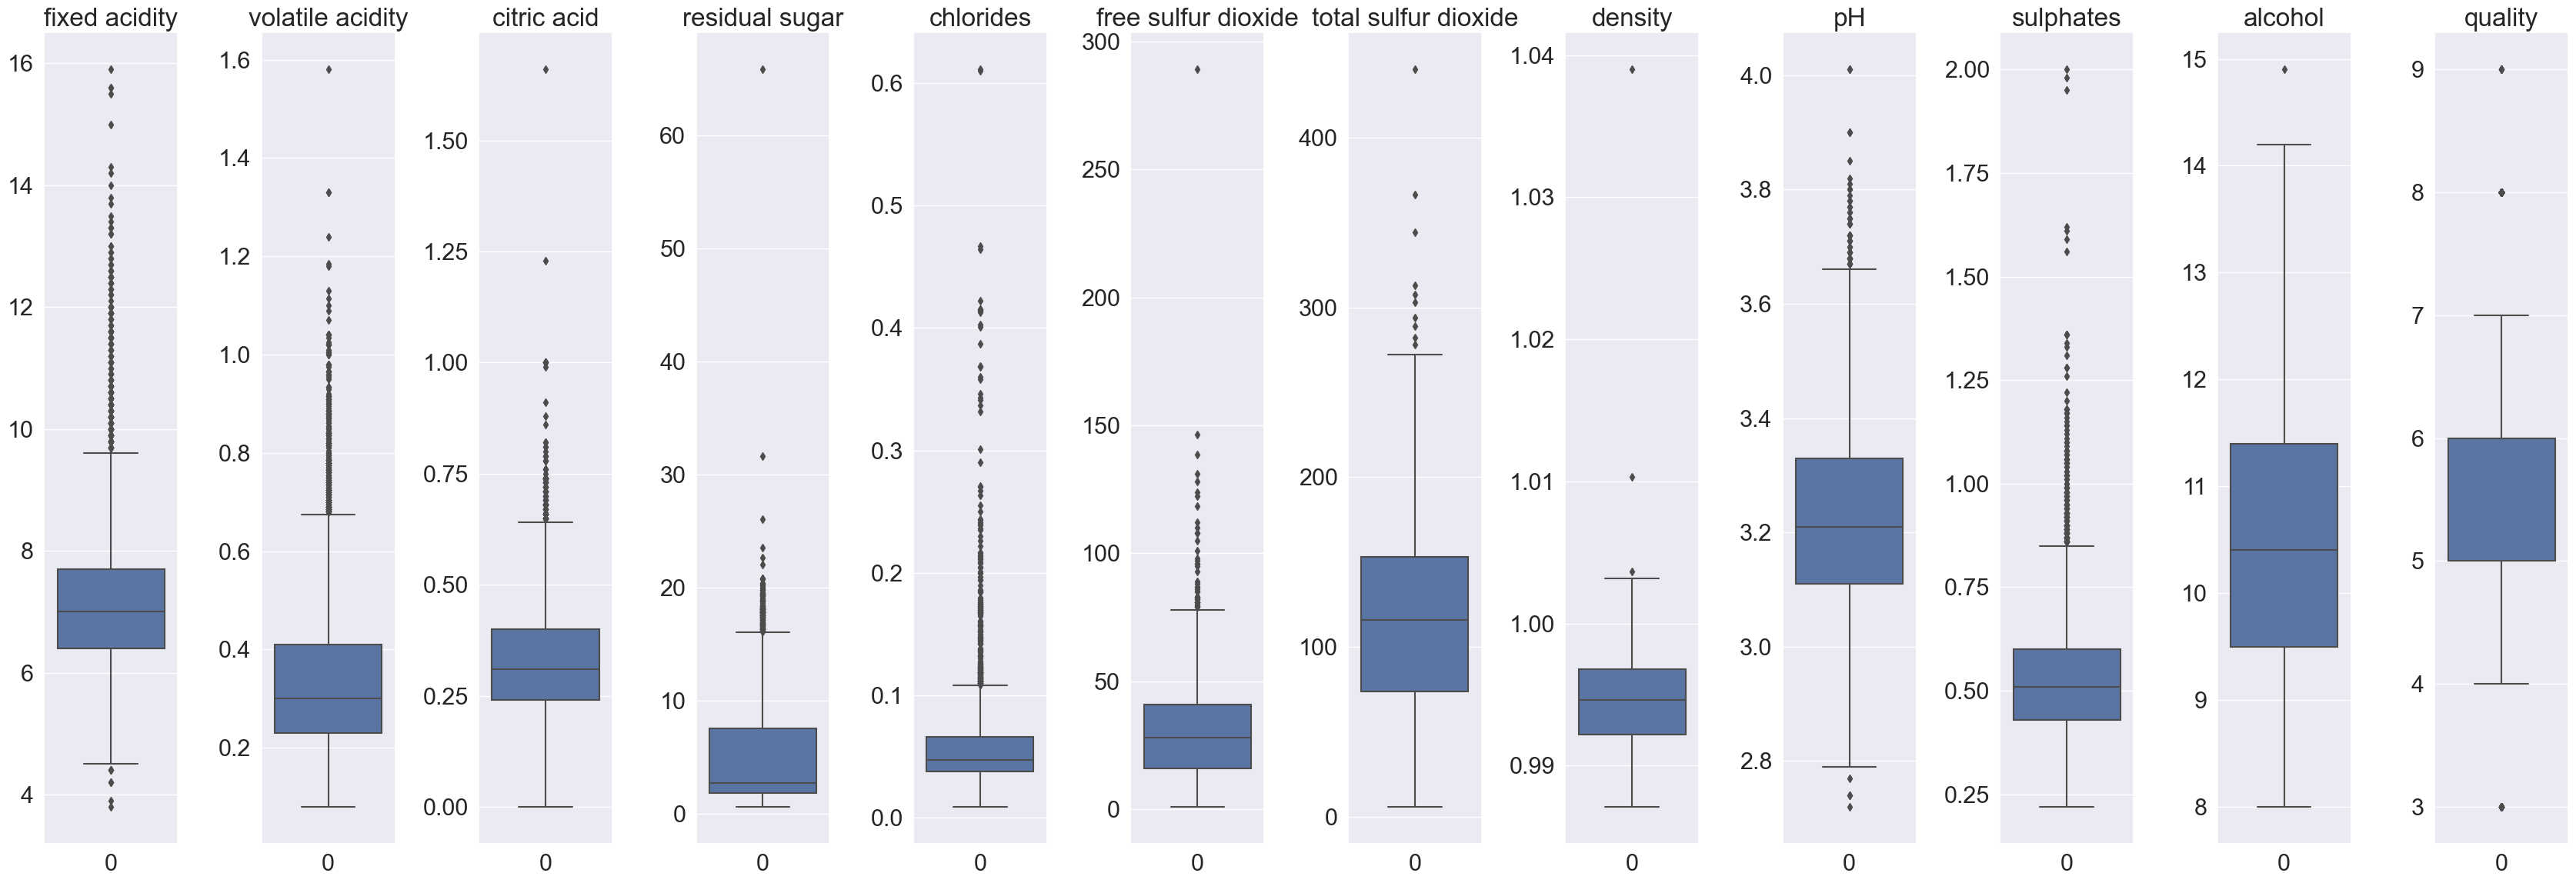

In [21]:
# Boxplot for the merged dataset to visualize the distribution/spread and also the outliers (without the column 'type')
sns.set(font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=len(merged_wines.columns)-1 , figsize=(34, 12))

for i, col in enumerate(merged_wines.columns): 
    if col != 'type':
        sns.boxplot(merged_wines[col], ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout()
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------------
### Correlation matrix (heatmap)

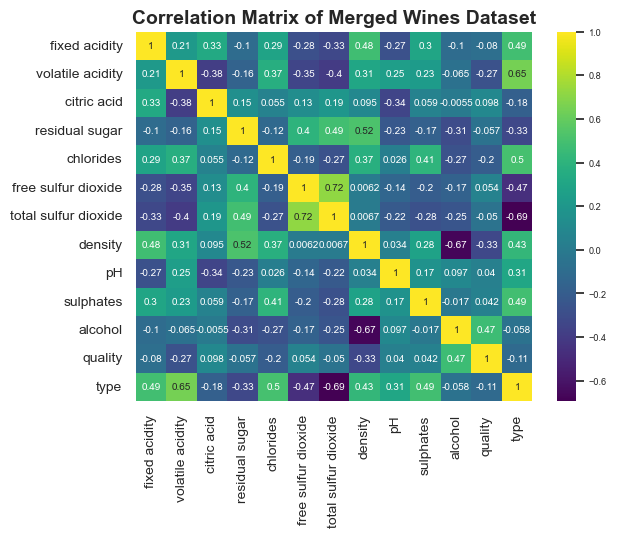

In [22]:
# Correlation matrix for merged_wines dataset
sns.set(font_scale = 0.6)
merged_wines_heatmap = sns.heatmap(merged_wines.corr(), annot=True, cmap="viridis")
merged_wines_heatmap.set_xticklabels(merged_wines_heatmap.get_xticklabels(), fontsize=10)
merged_wines_heatmap.set_yticklabels(merged_wines_heatmap.get_yticklabels(), fontsize=10)
plt.title("Correlation Matrix of Merged Wines Dataset", fontsize = 14, fontweight = 'bold' )
plt.show()

## Data Normalization using StandardScaler


In [23]:
# Selecting data from index 0 to 11 (12 columns total) as input features.
X = merged_wines.iloc[:,0:12]

# Select 'type' column as the variable that wants to be predicted/targeted
y = np.ravel(merged_wines.type)

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Splitting the dataset into training,validation and testing sets for model evaluation.

In [24]:
# Training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

# Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)



## Neural Network Architectures


In [25]:
# Import libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

### Model 1

Epoch 1/30
3404/3404 [==============================] - 8s 1ms/step - loss: 0.3309 - accuracy: 0.8866 - val_loss: 0.1331 - val_accuracy: 0.9800
Epoch 2/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0925 - accuracy: 0.9856 - val_loss: 0.0727 - val_accuracy: 0.9871
Epoch 3/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0631 - accuracy: 0.9897 - val_loss: 0.0560 - val_accuracy: 0.9894
Epoch 4/30
3404/3404 [==============================] - 4s 1ms/step - loss: 0.0533 - accuracy: 0.9903 - val_loss: 0.0494 - val_accuracy: 0.9906
Epoch 5/30
3404/3404 [==============================] - 4s 1ms/step - loss: 0.0489 - accuracy: 0.9912 - val_loss: 0.0449 - val_accuracy: 0.9894
Epoch 6/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0458 - accuracy: 0.9912 - val_loss: 0.0425 - val_accuracy: 0.9906
Epoch 7/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0441 - accuracy: 0.9903 - val_loss: 0.0407 - val_accuracy:

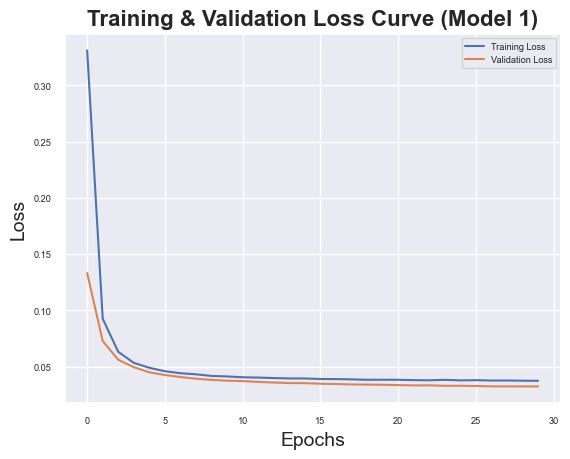

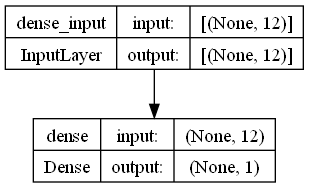

In [26]:

# Designing First model
model1 = Sequential()
model1.add(Dense(1, input_shape=(12,), activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1, validation_data=(X_val, y_val))
# Plot the training and validation loss curves model 1
plt.plot(history1.history['loss'], label="Training Loss")
plt.plot(history1.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs',fontdict={'fontsize': 14})
plt.ylabel('Loss',fontdict={'fontsize': 14})
plt.legend()
plt.title("Training & Validation Loss Curve (Model 1)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


# Show summary and also visualization of the model 1

plot_model(model1, to_file='model_1.png', show_shapes=True, show_layer_names=True)




**Single Dense Layer** with:
- **1** unit of neuron
- **sigmoid** activation function




### Model 2

Epoch 1/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.7854 - accuracy: 0.8986 - val_loss: 0.0795 - val_accuracy: 0.9789
Epoch 2/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.1027 - accuracy: 0.9862 - val_loss: 0.0443 - val_accuracy: 0.9871
Epoch 3/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0854 - accuracy: 0.9909 - val_loss: 0.0334 - val_accuracy: 0.9930
Epoch 4/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0717 - accuracy: 0.9935 - val_loss: 0.0454 - val_accuracy: 0.9953
Epoch 5/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0653 - accuracy: 0.9941 - val_loss: 0.0426 - val_accuracy: 0.9953
Epoch 6/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0550 - accuracy: 0.9950 - val_loss: 0.0595 - val_accuracy: 0.9953
Epoch 7/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0543 - accuracy: 0.9947 - val_loss: 0.0664 - val_accuracy:

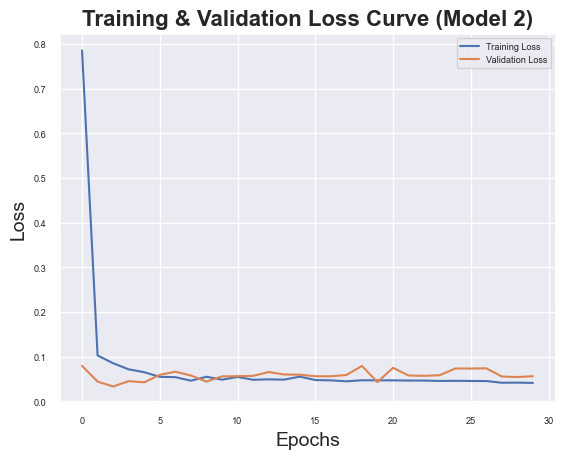

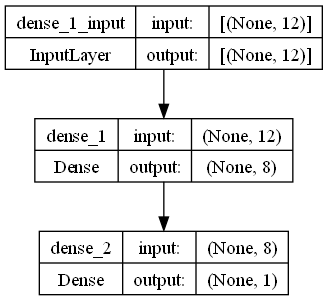

In [27]:
# Designing Second model

model2 = Sequential()
model2.add(Dense(8, input_shape=(12,), activation='relu'))
model2.add(Dense(1,activation='relu'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1, validation_data=(X_val, y_val))

# Plot the training and validation loss curves model 2
plt.plot(history2.history['loss'], label="Training Loss")
plt.plot(history2.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs',fontdict={'fontsize': 14})
plt.ylabel('Loss',fontdict={'fontsize': 14})
plt.legend()
plt.title("Training & Validation Loss Curve (Model 2)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


# Show summary and also visualization of the model 2
plot_model(model2, to_file='model_2.png', show_shapes=True, show_layer_names=True)




**Two Dense Layer** with:

First Hidden Layer:
- **8** unit of neuron
- **relu** activation function

Second Hidden Layer:
- **1** unit of neuron
- **relu** activation function



Epoch 1/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.1572 - accuracy: 0.9771 - val_loss: 0.0464 - val_accuracy: 0.9941
Epoch 2/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0775 - accuracy: 0.9918 - val_loss: 0.2372 - val_accuracy: 0.9730
Epoch 3/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0729 - accuracy: 0.9947 - val_loss: 0.0387 - val_accuracy: 0.9965
Epoch 4/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0593 - accuracy: 0.9944 - val_loss: 0.1115 - val_accuracy: 0.9930
Epoch 5/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0526 - accuracy: 0.9959 - val_loss: 0.0398 - val_accuracy: 0.9965
Epoch 6/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0556 - accuracy: 0.9962 - val_loss: 0.0399 - val_accuracy: 0.9965
Epoch 7/30
3404/3404 [==============================] - 5s 1ms/step - loss: 0.0495 - accuracy: 0.9953 - val_loss: 0.0376 - val_accuracy:

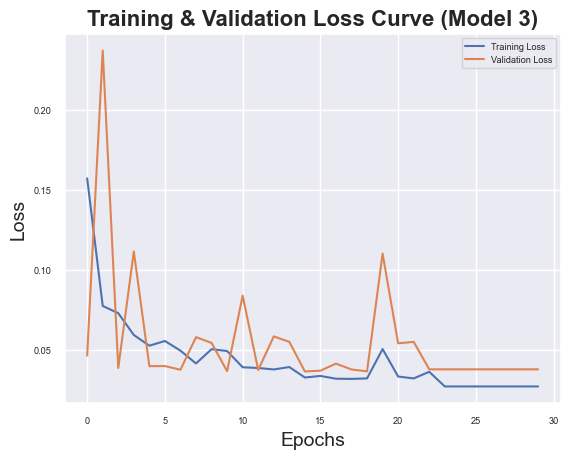

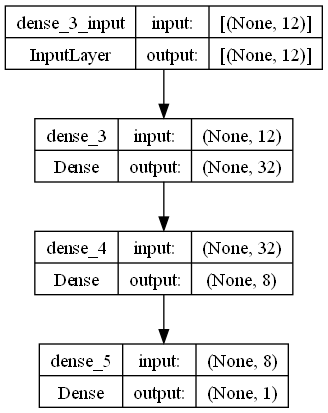

In [28]:
# Designing third model
model3 = Sequential()
model3.add(Dense(32, input_shape=(12,), activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))


model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1, validation_data=(X_val, y_val))

# Plot the training and validation loss curves model 3
plt.plot(history3.history['loss'], label="Training Loss")
plt.plot(history3.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs',fontdict={'fontsize': 14})
plt.ylabel('Loss',fontdict={'fontsize': 14})
plt.legend()
plt.title("Training & Validation Loss Curve (Model 3)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


# Show summary and also visualization of the model 3
plot_model(model3, to_file='model_3.png', show_shapes=True, show_layer_names=True)


**Three Dense Layer** with:

First Hidden Layer:
- **32** unit of neuron
- **relu** activation function

Second Hidden Layer:
- **8** unit of neuron
- **relu** activation function

Third Hidden Layer:
- **1** unit of neuron
- **relu** activation function


### Model 4

Epoch 1/30
3404/3404 [==============================] - 11s 3ms/step - loss: 0.9559 - accuracy: 0.5261 - val_loss: 0.5928 - val_accuracy: 0.6854
Epoch 2/30
3404/3404 [==============================] - 9s 3ms/step - loss: 0.5565 - accuracy: 0.6983 - val_loss: 0.5554 - val_accuracy: 0.6948
Epoch 3/30
3404/3404 [==============================] - 8s 2ms/step - loss: 0.5461 - accuracy: 0.7147 - val_loss: 0.5240 - val_accuracy: 0.7265
Epoch 4/30
3404/3404 [==============================] - 9s 3ms/step - loss: 0.5442 - accuracy: 0.7262 - val_loss: 0.5298 - val_accuracy: 0.7359
Epoch 5/30
3404/3404 [==============================] - 9s 3ms/step - loss: 0.5374 - accuracy: 0.7297 - val_loss: 0.5300 - val_accuracy: 0.7289
Epoch 6/30
3404/3404 [==============================] - 10s 3ms/step - loss: 0.5309 - accuracy: 0.7324 - val_loss: 0.5198 - val_accuracy: 0.7418
Epoch 7/30
3404/3404 [==============================] - 8s 2ms/step - loss: 0.5289 - accuracy: 0.7338 - val_loss: 0.5132 - val_accurac

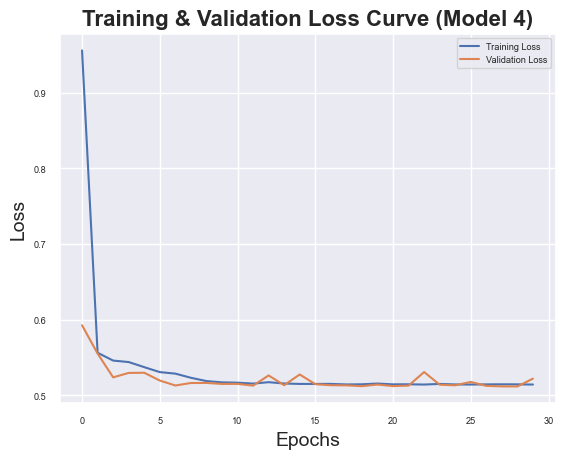

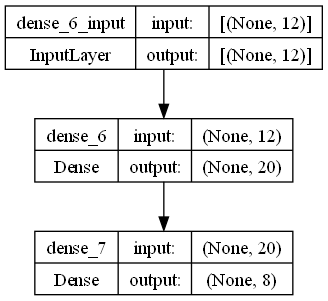

In [29]:
# Designing fourth model

model4 = Sequential()
model4.add(Dense(20, input_shape=(12,), activation='relu'))
model4.add(Dense(8,activation='relu'))


model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1, validation_data=(X_val, y_val))

# Plot the training and validation loss curves model 4
plt.plot(history4.history['loss'], label="Training Loss")
plt.plot(history4.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs',fontdict={'fontsize': 14})
plt.ylabel('Loss',fontdict={'fontsize': 14})
plt.legend()
plt.title("Training & Validation Loss Curve (Model 4)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


# Show summary and also visualization of the model 4
plot_model(model4, to_file='model_4.png', show_shapes=True, show_layer_names=True)


**Two Dense Layer** with:

First Hidden Layer:
- **20** unit of neuron
- **relu** activation function

Second Hidden Layer:
- **8** unit of neuron
- **relu** activation function



### Model 5

Epoch 1/30
3404/3404 [==============================] - 11s 3ms/step - loss: 0.2446 - accuracy: 0.9004 - val_loss: 0.0589 - val_accuracy: 0.9883
Epoch 2/30
3404/3404 [==============================] - 8s 2ms/step - loss: 0.0412 - accuracy: 0.9927 - val_loss: 0.0313 - val_accuracy: 0.9930
Epoch 3/30
3404/3404 [==============================] - 11s 3ms/step - loss: 0.0297 - accuracy: 0.9935 - val_loss: 0.0277 - val_accuracy: 0.9941
Epoch 4/30
3404/3404 [==============================] - 10s 3ms/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 0.0281 - val_accuracy: 0.9941
Epoch 5/30
3404/3404 [==============================] - 8s 2ms/step - loss: 0.0248 - accuracy: 0.9950 - val_loss: 0.0243 - val_accuracy: 0.9941
Epoch 6/30
3404/3404 [==============================] - 10s 3ms/step - loss: 0.0235 - accuracy: 0.9947 - val_loss: 0.0251 - val_accuracy: 0.9941
Epoch 7/30
3404/3404 [==============================] - 9s 3ms/step - loss: 0.0226 - accuracy: 0.9956 - val_loss: 0.0254 - val_accur

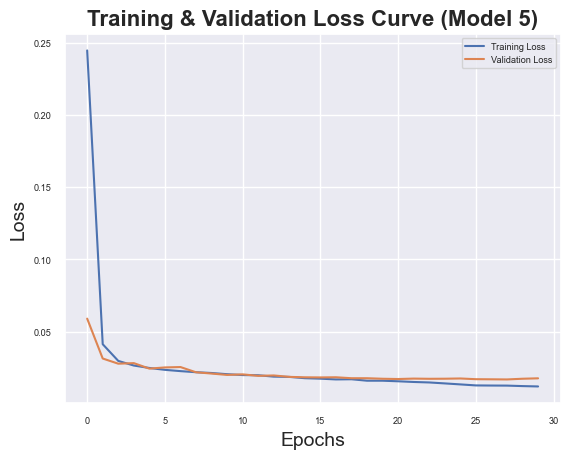

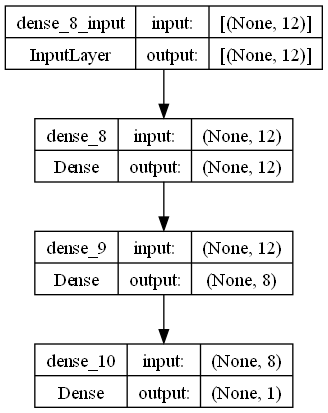

In [30]:
# Designing fifth model

model5 = Sequential()
model5.add(Dense(12, activation='sigmoid', input_shape=(12,)))
model5.add(Dense(8, activation='sigmoid'))
model5.add(Dense(1, activation='sigmoid'))


model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1, validation_data=(X_val, y_val))

# Plot the training and validation loss curves model 5
plt.plot(history5.history['loss'], label="Training Loss")
plt.plot(history5.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs',fontdict={'fontsize': 14})
plt.ylabel('Loss',fontdict={'fontsize': 14})
plt.legend()
plt.title("Training & Validation Loss Curve (Model 5)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


# Show summary and also visualization of the model 5
plot_model(model5, to_file='model_5.png', show_shapes=True, show_layer_names=True)


**Three Dense Layer** with:

First Hidden Layer:
- **12** unit of neuron
- **sigmoid** activation function

Second Hidden Layer:
- **8** unit of neuron
- **sigmoid** activation function

Third Hidden Layer:
- **1** unit of neuron
- **sigmoid** activation function


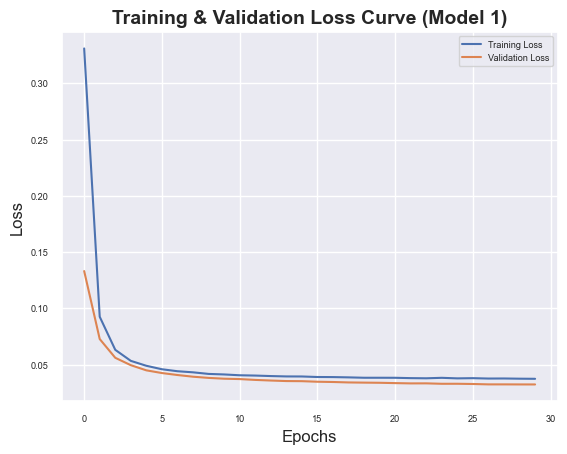



Summary of Model 1

Loss:  [0.330928236246109, 0.0924820825457573, 0.06308430433273315, 0.05328185483813286, 0.048901353031396866, 0.0458294041454792, 0.04406487196683884, 0.04309695586562157, 0.041677821427583694, 0.04120463877916336, 0.04047606885433197, 0.040212955325841904, 0.03977322205901146, 0.03944212198257446, 0.03940154239535332, 0.038931477814912796, 0.03885773941874504, 0.03860804811120033, 0.03826861083507538, 0.03826895356178284, 0.038238346576690674, 0.03793688490986824, 0.037791915237903595, 0.03820480778813362, 0.03772326186299324, 0.03789564222097397, 0.03756532445549965, 0.037619609385728836, 0.03743283078074455, 0.037336088716983795] 

Accuracy:  [0.8866040110588074, 0.9856051802635193, 0.989717960357666, 0.9903055429458618, 0.9911868572235107, 0.9911868572235107, 0.9903055429458618, 0.9903055429458618, 0.9900117516517639, 0.9905992746353149, 0.9905992746353149, 0.9900117516517639, 0.989717960357666, 0.9903055429458618, 0.9908930659294128, 0.9900117516517639, 0.99

None

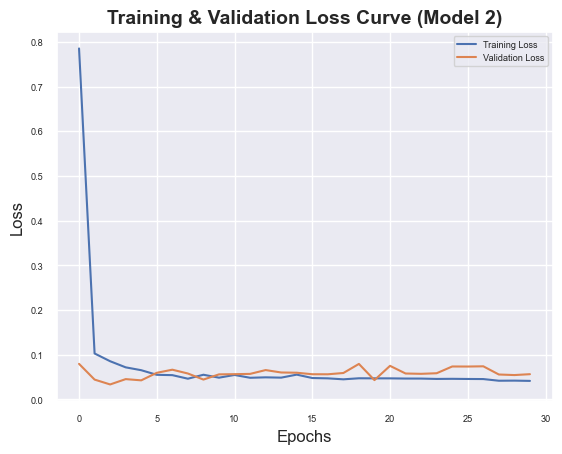



Summary of Model 2

Loss:  [0.7853547930717468, 0.1027442216873169, 0.08538848161697388, 0.0717058777809143, 0.06530222296714783, 0.05499080568552017, 0.054253701120615005, 0.04628005996346474, 0.055155735462903976, 0.04857976362109184, 0.05466945469379425, 0.04836231842637062, 0.049338702112436295, 0.048666805028915405, 0.055399391800165176, 0.047819625586271286, 0.04707806184887886, 0.0449107401072979, 0.047239936888217926, 0.047083064913749695, 0.04704180359840393, 0.04662945121526718, 0.04656408727169037, 0.04578501731157303, 0.04602866619825363, 0.04568950831890106, 0.045486800372600555, 0.04173918813467026, 0.04197630286216736, 0.041385844349861145] 

Accuracy:  [0.8986486196517944, 0.9861927032470703, 0.9908930659294128, 0.9935370087623596, 0.9941245317459106, 0.9950058460235596, 0.9947121143341064, 0.9955934286117554, 0.9950058460235596, 0.9952996373176575, 0.9952996373176575, 0.9958872199058533, 0.9961809515953064, 0.9947121143341064, 0.9961809515953064, 0.9961809515953064, 

None

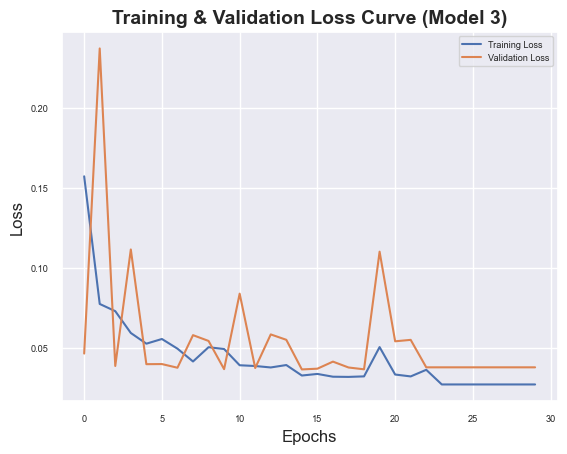



Summary of Model 3

Loss:  [0.15723274648189545, 0.07745663821697235, 0.07294851541519165, 0.05930635333061218, 0.052621472626924515, 0.05555286258459091, 0.049507491290569305, 0.04149568825960159, 0.05041644722223282, 0.04927843064069748, 0.03913777321577072, 0.038663603365421295, 0.0377567782998085, 0.03926945477724075, 0.0327182337641716, 0.033712610602378845, 0.03197265788912773, 0.03185378387570381, 0.032180074602365494, 0.05049421265721321, 0.03333859518170357, 0.032156504690647125, 0.036290232092142105, 0.027136893942952156, 0.027136893942952156, 0.027136892080307007, 0.027136893942952156, 0.027136893942952156, 0.027136893942952156, 0.027136893942952156] 

Accuracy:  [0.9770857691764832, 0.9917743802070618, 0.9947121143341064, 0.9944183230400085, 0.9958872199058533, 0.9961809515953064, 0.9952996373176575, 0.9970622658729553, 0.9967685341835022, 0.9950058460235596, 0.9961809515953064, 0.9955934286117554, 0.9970622658729553, 0.9961809515953064, 0.9973560571670532, 0.997062265872

None

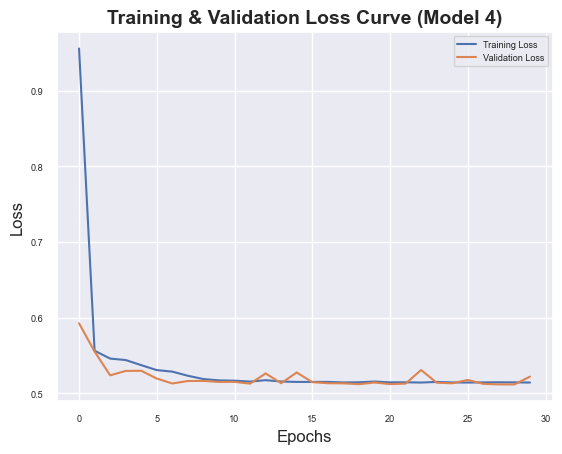



Summary of Model 4

Loss:  [0.9559224247932434, 0.5564874410629272, 0.5461379885673523, 0.544191837310791, 0.5374419689178467, 0.5309118032455444, 0.5288786888122559, 0.5234121680259705, 0.5190736055374146, 0.517351508140564, 0.5169276595115662, 0.5157064199447632, 0.5175886750221252, 0.5158400535583496, 0.5152897238731384, 0.5152851939201355, 0.5153104662895203, 0.51460862159729, 0.5147871375083923, 0.5157849192619324, 0.5147155523300171, 0.5148123502731323, 0.5144571661949158, 0.5152775645256042, 0.5145987868309021, 0.51446932554245, 0.5146743655204773, 0.5147950053215027, 0.5147088170051575, 0.5144690871238708] 

Accuracy:  [0.5261456966400146, 0.6982961297035217, 0.7147473692893982, 0.7262044548988342, 0.7297297120094299, 0.7323736548423767, 0.7338425517082214, 0.7353113889694214, 0.7341362833976746, 0.7379553318023682, 0.7347238659858704, 0.7361927032470703, 0.7373678088188171, 0.7361927032470703, 0.7388366460800171, 0.737661600112915, 0.7400117516517639, 0.7405992746353149, 0.7

None

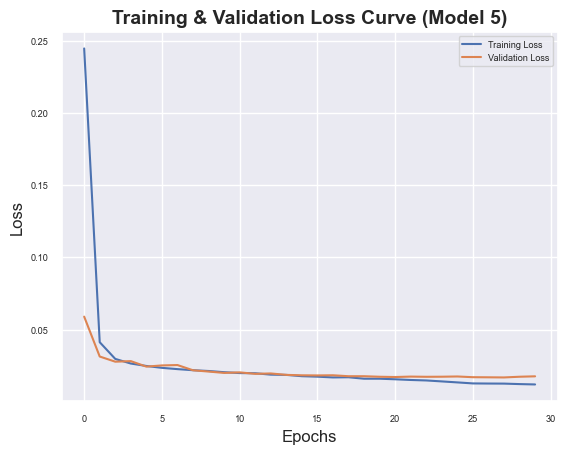



Summary of Model 5

Loss:  [0.24458038806915283, 0.0412263348698616, 0.029664920642971992, 0.026459012180566788, 0.02477438561618328, 0.023474689573049545, 0.022589324042201042, 0.02183743193745613, 0.021298473700881004, 0.02046750672161579, 0.01985933817923069, 0.019734222441911697, 0.018776122480630875, 0.01858864352107048, 0.01769339106976986, 0.017368221655488014, 0.016841473057866096, 0.01696333847939968, 0.015954140573740005, 0.01594952866435051, 0.01555775199085474, 0.015080001205205917, 0.014746380038559437, 0.014086171984672546, 0.013397370465099812, 0.012696064077317715, 0.012610726058483124, 0.01256167609244585, 0.012228340841829777, 0.01198149099946022] 

Accuracy:  [0.9004113078117371, 0.9926556944847107, 0.9935370087623596, 0.9941245317459106, 0.9950058460235596, 0.9947121143341064, 0.9955934286117554, 0.9958872199058533, 0.9955934286117554, 0.9961809515953064, 0.9955934286117554, 0.9964747428894043, 0.9961809515953064, 0.9967685341835022, 0.9967685341835022, 0.99588721

None

In [31]:
from IPython.display import display
import matplotlib.pyplot as plt

models = []
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)
models.append(model5)

histories = []
histories.append(history1)
histories.append(history2)
histories.append(history3)
histories.append(history4)
histories.append(history5)



# Iterate over the models and their corresponding histories
for i, model in enumerate(models):
    history = histories[i]  # Replace 'histories' with the actual list of your history objects
    
    # Plot the training and validation loss curves
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.title(f"Training & Validation Loss Curve (Model {i+1})", fontsize=14, fontweight='bold')
    plt.show()
    
    # Display the model summary
    print (f"\n\nSummary of Model {i+1}\n")
    print ("Loss: ", history.history['loss'] ,"\n")
    print ("Accuracy: ",history.history['accuracy'])
    print("\n\n")
    display(model.summary())
    print("\n\n")


## Neural Networks Architecture Visualization Observation
As summarized above, the training & validation loss curve for each model is different due to:
 - **Number of hidden layers**
 - **Number of neurons/units per layer**
 - **Activation function of layers**
 
I've set the epochs count to 30 so that for each network architecture, the entire dataset will be passed through the model for training for 30 times. **(Parameters are being updated after each iteration)**

For each network architecture, the accuracy is more or less the same high except for model 2 which has the lowest accuracy, but that isn't just it.

The plotting/shape of the **training & Validation loss curve** plays a huge part in determining the best network architecture.

As we all can see, the graphs for second to fifth model is jagged with some especially jagged and some just a little jagged. This shows the model's performance is fluctuating over time during training which in other words, the model is **inconsistent**

### So it can be concluded that in the first model which has a high accuracy and low loss, with a smooth plotting of loss curve, it is selected as the best model architecture that will be selected for hyperparameters tuning

# Model Tuning

### Find the best hyperparameters that will make the model perform well.
**verbose** is set to 0 for more neat purposes

In [32]:
import tensorflow as tf


# Define the potential hyperparameters values for tuning
learning_rates = [0.001, 0.01]
batch_sizes = [4,8,16,32]
activation_functions = ['relu', 'sigmoid']
epochs = 30


hyperparameters_list = []


# Perform hyperparameter tuning
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activation_functions:
            # Create a new instance of the model with the current hyperparameters (selecting model 2)
            # Reset the Keras session <--- clearing any existing models/layers from previous models
            tf.keras.backend.clear_session()
            model = Sequential()
            model.add(Dense(1, input_shape=(12,), activation= activation))
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model and obtain the validation accuracy with the selected hyperparameter 
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_data=(X_val, y_val), verbose=0)
            val_accuracy = history.history['val_accuracy'][-1]

            # Store the info into an array of results
            hyperparameters_list.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, 'Validation Accuracy': val_accuracy})
            
hyperparameters_table = pd.DataFrame(hyperparameters_list)            
# Display the table
(hyperparameters_table)


Learning Rate  Batch Size Activation Function  Validation Accuracy
0           0.001           4                relu             0.992958
1           0.001           4             sigmoid             0.990610
2           0.001           8                relu             0.995305
3           0.001           8             sigmoid             0.990610
4           0.001          16                relu             0.985915
5           0.001          16             sigmoid             0.990610
6           0.001          32                relu             0.868545
7           0.001          32             sigmoid             0.987089
8           0.010           4                relu             0.991784
9           0.010           4             sigmoid             0.990610
10          0.010           8                relu             0.992958
11          0.010           8             sigmoid             0.990610
12          0.010          16                relu             0.951878
13          0.010          16             sigmoid             0.990610
14          0.010          32                relu             0.893192
15          0.010          32             sigmoid             0.987089

In [33]:
# Table showing which is the best hyperparameters values to obtain the highest val accuracy.

# Model Evaluation

After the hyperparameters tuning, it can be concluded that the __best__ hyperparameter values for learning rates, batch size, activation fuctions are:
- __Learning rate: 0.001__
- __Batch size: 8__
- __Activation function: relu__
- __Optimzer: Adam__

Now is the time to use the best hyperparameter values to build the best neural network architecture model to be tested on the validation and testing set to see how well it fits and performs on the data.


In [44]:
# Best hyperparameters for the best model
best_learning_rate = 0.001
best_batch_size = 8
best_activation_function = 'relu'
best_optimizer = 'adam'

# Build the best neural network architecture with the selected best hyperparameters value
best_model = Sequential()
best_model.add(Dense(1, input_shape=(12,), activation= best_activation_function))
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])


# Train the best model with the best hyperparameters 
best_model.fit(X_train, y_train, epochs=30, batch_size= best_batch_size, validation_data=(X_val, y_val), verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

print("\n")
# Evaluate the model on the testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

27/27 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9965
Validation Loss: 0.05629342421889305
Validation Accuracy: 0.9964788556098938


34/34 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9934
Testing Loss: 0.0766327828168869
Testing Accuracy: 0.9934210777282715


# Model Evaluation Visualization

## Confusion Matrix

In [45]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [46]:
# Predict the test set results
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

34/34 [==============================] - 0s 2ms/step


### Precision: High precision indicates a low false positive rate.
### Recall: High recall indicates a low false negative rate.
### F1-score: A high F1-score indicates a good balance between precision and recall.
### Accuracy: High accuracy indicates a high proportion of correctly predicted instances out of the total number of instances.
### Macro average F1-score: A high macro average F1-score indicates good overall performance across all classes.
### Weighted average F1-score: It represents the overall accuracy, accounting for class imbalances.

In [48]:
# Compute and print the performance metrics (Confusion matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
print("\n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[797   0]
 [  7 260]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       797
           1       1.00      0.97      0.99       267

    accuracy                           0.99      1064
   macro avg       1.00      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064



Accuracy Score: 0.993421052631579


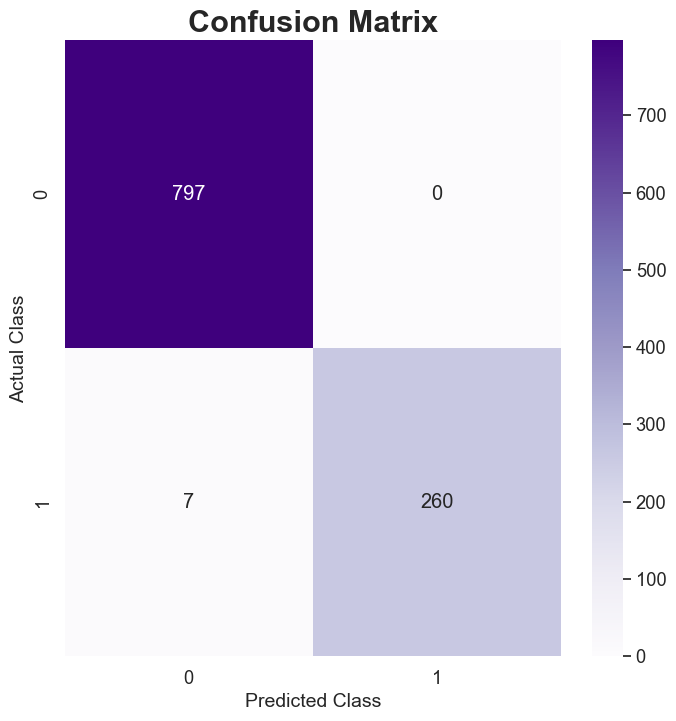

In [49]:
# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix' , fontsize = 22 , fontweight ='bold')
plt.xlabel("Predicted Class" ,  fontsize= 14)
plt.ylabel('Actual Class', fontsize=14)
plt.show()

## Receiver Operating Characteristic (ROC) curve

In [50]:
# Importing libraries
from sklearn.metrics import roc_curve, auc

In [51]:
# Calculate the probabilities of the predictions
y_test_prob = best_model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [52]:
# Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [53]:
# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

### The AUC (Area Under the Curve) value indicates the overall performance of the classifier.
### A higher AUC value suggests better classification performance.

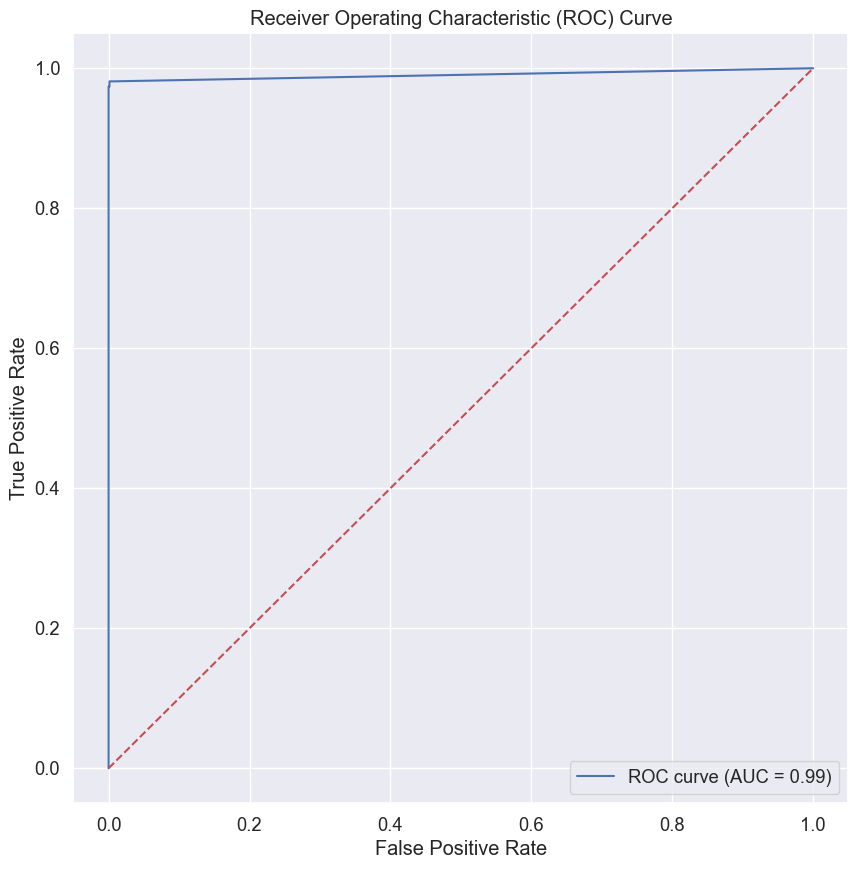

In [57]:
# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a legend to the plot
plt.legend(loc="lower right")
plt.show()